In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [3]:
import torch
from gcpds_cv_pykit.datasets import OxfordIITPet
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import FCN
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
OxfordIITPet()

100%|██████████| 626M/626M [00:32<00:00, 20.3MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/oxfordiiitpet/versions/3
Dataset copied to: /content/datasets/oxfordiiitpet
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/oxfordiiitpet/versions/3' deleted.


'/content/datasets/oxfordiiitpet'

In [ ]:
config = {"Dir of dataset": "./datasets/oxfordiiitpet", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None,
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "FCN", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","OxfordIIITPet-FCN-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1024


Organizing masks: 100%|██████████| 1024/1024 [00:00<00:00, 147964.56it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 128238.60it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"])

Searching for images in: datasets/oxfordiiitpet/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 256


Organizing masks: 100%|██████████| 256/256 [00:00<00:00, 144300.74it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


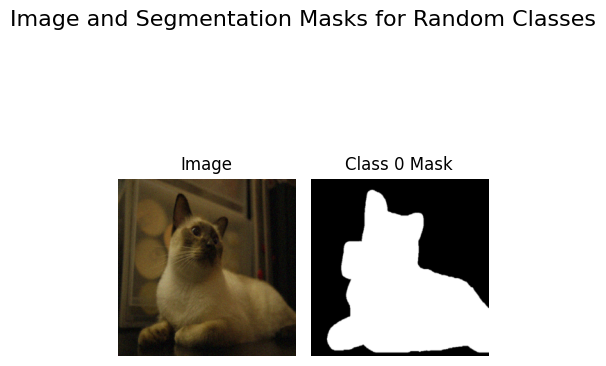

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 163MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

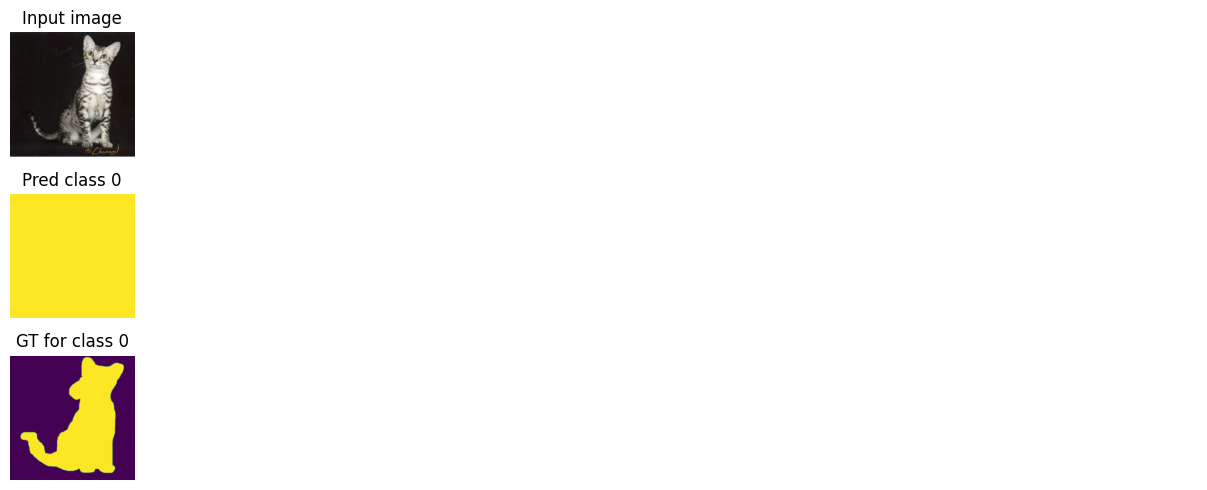

Train loss: 0.52938 | Time: 0m 28s | Val loss: 0.52168
Train_DICE_avg: 0.55563 | Train_Jaccard_avg: 0.40650 | Train_Sensitivity_avg: 0.40821 | Train_Specificity_avg: 0.62105 
Class 0 - Train_DICE: 0.55563 | Train_Jaccard: 0.40650 | Train_Sensitivity: 0.40821 | Train_Specificity: 0.62105 
Val_DICE_avg: 0.55841 | Val_Jaccard_avg: 0.40721 | Val_Sensitivity_avg: 0.40721 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.55841 | Val_Jaccard: 0.40721 | Val_Sensitivity: 0.40721 | Val_Specificity: 1.00000 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.51180 | Time: 0m 54s | Val loss: 0.51320
Train_DICE_avg: 0.55756 | Train_Jaccard_avg: 0.40862 | Train_Sensitivity_avg: 0.40864 | Train_Specificity_avg: 0.81111 
Class 0 - Train_DICE: 0.55756 | Train_Jaccard: 0.40862 | Train_Sensitivity: 0.40864 | Train_Specificity: 0.81111 
Val_DICE_avg: 0.55841 | Val_Jaccard_avg: 0.40721 | Val_Sensitivity_avg: 0.40721 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.55841 | Val_Jaccard: 0.40721 | Val_Sensitivity: 0.40721 | Val_Specificity: 1.00000 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.49663 | Time: 1m 20s | Val loss: 0.48773
Train_DICE_avg: 0.55730 | Train_Jaccard_avg: 0.40830 | Train_Sensitivity_avg: 0.40831 | Train_Specificity_avg: 0.97447 
Class 0 - Train_DICE: 0.55730 | Train_Jaccard: 0.40830 | Train_Sensitivity: 0.40831 | Train_Specificity: 0.97447 
Val_DICE_avg: 0.55841 | Val_Jaccard_avg: 0.40721 | Val_Sensitivity_avg: 0.40721 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.55841 | Val_Jaccard: 0.40721 | Val_Sensitivity: 0.40721 | Val_Specificity: 1.00000 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.48330 | Time: 1m 46s | Val loss: 0.47326
Train_DICE_avg: 0.55748 | Train_Jaccard_avg: 0.40861 | Train_Sensitivity_avg: 0.40861 | Train_Specificity_avg: 0.99904 
Class 0 - Train_DICE: 0.55748 | Train_Jaccard: 0.40861 | Train_Sensitivity: 0.40861 | Train_Specificity: 0.99904 
Val_DICE_avg: 0.55841 | Val_Jaccard_avg: 0.40721 | Val_Sensitivity_avg: 0.40721 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.55841 | Val_Jaccard: 0.40721 | Val_Sensitivity: 0.40721 | Val_Specificity: 1.00000 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.47112 | Time: 2m 12s | Val loss: 0.46329
Train_DICE_avg: 0.55744 | Train_Jaccard_avg: 0.40855 | Train_Sensitivity_avg: 0.40855 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.55744 | Train_Jaccard: 0.40855 | Train_Sensitivity: 0.40855 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.55841 | Val_Jaccard_avg: 0.40721 | Val_Sensitivity_avg: 0.40721 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.55841 | Val_Jaccard: 0.40721 | Val_Sensitivity: 0.40721 | Val_Specificity: 1.00000 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

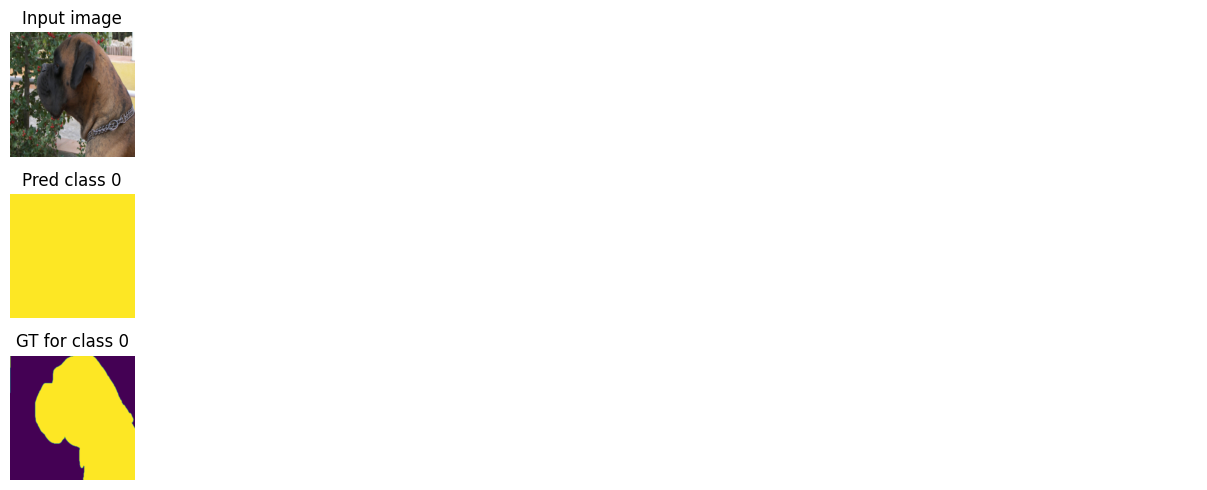

Train loss: 0.45919 | Time: 2m 38s | Val loss: 0.45248
Train_DICE_avg: 0.55764 | Train_Jaccard_avg: 0.40872 | Train_Sensitivity_avg: 0.40872 | Train_Specificity_avg: 0.92204 
Class 0 - Train_DICE: 0.55764 | Train_Jaccard: 0.40872 | Train_Sensitivity: 0.40872 | Train_Specificity: 0.92204 
Val_DICE_avg: 0.55840 | Val_Jaccard_avg: 0.40721 | Val_Sensitivity_avg: 0.40722 | Val_Specificity_avg: 0.86103 
Class 0 - Val_DICE: 0.55840 | Val_Jaccard: 0.40721 | Val_Sensitivity: 0.40722 | Val_Specificity: 0.86103 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.44673 | Time: 3m 4s | Val loss: 0.43989
Train_DICE_avg: 0.55929 | Train_Jaccard_avg: 0.41041 | Train_Sensitivity_avg: 0.41074 | Train_Specificity_avg: 0.83534 
Class 0 - Train_DICE: 0.55929 | Train_Jaccard: 0.41041 | Train_Sensitivity: 0.41074 | Train_Specificity: 0.83534 
Val_DICE_avg: 0.56095 | Val_Jaccard_avg: 0.40978 | Val_Sensitivity_avg: 0.41016 | Val_Specificity_avg: 0.82636 
Class 0 - Val_DICE: 0.56095 | Val_Jaccard: 0.40978 | Val_Sensitivity: 0.41016 | Val_Specificity: 0.82636 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.43121 | Time: 3m 30s | Val loss: 0.42287
Train_DICE_avg: 0.57873 | Train_Jaccard_avg: 0.43082 | Train_Sensitivity_avg: 0.43382 | Train_Specificity_avg: 0.88283 
Class 0 - Train_DICE: 0.57873 | Train_Jaccard: 0.43082 | Train_Sensitivity: 0.43382 | Train_Specificity: 0.88283 
Val_DICE_avg: 0.58943 | Val_Jaccard_avg: 0.43982 | Val_Sensitivity_avg: 0.44383 | Val_Specificity_avg: 0.89006 
Class 0 - Val_DICE: 0.58943 | Val_Jaccard: 0.43982 | Val_Sensitivity: 0.44383 | Val_Specificity: 0.89006 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.41128 | Time: 3m 56s | Val loss: 0.39902
Train_DICE_avg: 0.61113 | Train_Jaccard_avg: 0.46449 | Train_Sensitivity_avg: 0.47442 | Train_Specificity_avg: 0.89870 
Class 0 - Train_DICE: 0.61113 | Train_Jaccard: 0.46449 | Train_Sensitivity: 0.47442 | Train_Specificity: 0.89870 
Val_DICE_avg: 0.63226 | Val_Jaccard_avg: 0.48427 | Val_Sensitivity_avg: 0.49645 | Val_Specificity_avg: 0.89642 
Class 0 - Val_DICE: 0.63226 | Val_Jaccard: 0.48427 | Val_Sensitivity: 0.49645 | Val_Specificity: 0.89642 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.38671 | Time: 4m 22s | Val loss: 0.36918
Train_DICE_avg: 0.64899 | Train_Jaccard_avg: 0.50461 | Train_Sensitivity_avg: 0.52284 | Train_Specificity_avg: 0.90541 
Class 0 - Train_DICE: 0.64899 | Train_Jaccard: 0.50461 | Train_Sensitivity: 0.52284 | Train_Specificity: 0.90541 
Val_DICE_avg: 0.67644 | Val_Jaccard_avg: 0.53325 | Val_Sensitivity_avg: 0.55409 | Val_Specificity_avg: 0.90493 
Class 0 - Val_DICE: 0.67644 | Val_Jaccard: 0.53325 | Val_Sensitivity: 0.55409 | Val_Specificity: 0.90493 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

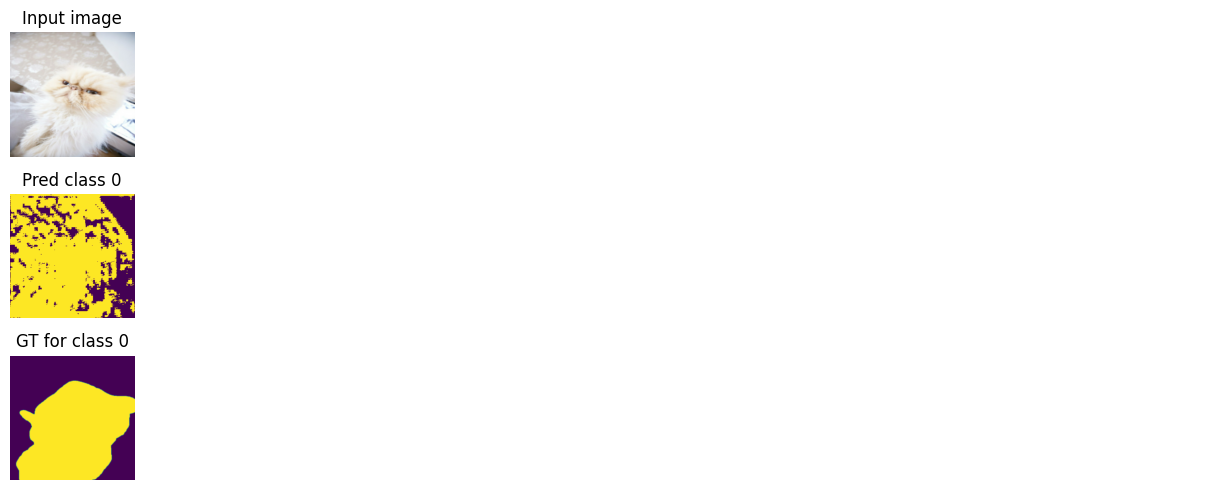

Train loss: 0.36230 | Time: 4m 49s | Val loss: 0.34754
Train_DICE_avg: 0.68127 | Train_Jaccard_avg: 0.53985 | Train_Sensitivity_avg: 0.56419 | Train_Specificity_avg: 0.90750 
Class 0 - Train_DICE: 0.68127 | Train_Jaccard: 0.53985 | Train_Sensitivity: 0.56419 | Train_Specificity: 0.90750 
Val_DICE_avg: 0.70233 | Val_Jaccard_avg: 0.56348 | Val_Sensitivity_avg: 0.58927 | Val_Specificity_avg: 0.91045 
Class 0 - Val_DICE: 0.70233 | Val_Jaccard: 0.56348 | Val_Sensitivity: 0.58927 | Val_Specificity: 0.91045 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.34318 | Time: 5m 15s | Val loss: 0.32785
Train_DICE_avg: 0.70301 | Train_Jaccard_avg: 0.56452 | Train_Sensitivity_avg: 0.59398 | Train_Specificity_avg: 0.91009 
Class 0 - Train_DICE: 0.70301 | Train_Jaccard: 0.56452 | Train_Sensitivity: 0.59398 | Train_Specificity: 0.91009 
Val_DICE_avg: 0.72269 | Val_Jaccard_avg: 0.58782 | Val_Sensitivity_avg: 0.61591 | Val_Specificity_avg: 0.91689 
Class 0 - Val_DICE: 0.72269 | Val_Jaccard: 0.58782 | Val_Sensitivity: 0.61591 | Val_Specificity: 0.91689 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.32242 | Time: 5m 41s | Val loss: 0.30906
Train_DICE_avg: 0.72548 | Train_Jaccard_avg: 0.59063 | Train_Sensitivity_avg: 0.62307 | Train_Specificity_avg: 0.91374 
Class 0 - Train_DICE: 0.72548 | Train_Jaccard: 0.59063 | Train_Sensitivity: 0.62307 | Train_Specificity: 0.91374 
Val_DICE_avg: 0.74054 | Val_Jaccard_avg: 0.60958 | Val_Sensitivity_avg: 0.63893 | Val_Specificity_avg: 0.92305 
Class 0 - Val_DICE: 0.74054 | Val_Jaccard: 0.60958 | Val_Sensitivity: 0.63893 | Val_Specificity: 0.92305 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.30276 | Time: 6m 8s | Val loss: 0.29036
Train_DICE_avg: 0.74566 | Train_Jaccard_avg: 0.61462 | Train_Sensitivity_avg: 0.64992 | Train_Specificity_avg: 0.91612 
Class 0 - Train_DICE: 0.74566 | Train_Jaccard: 0.61462 | Train_Sensitivity: 0.64992 | Train_Specificity: 0.91612 
Val_DICE_avg: 0.75809 | Val_Jaccard_avg: 0.63118 | Val_Sensitivity_avg: 0.66085 | Val_Specificity_avg: 0.92934 
Class 0 - Val_DICE: 0.75809 | Val_Jaccard: 0.63118 | Val_Sensitivity: 0.66085 | Val_Specificity: 0.92934 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.28427 | Time: 6m 34s | Val loss: 0.27246
Train_DICE_avg: 0.76376 | Train_Jaccard_avg: 0.63653 | Train_Sensitivity_avg: 0.67445 | Train_Specificity_avg: 0.91754 
Class 0 - Train_DICE: 0.76376 | Train_Jaccard: 0.63653 | Train_Sensitivity: 0.67445 | Train_Specificity: 0.91754 
Val_DICE_avg: 0.77474 | Val_Jaccard_avg: 0.65218 | Val_Sensitivity_avg: 0.68313 | Val_Specificity_avg: 0.93294 
Class 0 - Val_DICE: 0.77474 | Val_Jaccard: 0.65218 | Val_Sensitivity: 0.68313 | Val_Specificity: 0.93294 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

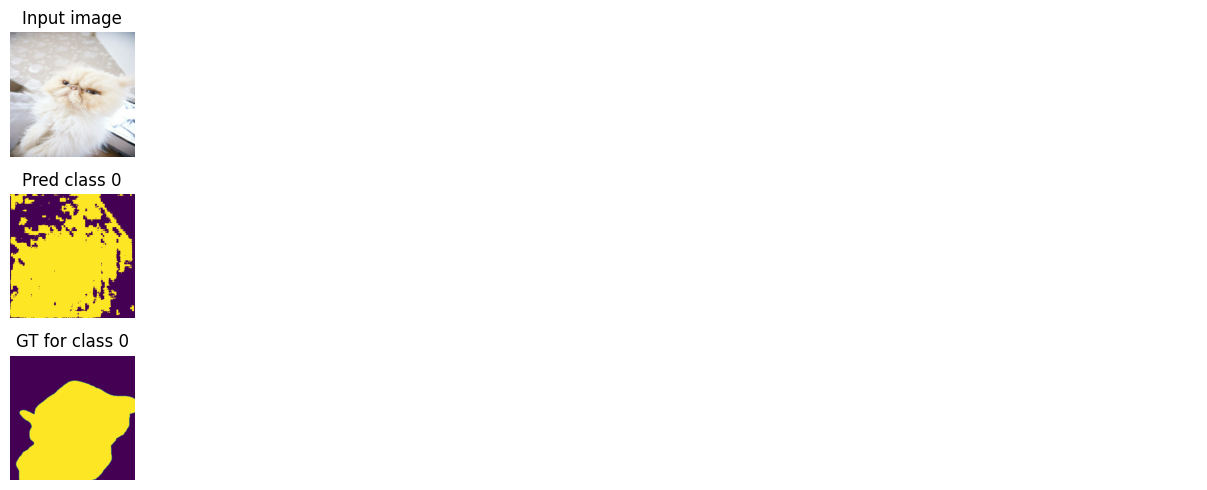

Train loss: 0.26737 | Time: 7m 1s | Val loss: 0.25533
Train_DICE_avg: 0.77917 | Train_Jaccard_avg: 0.65604 | Train_Sensitivity_avg: 0.69662 | Train_Specificity_avg: 0.91892 
Class 0 - Train_DICE: 0.77917 | Train_Jaccard: 0.65604 | Train_Sensitivity: 0.69662 | Train_Specificity: 0.91892 
Val_DICE_avg: 0.78993 | Val_Jaccard_avg: 0.67178 | Val_Sensitivity_avg: 0.70292 | Val_Specificity_avg: 0.93702 
Class 0 - Val_DICE: 0.78993 | Val_Jaccard: 0.67178 | Val_Sensitivity: 0.70292 | Val_Specificity: 0.93702 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.25086 | Time: 7m 27s | Val loss: 0.23942
Train_DICE_avg: 0.79387 | Train_Jaccard_avg: 0.67463 | Train_Sensitivity_avg: 0.71668 | Train_Specificity_avg: 0.92151 
Class 0 - Train_DICE: 0.79387 | Train_Jaccard: 0.67463 | Train_Sensitivity: 0.71668 | Train_Specificity: 0.92151 
Val_DICE_avg: 0.80483 | Val_Jaccard_avg: 0.69122 | Val_Sensitivity_avg: 0.72357 | Val_Specificity_avg: 0.93894 
Class 0 - Val_DICE: 0.80483 | Val_Jaccard: 0.69122 | Val_Sensitivity: 0.72357 | Val_Specificity: 0.93894 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.23546 | Time: 7m 53s | Val loss: 0.22452
Train_DICE_avg: 0.80753 | Train_Jaccard_avg: 0.69277 | Train_Sensitivity_avg: 0.73683 | Train_Specificity_avg: 0.92318 
Class 0 - Train_DICE: 0.80753 | Train_Jaccard: 0.69277 | Train_Sensitivity: 0.73683 | Train_Specificity: 0.92318 
Val_DICE_avg: 0.81790 | Val_Jaccard_avg: 0.70860 | Val_Sensitivity_avg: 0.74192 | Val_Specificity_avg: 0.94077 
Class 0 - Val_DICE: 0.81790 | Val_Jaccard: 0.70860 | Val_Sensitivity: 0.74192 | Val_Specificity: 0.94077 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.22203 | Time: 8m 20s | Val loss: 0.21134
Train_DICE_avg: 0.81829 | Train_Jaccard_avg: 0.70673 | Train_Sensitivity_avg: 0.75098 | Train_Specificity_avg: 0.92408 
Class 0 - Train_DICE: 0.81829 | Train_Jaccard: 0.70673 | Train_Sensitivity: 0.75098 | Train_Specificity: 0.92408 
Val_DICE_avg: 0.82889 | Val_Jaccard_avg: 0.72344 | Val_Sensitivity_avg: 0.75794 | Val_Specificity_avg: 0.94179 
Class 0 - Val_DICE: 0.82889 | Val_Jaccard: 0.72344 | Val_Sensitivity: 0.75794 | Val_Specificity: 0.94179 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.21010 | Time: 8m 46s | Val loss: 0.19892
Train_DICE_avg: 0.82779 | Train_Jaccard_avg: 0.71971 | Train_Sensitivity_avg: 0.76600 | Train_Specificity_avg: 0.92515 
Class 0 - Train_DICE: 0.82779 | Train_Jaccard: 0.71971 | Train_Sensitivity: 0.76600 | Train_Specificity: 0.92515 
Val_DICE_avg: 0.83898 | Val_Jaccard_avg: 0.73730 | Val_Sensitivity_avg: 0.77310 | Val_Specificity_avg: 0.94247 
Class 0 - Val_DICE: 0.83898 | Val_Jaccard: 0.73730 | Val_Sensitivity: 0.77310 | Val_Specificity: 0.94247 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

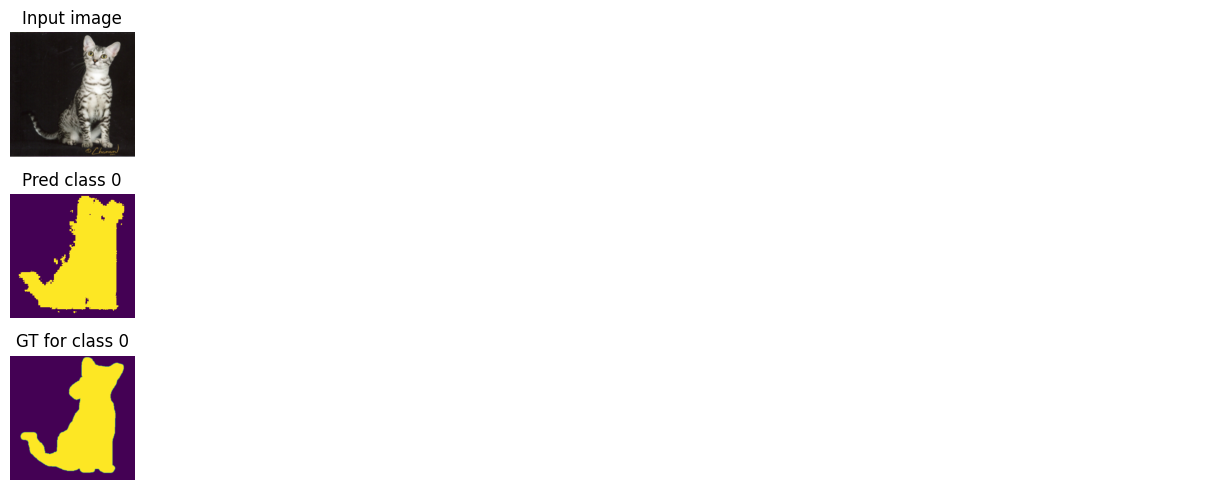

Train loss: 0.19280 | Time: 9m 13s | Val loss: 0.17824
Train_DICE_avg: 0.84347 | Train_Jaccard_avg: 0.74110 | Train_Sensitivity_avg: 0.78801 | Train_Specificity_avg: 0.92873 
Class 0 - Train_DICE: 0.84347 | Train_Jaccard: 0.74110 | Train_Sensitivity: 0.78801 | Train_Specificity: 0.92873 
Val_DICE_avg: 0.85615 | Val_Jaccard_avg: 0.76087 | Val_Sensitivity_avg: 0.79409 | Val_Specificity_avg: 0.95014 
Class 0 - Val_DICE: 0.85615 | Val_Jaccard: 0.76087 | Val_Sensitivity: 0.79409 | Val_Specificity: 0.95014 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17221 | Time: 9m 39s | Val loss: 0.16249
Train_DICE_avg: 0.86221 | Train_Jaccard_avg: 0.76731 | Train_Sensitivity_avg: 0.81546 | Train_Specificity_avg: 0.93345 
Class 0 - Train_DICE: 0.86221 | Train_Jaccard: 0.76731 | Train_Sensitivity: 0.81546 | Train_Specificity: 0.93345 
Val_DICE_avg: 0.86978 | Val_Jaccard_avg: 0.78032 | Val_Sensitivity_avg: 0.81482 | Val_Specificity_avg: 0.95146 
Class 0 - Val_DICE: 0.86978 | Val_Jaccard: 0.78032 | Val_Sensitivity: 0.81482 | Val_Specificity: 0.95146 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15913 | Time: 10m 5s | Val loss: 0.14667
Train_DICE_avg: 0.87187 | Train_Jaccard_avg: 0.78164 | Train_Sensitivity_avg: 0.83238 | Train_Specificity_avg: 0.93463 
Class 0 - Train_DICE: 0.87187 | Train_Jaccard: 0.78164 | Train_Sensitivity: 0.83238 | Train_Specificity: 0.93463 
Val_DICE_avg: 0.88347 | Val_Jaccard_avg: 0.80050 | Val_Sensitivity_avg: 0.84100 | Val_Specificity_avg: 0.94908 
Class 0 - Val_DICE: 0.88347 | Val_Jaccard: 0.80050 | Val_Sensitivity: 0.84100 | Val_Specificity: 0.94908 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14639 | Time: 10m 32s | Val loss: 0.14008
Train_DICE_avg: 0.88233 | Train_Jaccard_avg: 0.79690 | Train_Sensitivity_avg: 0.84865 | Train_Specificity_avg: 0.93648 
Class 0 - Train_DICE: 0.88233 | Train_Jaccard: 0.79690 | Train_Sensitivity: 0.84865 | Train_Specificity: 0.93648 
Val_DICE_avg: 0.88773 | Val_Jaccard_avg: 0.80686 | Val_Sensitivity_avg: 0.84555 | Val_Specificity_avg: 0.95198 
Class 0 - Val_DICE: 0.88773 | Val_Jaccard: 0.80686 | Val_Sensitivity: 0.84555 | Val_Specificity: 0.95198 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13892 | Time: 10m 58s | Val loss: 0.13184
Train_DICE_avg: 0.88655 | Train_Jaccard_avg: 0.80353 | Train_Sensitivity_avg: 0.85936 | Train_Specificity_avg: 0.93498 
Class 0 - Train_DICE: 0.88655 | Train_Jaccard: 0.80353 | Train_Sensitivity: 0.85936 | Train_Specificity: 0.93498 
Val_DICE_avg: 0.89427 | Val_Jaccard_avg: 0.81695 | Val_Sensitivity_avg: 0.86014 | Val_Specificity_avg: 0.94914 
Class 0 - Val_DICE: 0.89427 | Val_Jaccard: 0.81695 | Val_Sensitivity: 0.86014 | Val_Specificity: 0.94914 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

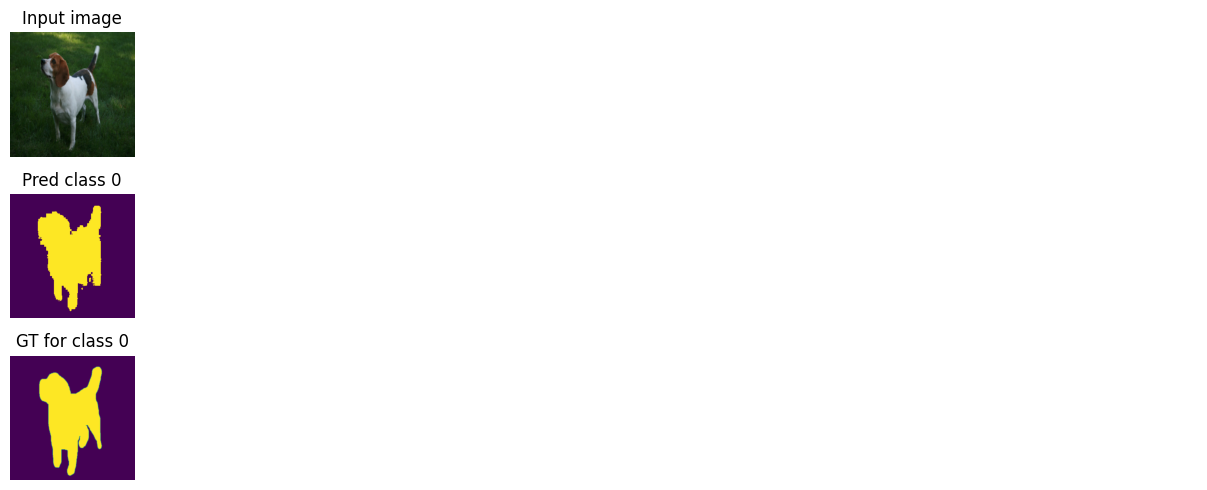

Train loss: 0.13172 | Time: 11m 25s | Val loss: 0.12405
Train_DICE_avg: 0.89149 | Train_Jaccard_avg: 0.81103 | Train_Sensitivity_avg: 0.86677 | Train_Specificity_avg: 0.93519 
Class 0 - Train_DICE: 0.89149 | Train_Jaccard: 0.81103 | Train_Sensitivity: 0.86677 | Train_Specificity: 0.93519 
Val_DICE_avg: 0.89897 | Val_Jaccard_avg: 0.82430 | Val_Sensitivity_avg: 0.87034 | Val_Specificity_avg: 0.94808 
Class 0 - Val_DICE: 0.89897 | Val_Jaccard: 0.82430 | Val_Sensitivity: 0.87034 | Val_Specificity: 0.94808 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12541 | Time: 11m 51s | Val loss: 0.11921
Train_DICE_avg: 0.89585 | Train_Jaccard_avg: 0.81770 | Train_Sensitivity_avg: 0.87418 | Train_Specificity_avg: 0.93642 
Class 0 - Train_DICE: 0.89585 | Train_Jaccard: 0.81770 | Train_Sensitivity: 0.87418 | Train_Specificity: 0.93642 
Val_DICE_avg: 0.90212 | Val_Jaccard_avg: 0.82928 | Val_Sensitivity_avg: 0.87671 | Val_Specificity_avg: 0.94843 
Class 0 - Val_DICE: 0.90212 | Val_Jaccard: 0.82928 | Val_Sensitivity: 0.87671 | Val_Specificity: 0.94843 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.12058 | Time: 12m 17s | Val loss: 0.11480
Train_DICE_avg: 0.89885 | Train_Jaccard_avg: 0.82224 | Train_Sensitivity_avg: 0.88011 | Train_Specificity_avg: 0.93701 
Class 0 - Train_DICE: 0.89885 | Train_Jaccard: 0.82224 | Train_Sensitivity: 0.88011 | Train_Specificity: 0.93701 
Val_DICE_avg: 0.90476 | Val_Jaccard_avg: 0.83344 | Val_Sensitivity_avg: 0.88321 | Val_Specificity_avg: 0.94732 
Class 0 - Val_DICE: 0.90476 | Val_Jaccard: 0.83344 | Val_Sensitivity: 0.88321 | Val_Specificity: 0.94732 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11608 | Time: 12m 44s | Val loss: 0.11158
Train_DICE_avg: 0.90156 | Train_Jaccard_avg: 0.82656 | Train_Sensitivity_avg: 0.88497 | Train_Specificity_avg: 0.93729 
Class 0 - Train_DICE: 0.90156 | Train_Jaccard: 0.82656 | Train_Sensitivity: 0.88497 | Train_Specificity: 0.93729 
Val_DICE_avg: 0.90659 | Val_Jaccard_avg: 0.83641 | Val_Sensitivity_avg: 0.88551 | Val_Specificity_avg: 0.94832 
Class 0 - Val_DICE: 0.90659 | Val_Jaccard: 0.83641 | Val_Sensitivity: 0.88551 | Val_Specificity: 0.94832 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11351 | Time: 13m 10s | Val loss: 0.10804
Train_DICE_avg: 0.90275 | Train_Jaccard_avg: 0.82869 | Train_Sensitivity_avg: 0.88708 | Train_Specificity_avg: 0.93723 
Class 0 - Train_DICE: 0.90275 | Train_Jaccard: 0.82869 | Train_Sensitivity: 0.88708 | Train_Specificity: 0.93723 
Val_DICE_avg: 0.90848 | Val_Jaccard_avg: 0.83951 | Val_Sensitivity_avg: 0.88904 | Val_Specificity_avg: 0.94830 
Class 0 - Val_DICE: 0.90848 | Val_Jaccard: 0.83951 | Val_Sensitivity: 0.88904 | Val_Specificity: 0.94830 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

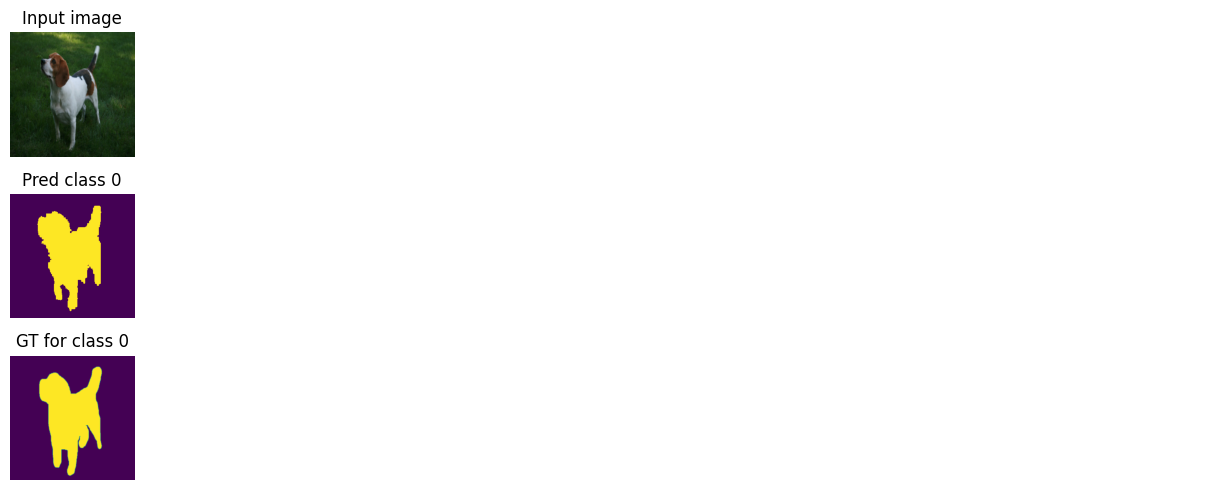

Train loss: 0.10930 | Time: 13m 37s | Val loss: 0.10270
Train_DICE_avg: 0.90505 | Train_Jaccard_avg: 0.83276 | Train_Sensitivity_avg: 0.89000 | Train_Specificity_avg: 0.93990 
Class 0 - Train_DICE: 0.90505 | Train_Jaccard: 0.83276 | Train_Sensitivity: 0.89000 | Train_Specificity: 0.93990 
Val_DICE_avg: 0.91133 | Val_Jaccard_avg: 0.84411 | Val_Sensitivity_avg: 0.89195 | Val_Specificity_avg: 0.95073 
Class 0 - Val_DICE: 0.91133 | Val_Jaccard: 0.84411 | Val_Sensitivity: 0.89195 | Val_Specificity: 0.95073 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10137 | Time: 14m 4s | Val loss: 0.09744
Train_DICE_avg: 0.91134 | Train_Jaccard_avg: 0.84229 | Train_Sensitivity_avg: 0.89930 | Train_Specificity_avg: 0.93944 
Class 0 - Train_DICE: 0.91134 | Train_Jaccard: 0.84229 | Train_Sensitivity: 0.89930 | Train_Specificity: 0.93944 
Val_DICE_avg: 0.91502 | Val_Jaccard_avg: 0.85015 | Val_Sensitivity_avg: 0.90022 | Val_Specificity_avg: 0.95022 
Class 0 - Val_DICE: 0.91502 | Val_Jaccard: 0.85015 | Val_Sensitivity: 0.90022 | Val_Specificity: 0.95022 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09718 | Time: 14m 30s | Val loss: 0.09400
Train_DICE_avg: 0.91416 | Train_Jaccard_avg: 0.84697 | Train_Sensitivity_avg: 0.90487 | Train_Specificity_avg: 0.94125 
Class 0 - Train_DICE: 0.91416 | Train_Jaccard: 0.84697 | Train_Sensitivity: 0.90487 | Train_Specificity: 0.94125 
Val_DICE_avg: 0.91756 | Val_Jaccard_avg: 0.85425 | Val_Sensitivity_avg: 0.90371 | Val_Specificity_avg: 0.95111 
Class 0 - Val_DICE: 0.91756 | Val_Jaccard: 0.85425 | Val_Sensitivity: 0.90371 | Val_Specificity: 0.95111 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09410 | Time: 14m 56s | Val loss: 0.09054
Train_DICE_avg: 0.91628 | Train_Jaccard_avg: 0.85064 | Train_Sensitivity_avg: 0.90869 | Train_Specificity_avg: 0.94136 
Class 0 - Train_DICE: 0.91628 | Train_Jaccard: 0.85064 | Train_Sensitivity: 0.90869 | Train_Specificity: 0.94136 
Val_DICE_avg: 0.91968 | Val_Jaccard_avg: 0.85772 | Val_Sensitivity_avg: 0.91194 | Val_Specificity_avg: 0.94841 
Class 0 - Val_DICE: 0.91968 | Val_Jaccard: 0.85772 | Val_Sensitivity: 0.91194 | Val_Specificity: 0.94841 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09074 | Time: 15m 23s | Val loss: 0.08830
Train_DICE_avg: 0.91882 | Train_Jaccard_avg: 0.85443 | Train_Sensitivity_avg: 0.91224 | Train_Specificity_avg: 0.94079 
Class 0 - Train_DICE: 0.91882 | Train_Jaccard: 0.85443 | Train_Sensitivity: 0.91224 | Train_Specificity: 0.94079 
Val_DICE_avg: 0.92124 | Val_Jaccard_avg: 0.86028 | Val_Sensitivity_avg: 0.91488 | Val_Specificity_avg: 0.94904 
Class 0 - Val_DICE: 0.92124 | Val_Jaccard: 0.86028 | Val_Sensitivity: 0.91488 | Val_Specificity: 0.94904 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

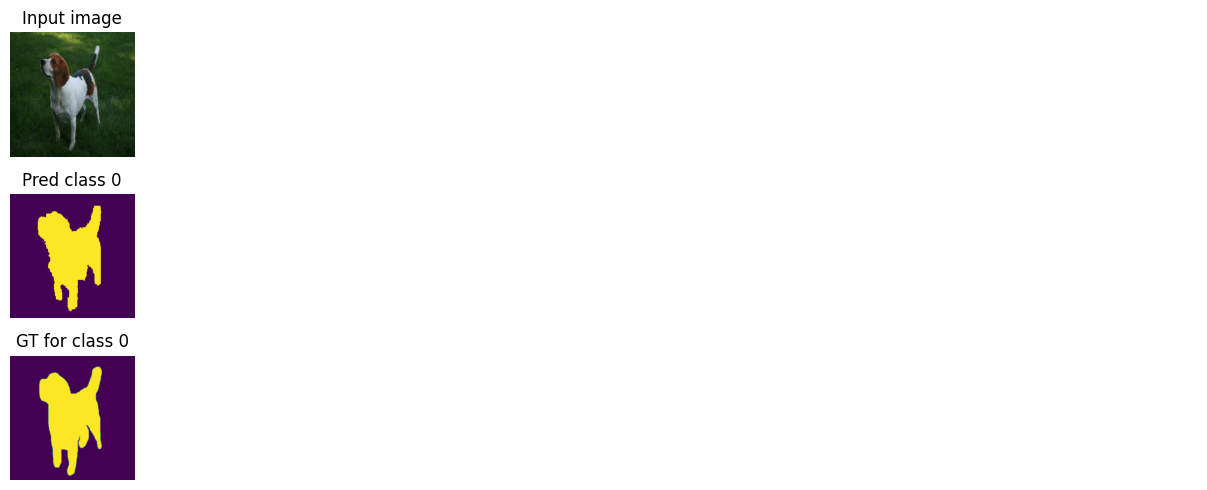

Train loss: 0.08733 | Time: 15m 50s | Val loss: 0.08676
Train_DICE_avg: 0.92151 | Train_Jaccard_avg: 0.85886 | Train_Sensitivity_avg: 0.91573 | Train_Specificity_avg: 0.94338 
Class 0 - Train_DICE: 0.92151 | Train_Jaccard: 0.85886 | Train_Sensitivity: 0.91573 | Train_Specificity: 0.94338 
Val_DICE_avg: 0.92207 | Val_Jaccard_avg: 0.86168 | Val_Sensitivity_avg: 0.91407 | Val_Specificity_avg: 0.95053 
Class 0 - Val_DICE: 0.92207 | Val_Jaccard: 0.86168 | Val_Sensitivity: 0.91407 | Val_Specificity: 0.95053 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08452 | Time: 16m 16s | Val loss: 0.08513
Train_DICE_avg: 0.92373 | Train_Jaccard_avg: 0.86256 | Train_Sensitivity_avg: 0.91786 | Train_Specificity_avg: 0.94584 
Class 0 - Train_DICE: 0.92373 | Train_Jaccard: 0.86256 | Train_Sensitivity: 0.91786 | Train_Specificity: 0.94584 
Val_DICE_avg: 0.92319 | Val_Jaccard_avg: 0.86358 | Val_Sensitivity_avg: 0.91664 | Val_Specificity_avg: 0.95053 
Class 0 - Val_DICE: 0.92319 | Val_Jaccard: 0.86358 | Val_Sensitivity: 0.91664 | Val_Specificity: 0.95053 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08330 | Time: 16m 43s | Val loss: 0.08369
Train_DICE_avg: 0.92464 | Train_Jaccard_avg: 0.86409 | Train_Sensitivity_avg: 0.91983 | Train_Specificity_avg: 0.94452 
Class 0 - Train_DICE: 0.92464 | Train_Jaccard: 0.86409 | Train_Sensitivity: 0.91983 | Train_Specificity: 0.94452 
Val_DICE_avg: 0.92404 | Val_Jaccard_avg: 0.86501 | Val_Sensitivity_avg: 0.91913 | Val_Specificity_avg: 0.95018 
Class 0 - Val_DICE: 0.92404 | Val_Jaccard: 0.86501 | Val_Sensitivity: 0.91913 | Val_Specificity: 0.95018 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08132 | Time: 17m 9s | Val loss: 0.08221
Train_DICE_avg: 0.92606 | Train_Jaccard_avg: 0.86646 | Train_Sensitivity_avg: 0.92262 | Train_Specificity_avg: 0.94441 
Class 0 - Train_DICE: 0.92606 | Train_Jaccard: 0.86646 | Train_Sensitivity: 0.92262 | Train_Specificity: 0.94441 
Val_DICE_avg: 0.92530 | Val_Jaccard_avg: 0.86700 | Val_Sensitivity_avg: 0.92119 | Val_Specificity_avg: 0.95021 
Class 0 - Val_DICE: 0.92530 | Val_Jaccard: 0.86700 | Val_Sensitivity: 0.92119 | Val_Specificity: 0.95021 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07990 | Time: 17m 36s | Val loss: 0.08132
Train_DICE_avg: 0.92725 | Train_Jaccard_avg: 0.86851 | Train_Sensitivity_avg: 0.92325 | Train_Specificity_avg: 0.94543 
Class 0 - Train_DICE: 0.92725 | Train_Jaccard: 0.86851 | Train_Sensitivity: 0.92325 | Train_Specificity: 0.94543 
Val_DICE_avg: 0.92560 | Val_Jaccard_avg: 0.86749 | Val_Sensitivity_avg: 0.92323 | Val_Specificity_avg: 0.94993 
Class 0 - Val_DICE: 0.92560 | Val_Jaccard: 0.86749 | Val_Sensitivity: 0.92323 | Val_Specificity: 0.94993 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

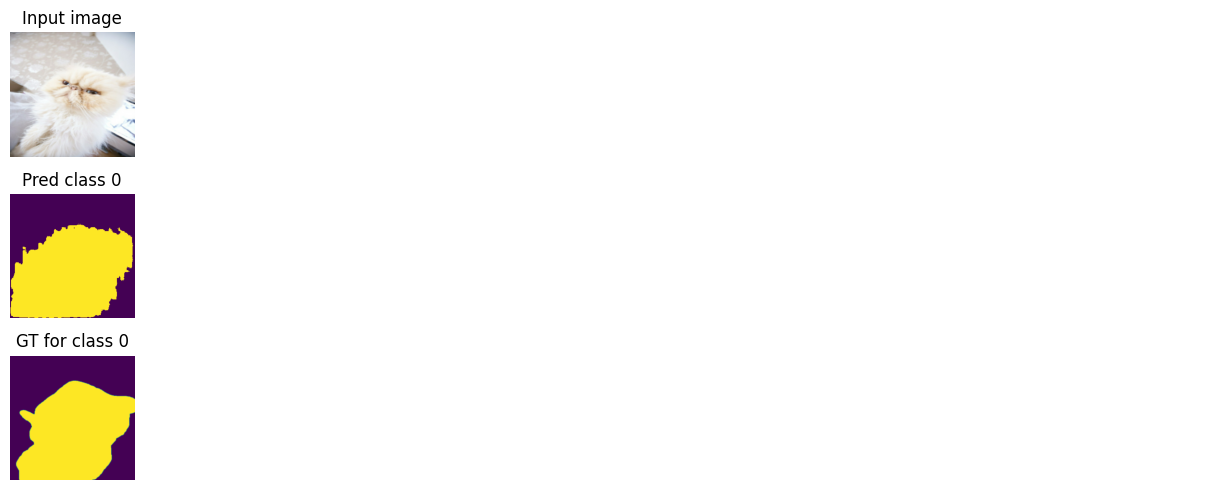

Train loss: 0.07859 | Time: 18m 3s | Val loss: 0.08090
Train_DICE_avg: 0.92815 | Train_Jaccard_avg: 0.87008 | Train_Sensitivity_avg: 0.92468 | Train_Specificity_avg: 0.94644 
Class 0 - Train_DICE: 0.92815 | Train_Jaccard: 0.87008 | Train_Sensitivity: 0.92468 | Train_Specificity: 0.94644 
Val_DICE_avg: 0.92581 | Val_Jaccard_avg: 0.86792 | Val_Sensitivity_avg: 0.92288 | Val_Specificity_avg: 0.95060 
Class 0 - Val_DICE: 0.92581 | Val_Jaccard: 0.86792 | Val_Sensitivity: 0.92288 | Val_Specificity: 0.95060 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07770 | Time: 18m 29s | Val loss: 0.07984
Train_DICE_avg: 0.92893 | Train_Jaccard_avg: 0.87136 | Train_Sensitivity_avg: 0.92494 | Train_Specificity_avg: 0.94700 
Class 0 - Train_DICE: 0.92893 | Train_Jaccard: 0.87136 | Train_Sensitivity: 0.92494 | Train_Specificity: 0.94700 
Val_DICE_avg: 0.92656 | Val_Jaccard_avg: 0.86909 | Val_Sensitivity_avg: 0.92360 | Val_Specificity_avg: 0.95101 
Class 0 - Val_DICE: 0.92656 | Val_Jaccard: 0.86909 | Val_Sensitivity: 0.92360 | Val_Specificity: 0.95101 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07564 | Time: 18m 56s | Val loss: 0.07943
Train_DICE_avg: 0.93076 | Train_Jaccard_avg: 0.87442 | Train_Sensitivity_avg: 0.92862 | Train_Specificity_avg: 0.94749 
Class 0 - Train_DICE: 0.93076 | Train_Jaccard: 0.87442 | Train_Sensitivity: 0.92862 | Train_Specificity: 0.94749 
Val_DICE_avg: 0.92692 | Val_Jaccard_avg: 0.86975 | Val_Sensitivity_avg: 0.92344 | Val_Specificity_avg: 0.95156 
Class 0 - Val_DICE: 0.92692 | Val_Jaccard: 0.86975 | Val_Sensitivity: 0.92344 | Val_Specificity: 0.95156 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07538 | Time: 19m 22s | Val loss: 0.07818
Train_DICE_avg: 0.93077 | Train_Jaccard_avg: 0.87448 | Train_Sensitivity_avg: 0.92746 | Train_Specificity_avg: 0.94820 
Class 0 - Train_DICE: 0.93077 | Train_Jaccard: 0.87448 | Train_Sensitivity: 0.92746 | Train_Specificity: 0.94820 
Val_DICE_avg: 0.92777 | Val_Jaccard_avg: 0.87115 | Val_Sensitivity_avg: 0.92730 | Val_Specificity_avg: 0.95050 
Class 0 - Val_DICE: 0.92777 | Val_Jaccard: 0.87115 | Val_Sensitivity: 0.92730 | Val_Specificity: 0.95050 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07349 | Time: 19m 48s | Val loss: 0.07779
Train_DICE_avg: 0.93253 | Train_Jaccard_avg: 0.87737 | Train_Sensitivity_avg: 0.92968 | Train_Specificity_avg: 0.94918 
Class 0 - Train_DICE: 0.93253 | Train_Jaccard: 0.87737 | Train_Sensitivity: 0.92968 | Train_Specificity: 0.94918 
Val_DICE_avg: 0.92801 | Val_Jaccard_avg: 0.87158 | Val_Sensitivity_avg: 0.92658 | Val_Specificity_avg: 0.95172 
Class 0 - Val_DICE: 0.92801 | Val_Jaccard: 0.87158 | Val_Sensitivity: 0.92658 | Val_Specificity: 0.95172 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

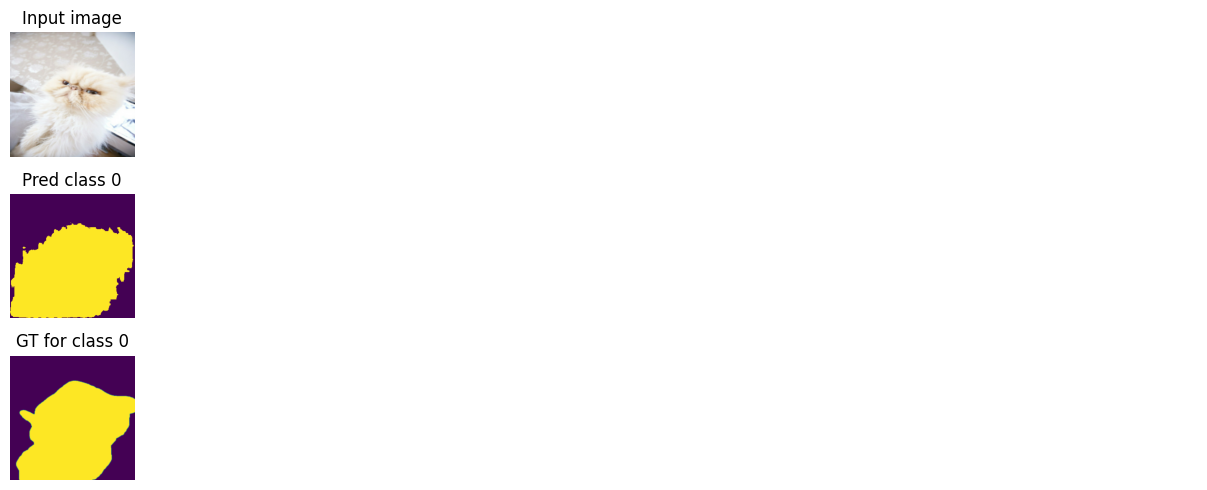

Train loss: 0.07340 | Time: 20m 15s | Val loss: 0.07718
Train_DICE_avg: 0.93246 | Train_Jaccard_avg: 0.87739 | Train_Sensitivity_avg: 0.93035 | Train_Specificity_avg: 0.94833 
Class 0 - Train_DICE: 0.93246 | Train_Jaccard: 0.87739 | Train_Sensitivity: 0.93035 | Train_Specificity: 0.94833 
Val_DICE_avg: 0.92870 | Val_Jaccard_avg: 0.87272 | Val_Sensitivity_avg: 0.92538 | Val_Specificity_avg: 0.95309 
Class 0 - Val_DICE: 0.92870 | Val_Jaccard: 0.87272 | Val_Sensitivity: 0.92538 | Val_Specificity: 0.95309 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07328 | Time: 20m 42s | Val loss: 0.07703
Train_DICE_avg: 0.93238 | Train_Jaccard_avg: 0.87721 | Train_Sensitivity_avg: 0.92849 | Train_Specificity_avg: 0.94937 
Class 0 - Train_DICE: 0.93238 | Train_Jaccard: 0.87721 | Train_Sensitivity: 0.92849 | Train_Specificity: 0.94937 
Val_DICE_avg: 0.92857 | Val_Jaccard_avg: 0.87249 | Val_Sensitivity_avg: 0.92668 | Val_Specificity_avg: 0.95217 
Class 0 - Val_DICE: 0.92857 | Val_Jaccard: 0.87249 | Val_Sensitivity: 0.92668 | Val_Specificity: 0.95217 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07218 | Time: 21m 8s | Val loss: 0.07639
Train_DICE_avg: 0.93333 | Train_Jaccard_avg: 0.87876 | Train_Sensitivity_avg: 0.93034 | Train_Specificity_avg: 0.94960 
Class 0 - Train_DICE: 0.93333 | Train_Jaccard: 0.87876 | Train_Sensitivity: 0.93034 | Train_Specificity: 0.94960 
Val_DICE_avg: 0.92901 | Val_Jaccard_avg: 0.87326 | Val_Sensitivity_avg: 0.92833 | Val_Specificity_avg: 0.95172 
Class 0 - Val_DICE: 0.92901 | Val_Jaccard: 0.87326 | Val_Sensitivity: 0.92833 | Val_Specificity: 0.95172 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07268 | Time: 21m 35s | Val loss: 0.07599
Train_DICE_avg: 0.93266 | Train_Jaccard_avg: 0.87782 | Train_Sensitivity_avg: 0.92865 | Train_Specificity_avg: 0.95007 
Class 0 - Train_DICE: 0.93266 | Train_Jaccard: 0.87782 | Train_Sensitivity: 0.92865 | Train_Specificity: 0.95007 
Val_DICE_avg: 0.92927 | Val_Jaccard_avg: 0.87373 | Val_Sensitivity_avg: 0.92850 | Val_Specificity_avg: 0.95212 
Class 0 - Val_DICE: 0.92927 | Val_Jaccard: 0.87373 | Val_Sensitivity: 0.92850 | Val_Specificity: 0.95212 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07117 | Time: 22m 1s | Val loss: 0.07616
Train_DICE_avg: 0.93420 | Train_Jaccard_avg: 0.88027 | Train_Sensitivity_avg: 0.93209 | Train_Specificity_avg: 0.94893 
Class 0 - Train_DICE: 0.93420 | Train_Jaccard: 0.88027 | Train_Sensitivity: 0.93209 | Train_Specificity: 0.94893 
Val_DICE_avg: 0.92913 | Val_Jaccard_avg: 0.87357 | Val_Sensitivity_avg: 0.92776 | Val_Specificity_avg: 0.95272 
Class 0 - Val_DICE: 0.92913 | Val_Jaccard: 0.87357 | Val_Sensitivity: 0.92776 | Val_Specificity: 0.95272 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

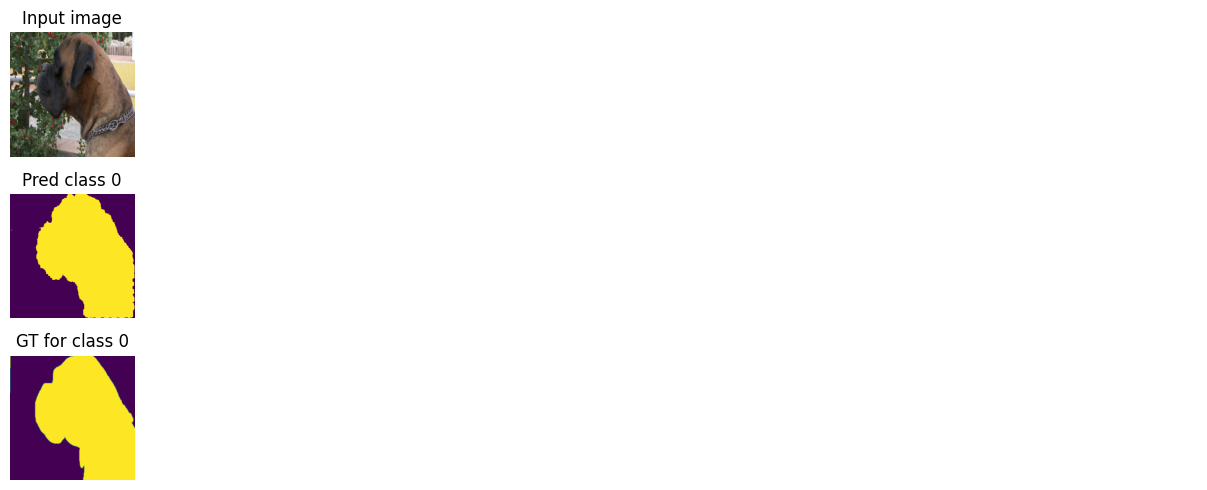

Train loss: 0.07088 | Time: 22m 28s | Val loss: 0.07552
Train_DICE_avg: 0.93428 | Train_Jaccard_avg: 0.88041 | Train_Sensitivity_avg: 0.93179 | Train_Specificity_avg: 0.94884 
Class 0 - Train_DICE: 0.93428 | Train_Jaccard: 0.88041 | Train_Sensitivity: 0.93179 | Train_Specificity: 0.94884 
Val_DICE_avg: 0.92969 | Val_Jaccard_avg: 0.87445 | Val_Sensitivity_avg: 0.92816 | Val_Specificity_avg: 0.95325 
Class 0 - Val_DICE: 0.92969 | Val_Jaccard: 0.87445 | Val_Sensitivity: 0.92816 | Val_Specificity: 0.95325 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06977 | Time: 22m 54s | Val loss: 0.07537
Train_DICE_avg: 0.93536 | Train_Jaccard_avg: 0.88237 | Train_Sensitivity_avg: 0.93462 | Train_Specificity_avg: 0.95046 
Class 0 - Train_DICE: 0.93536 | Train_Jaccard: 0.88237 | Train_Sensitivity: 0.93462 | Train_Specificity: 0.95046 
Val_DICE_avg: 0.92981 | Val_Jaccard_avg: 0.87468 | Val_Sensitivity_avg: 0.92860 | Val_Specificity_avg: 0.95303 
Class 0 - Val_DICE: 0.92981 | Val_Jaccard: 0.87468 | Val_Sensitivity: 0.92860 | Val_Specificity: 0.95303 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06956 | Time: 23m 21s | Val loss: 0.07514
Train_DICE_avg: 0.93555 | Train_Jaccard_avg: 0.88256 | Train_Sensitivity_avg: 0.93367 | Train_Specificity_avg: 0.94982 
Class 0 - Train_DICE: 0.93555 | Train_Jaccard: 0.88256 | Train_Sensitivity: 0.93367 | Train_Specificity: 0.94982 
Val_DICE_avg: 0.92993 | Val_Jaccard_avg: 0.87481 | Val_Sensitivity_avg: 0.92850 | Val_Specificity_avg: 0.95326 
Class 0 - Val_DICE: 0.92993 | Val_Jaccard: 0.87481 | Val_Sensitivity: 0.92850 | Val_Specificity: 0.95326 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06977 | Time: 23m 47s | Val loss: 0.07473
Train_DICE_avg: 0.93518 | Train_Jaccard_avg: 0.88209 | Train_Sensitivity_avg: 0.93252 | Train_Specificity_avg: 0.95118 
Class 0 - Train_DICE: 0.93518 | Train_Jaccard: 0.88209 | Train_Sensitivity: 0.93252 | Train_Specificity: 0.95118 
Val_DICE_avg: 0.93025 | Val_Jaccard_avg: 0.87535 | Val_Sensitivity_avg: 0.92738 | Val_Specificity_avg: 0.95445 
Class 0 - Val_DICE: 0.93025 | Val_Jaccard: 0.87535 | Val_Sensitivity: 0.92738 | Val_Specificity: 0.95445 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06894 | Time: 24m 14s | Val loss: 0.07476
Train_DICE_avg: 0.93600 | Train_Jaccard_avg: 0.88345 | Train_Sensitivity_avg: 0.93395 | Train_Specificity_avg: 0.95029 
Class 0 - Train_DICE: 0.93600 | Train_Jaccard: 0.88345 | Train_Sensitivity: 0.93395 | Train_Specificity: 0.95029 
Val_DICE_avg: 0.93020 | Val_Jaccard_avg: 0.87531 | Val_Sensitivity_avg: 0.92980 | Val_Specificity_avg: 0.95298 
Class 0 - Val_DICE: 0.93020 | Val_Jaccard: 0.87531 | Val_Sensitivity: 0.92980 | Val_Specificity: 0.95298 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

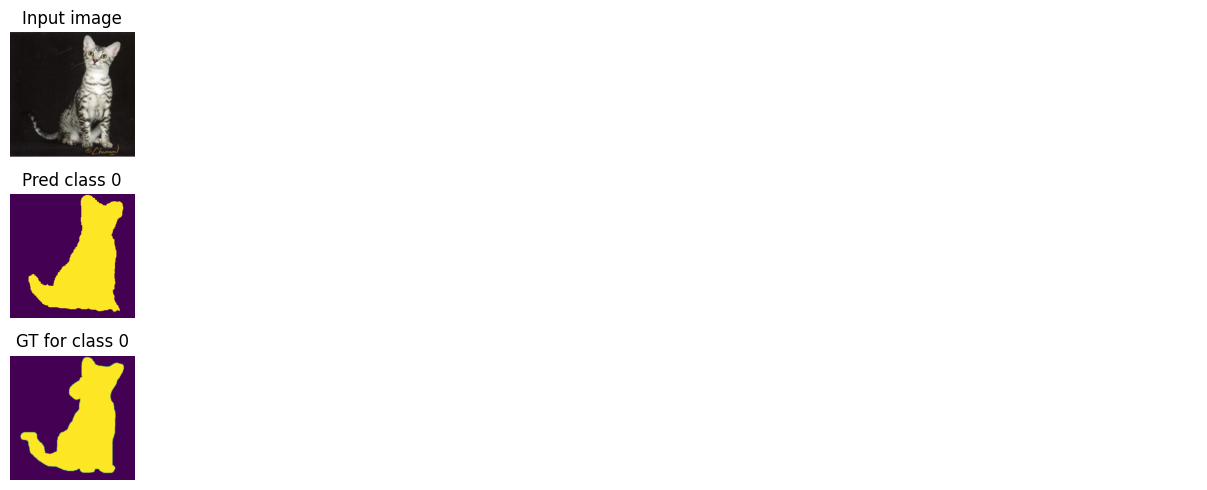

Train loss: 0.06837 | Time: 24m 41s | Val loss: 0.07447
Train_DICE_avg: 0.93653 | Train_Jaccard_avg: 0.88424 | Train_Sensitivity_avg: 0.93480 | Train_Specificity_avg: 0.95083 
Class 0 - Train_DICE: 0.93653 | Train_Jaccard: 0.88424 | Train_Sensitivity: 0.93480 | Train_Specificity: 0.95083 
Val_DICE_avg: 0.93036 | Val_Jaccard_avg: 0.87561 | Val_Sensitivity_avg: 0.93035 | Val_Specificity_avg: 0.95277 
Class 0 - Val_DICE: 0.93036 | Val_Jaccard: 0.87561 | Val_Sensitivity: 0.93035 | Val_Specificity: 0.95277 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06819 | Time: 25m 7s | Val loss: 0.07423
Train_DICE_avg: 0.93662 | Train_Jaccard_avg: 0.88455 | Train_Sensitivity_avg: 0.93444 | Train_Specificity_avg: 0.95195 
Class 0 - Train_DICE: 0.93662 | Train_Jaccard: 0.88455 | Train_Sensitivity: 0.93444 | Train_Specificity: 0.95195 
Val_DICE_avg: 0.93052 | Val_Jaccard_avg: 0.87588 | Val_Sensitivity_avg: 0.93088 | Val_Specificity_avg: 0.95299 
Class 0 - Val_DICE: 0.93052 | Val_Jaccard: 0.87588 | Val_Sensitivity: 0.93088 | Val_Specificity: 0.95299 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06881 | Time: 25m 34s | Val loss: 0.07394
Train_DICE_avg: 0.93592 | Train_Jaccard_avg: 0.88337 | Train_Sensitivity_avg: 0.93431 | Train_Specificity_avg: 0.95013 
Class 0 - Train_DICE: 0.93592 | Train_Jaccard: 0.88337 | Train_Sensitivity: 0.93431 | Train_Specificity: 0.95013 
Val_DICE_avg: 0.93093 | Val_Jaccard_avg: 0.87657 | Val_Sensitivity_avg: 0.92872 | Val_Specificity_avg: 0.95448 
Class 0 - Val_DICE: 0.93093 | Val_Jaccard: 0.87657 | Val_Sensitivity: 0.92872 | Val_Specificity: 0.95448 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06759 | Time: 26m 0s | Val loss: 0.07384
Train_DICE_avg: 0.93717 | Train_Jaccard_avg: 0.88534 | Train_Sensitivity_avg: 0.93521 | Train_Specificity_avg: 0.95113 
Class 0 - Train_DICE: 0.93717 | Train_Jaccard: 0.88534 | Train_Sensitivity: 0.93521 | Train_Specificity: 0.95113 
Val_DICE_avg: 0.93084 | Val_Jaccard_avg: 0.87644 | Val_Sensitivity_avg: 0.93159 | Val_Specificity_avg: 0.95252 
Class 0 - Val_DICE: 0.93084 | Val_Jaccard: 0.87644 | Val_Sensitivity: 0.93159 | Val_Specificity: 0.95252 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06769 | Time: 26m 27s | Val loss: 0.07354
Train_DICE_avg: 0.93687 | Train_Jaccard_avg: 0.88484 | Train_Sensitivity_avg: 0.93512 | Train_Specificity_avg: 0.95099 
Class 0 - Train_DICE: 0.93687 | Train_Jaccard: 0.88484 | Train_Sensitivity: 0.93512 | Train_Specificity: 0.95099 
Val_DICE_avg: 0.93108 | Val_Jaccard_avg: 0.87682 | Val_Sensitivity_avg: 0.93144 | Val_Specificity_avg: 0.95307 
Class 0 - Val_DICE: 0.93108 | Val_Jaccard: 0.87682 | Val_Sensitivity: 0.93144 | Val_Specificity: 0.95307 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

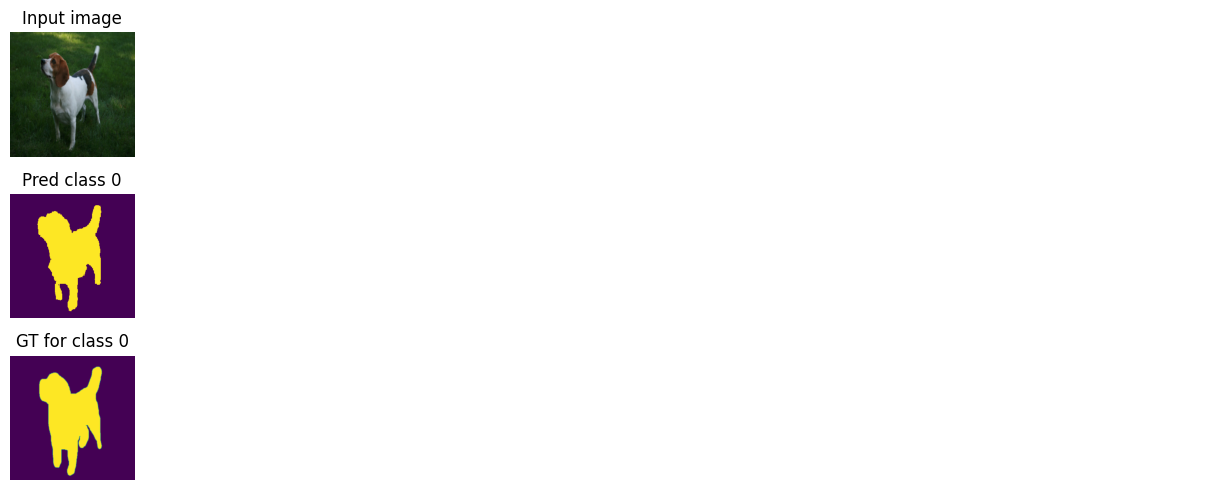

Train loss: 0.06700 | Time: 26m 54s | Val loss: 0.07362
Train_DICE_avg: 0.93758 | Train_Jaccard_avg: 0.88606 | Train_Sensitivity_avg: 0.93595 | Train_Specificity_avg: 0.95133 
Class 0 - Train_DICE: 0.93758 | Train_Jaccard: 0.88606 | Train_Sensitivity: 0.93595 | Train_Specificity: 0.95133 
Val_DICE_avg: 0.93101 | Val_Jaccard_avg: 0.87674 | Val_Sensitivity_avg: 0.93013 | Val_Specificity_avg: 0.95384 
Class 0 - Val_DICE: 0.93101 | Val_Jaccard: 0.87674 | Val_Sensitivity: 0.93013 | Val_Specificity: 0.95384 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 211MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]



Global Performance Metrics:
Loss mean: 0.07031, std: 0.00795
Dice Coefficient mean: 0.93440, std: 0.04300
Jaccard Index mean: 0.87965, std: 0.06876
Sensitivity mean: 0.94042, std: 0.05030
Specificity mean: 0.95340, std: 0.04506

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93440, std: 0.04300
Jaccard mean: 0.87965, std: 0.06876
Sensitivity mean: 0.94042, std: 0.05030
Specificity mean: 0.95340, std: 0.04506


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-FCN-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.47 GB
GPU Memory - Reserved: 4.21 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

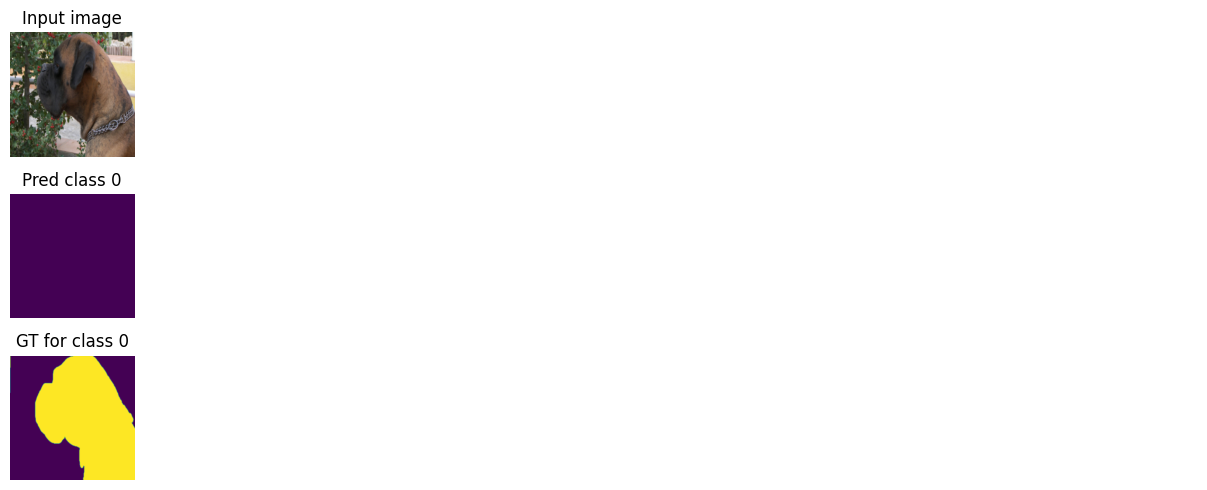

Train loss: 0.68004 | Time: 0m 27s | Val loss: 0.68027
Train_DICE_avg: 0.00292 | Train_Jaccard_avg: 0.00289 | Train_Sensitivity_avg: 0.79116 | Train_Specificity_avg: 0.58689 
Class 0 - Train_DICE: 0.00292 | Train_Jaccard: 0.00289 | Train_Sensitivity: 0.79116 | Train_Specificity: 0.58689 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.58377 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.58377 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.67174 | Time: 0m 53s | Val loss: 0.67438
Train_DICE_avg: 0.00183 | Train_Jaccard_avg: 0.00092 | Train_Sensitivity_avg: 0.60436 | Train_Specificity_avg: 0.58731 
Class 0 - Train_DICE: 0.00183 | Train_Jaccard: 0.00092 | Train_Sensitivity: 0.60436 | Train_Specificity: 0.58731 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.58377 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.58377 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.66030 | Time: 1m 20s | Val loss: 0.65383
Train_DICE_avg: 0.01954 | Train_Jaccard_avg: 0.01003 | Train_Sensitivity_avg: 0.76888 | Train_Specificity_avg: 0.58898 
Class 0 - Train_DICE: 0.01954 | Train_Jaccard: 0.01003 | Train_Sensitivity: 0.76888 | Train_Specificity: 0.58898 
Val_DICE_avg: 0.01545 | Val_Jaccard_avg: 0.00787 | Val_Sensitivity_avg: 0.83536 | Val_Specificity_avg: 0.58509 
Class 0 - Val_DICE: 0.01545 | Val_Jaccard: 0.00787 | Val_Sensitivity: 0.83536 | Val_Specificity: 0.58509 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.64638 | Time: 1m 47s | Val loss: 0.63965
Train_DICE_avg: 0.08890 | Train_Jaccard_avg: 0.04828 | Train_Sensitivity_avg: 0.83378 | Train_Specificity_avg: 0.59588 
Class 0 - Train_DICE: 0.08890 | Train_Jaccard: 0.04828 | Train_Sensitivity: 0.83378 | Train_Specificity: 0.59588 
Val_DICE_avg: 0.15540 | Val_Jaccard_avg: 0.08704 | Val_Sensitivity_avg: 0.83206 | Val_Specificity_avg: 0.60049 
Class 0 - Val_DICE: 0.15540 | Val_Jaccard: 0.08704 | Val_Sensitivity: 0.83206 | Val_Specificity: 0.60049 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.63360 | Time: 2m 14s | Val loss: 0.62915
Train_DICE_avg: 0.20268 | Train_Jaccard_avg: 0.11755 | Train_Sensitivity_avg: 0.83621 | Train_Specificity_avg: 0.61055 
Class 0 - Train_DICE: 0.20268 | Train_Jaccard: 0.11755 | Train_Sensitivity: 0.83621 | Train_Specificity: 0.61055 
Val_DICE_avg: 0.26208 | Val_Jaccard_avg: 0.15668 | Val_Sensitivity_avg: 0.83701 | Val_Specificity_avg: 0.61665 
Class 0 - Val_DICE: 0.26208 | Val_Jaccard: 0.15668 | Val_Sensitivity: 0.83701 | Val_Specificity: 0.61665 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

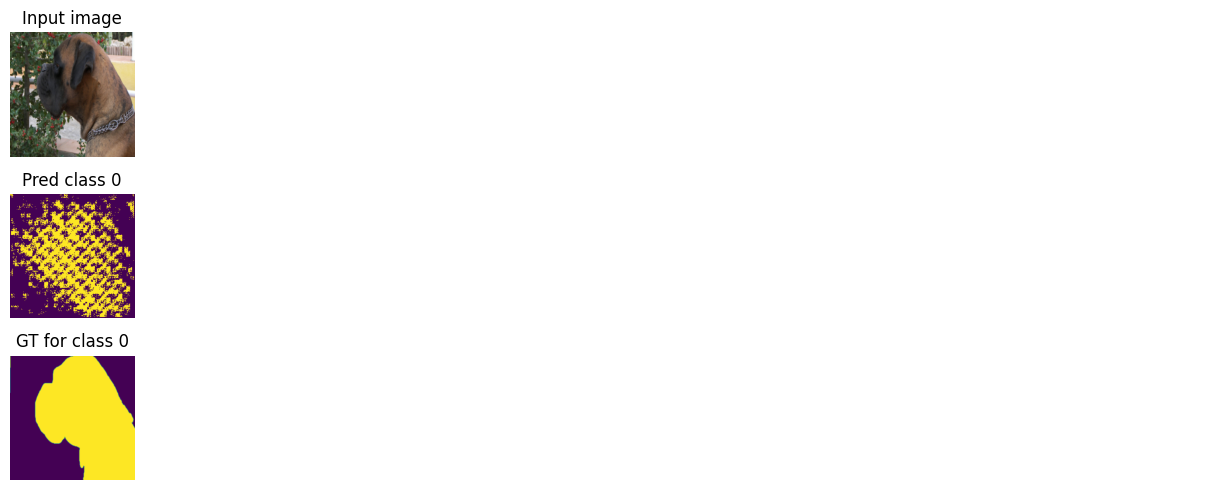

Train loss: 0.62318 | Time: 2m 41s | Val loss: 0.61927
Train_DICE_avg: 0.30240 | Train_Jaccard_avg: 0.18534 | Train_Sensitivity_avg: 0.83554 | Train_Specificity_avg: 0.62632 
Class 0 - Train_DICE: 0.30240 | Train_Jaccard: 0.18534 | Train_Sensitivity: 0.83554 | Train_Specificity: 0.62632 
Val_DICE_avg: 0.31992 | Val_Jaccard_avg: 0.19818 | Val_Sensitivity_avg: 0.84804 | Val_Specificity_avg: 0.62760 
Class 0 - Val_DICE: 0.31992 | Val_Jaccard: 0.19818 | Val_Sensitivity: 0.84804 | Val_Specificity: 0.62760 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.61252 | Time: 3m 8s | Val loss: 0.60980
Train_DICE_avg: 0.37741 | Train_Jaccard_avg: 0.24161 | Train_Sensitivity_avg: 0.83313 | Train_Specificity_avg: 0.64252 
Class 0 - Train_DICE: 0.37741 | Train_Jaccard: 0.24161 | Train_Sensitivity: 0.83313 | Train_Specificity: 0.64252 
Val_DICE_avg: 0.38763 | Val_Jaccard_avg: 0.24979 | Val_Sensitivity_avg: 0.84903 | Val_Specificity_avg: 0.64214 
Class 0 - Val_DICE: 0.38763 | Val_Jaccard: 0.24979 | Val_Sensitivity: 0.84903 | Val_Specificity: 0.64214 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.60061 | Time: 3m 35s | Val loss: 0.59796
Train_DICE_avg: 0.44789 | Train_Jaccard_avg: 0.29810 | Train_Sensitivity_avg: 0.83680 | Train_Specificity_avg: 0.65961 
Class 0 - Train_DICE: 0.44789 | Train_Jaccard: 0.29810 | Train_Sensitivity: 0.83680 | Train_Specificity: 0.65961 
Val_DICE_avg: 0.44617 | Val_Jaccard_avg: 0.29738 | Val_Sensitivity_avg: 0.85342 | Val_Specificity_avg: 0.65668 
Class 0 - Val_DICE: 0.44617 | Val_Jaccard: 0.29738 | Val_Sensitivity: 0.85342 | Val_Specificity: 0.65668 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.58716 | Time: 4m 1s | Val loss: 0.58555
Train_DICE_avg: 0.50927 | Train_Jaccard_avg: 0.35106 | Train_Sensitivity_avg: 0.83551 | Train_Specificity_avg: 0.67673 
Class 0 - Train_DICE: 0.50927 | Train_Jaccard: 0.35106 | Train_Sensitivity: 0.83551 | Train_Specificity: 0.67673 
Val_DICE_avg: 0.50116 | Val_Jaccard_avg: 0.34507 | Val_Sensitivity_avg: 0.85636 | Val_Specificity_avg: 0.67234 
Class 0 - Val_DICE: 0.50116 | Val_Jaccard: 0.34507 | Val_Sensitivity: 0.85636 | Val_Specificity: 0.67234 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.57398 | Time: 4m 28s | Val loss: 0.57265
Train_DICE_avg: 0.55563 | Train_Jaccard_avg: 0.39441 | Train_Sensitivity_avg: 0.83657 | Train_Specificity_avg: 0.69269 
Class 0 - Train_DICE: 0.55563 | Train_Jaccard: 0.39441 | Train_Sensitivity: 0.83657 | Train_Specificity: 0.69269 
Val_DICE_avg: 0.55730 | Val_Jaccard_avg: 0.39679 | Val_Sensitivity_avg: 0.85609 | Val_Specificity_avg: 0.69077 
Class 0 - Val_DICE: 0.55730 | Val_Jaccard: 0.39679 | Val_Sensitivity: 0.85609 | Val_Specificity: 0.69077 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

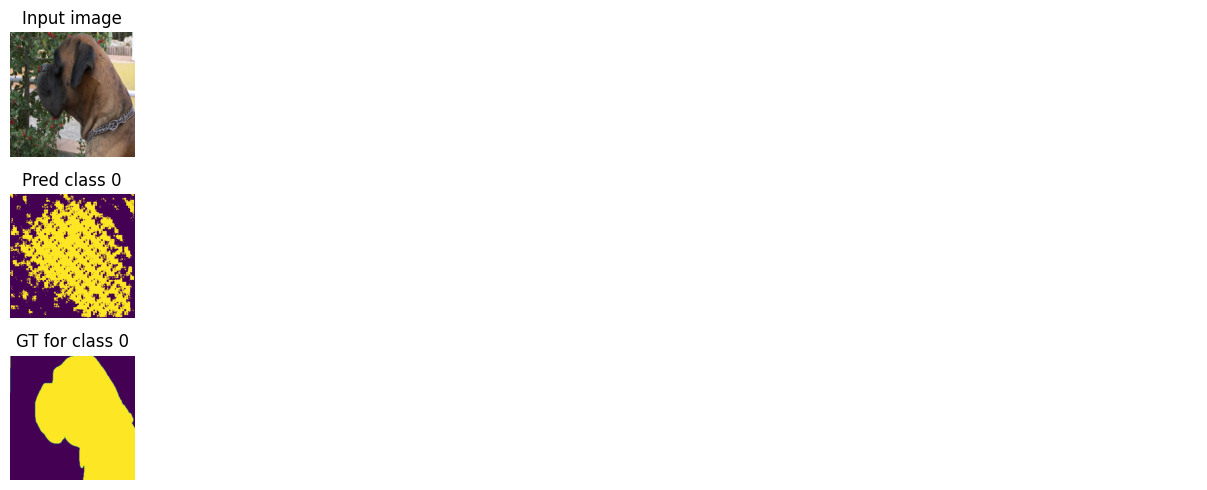

Train loss: 0.56115 | Time: 4m 56s | Val loss: 0.56215
Train_DICE_avg: 0.59568 | Train_Jaccard_avg: 0.43321 | Train_Sensitivity_avg: 0.83339 | Train_Specificity_avg: 0.70729 
Class 0 - Train_DICE: 0.59568 | Train_Jaccard: 0.43321 | Train_Sensitivity: 0.83339 | Train_Specificity: 0.70729 
Val_DICE_avg: 0.60645 | Val_Jaccard_avg: 0.44434 | Val_Sensitivity_avg: 0.84935 | Val_Specificity_avg: 0.70934 
Class 0 - Val_DICE: 0.60645 | Val_Jaccard: 0.44434 | Val_Sensitivity: 0.84935 | Val_Specificity: 0.70934 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.55056 | Time: 5m 23s | Val loss: 0.55173
Train_DICE_avg: 0.61756 | Train_Jaccard_avg: 0.45531 | Train_Sensitivity_avg: 0.83587 | Train_Specificity_avg: 0.71680 
Class 0 - Train_DICE: 0.61756 | Train_Jaccard: 0.45531 | Train_Sensitivity: 0.83587 | Train_Specificity: 0.71680 
Val_DICE_avg: 0.63173 | Val_Jaccard_avg: 0.47021 | Val_Sensitivity_avg: 0.85070 | Val_Specificity_avg: 0.71986 
Class 0 - Val_DICE: 0.63173 | Val_Jaccard: 0.47021 | Val_Sensitivity: 0.85070 | Val_Specificity: 0.71986 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.54026 | Time: 5m 50s | Val loss: 0.53994
Train_DICE_avg: 0.63699 | Train_Jaccard_avg: 0.47524 | Train_Sensitivity_avg: 0.83884 | Train_Specificity_avg: 0.72487 
Class 0 - Train_DICE: 0.63699 | Train_Jaccard: 0.47524 | Train_Sensitivity: 0.83884 | Train_Specificity: 0.72487 
Val_DICE_avg: 0.65470 | Val_Jaccard_avg: 0.49452 | Val_Sensitivity_avg: 0.85185 | Val_Specificity_avg: 0.73022 
Class 0 - Val_DICE: 0.65470 | Val_Jaccard: 0.49452 | Val_Sensitivity: 0.85185 | Val_Specificity: 0.73022 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.52939 | Time: 6m 17s | Val loss: 0.52827
Train_DICE_avg: 0.65265 | Train_Jaccard_avg: 0.49230 | Train_Sensitivity_avg: 0.83973 | Train_Specificity_avg: 0.73207 
Class 0 - Train_DICE: 0.65265 | Train_Jaccard: 0.49230 | Train_Sensitivity: 0.83973 | Train_Specificity: 0.73207 
Val_DICE_avg: 0.66881 | Val_Jaccard_avg: 0.50984 | Val_Sensitivity_avg: 0.85707 | Val_Specificity_avg: 0.73624 
Class 0 - Val_DICE: 0.66881 | Val_Jaccard: 0.50984 | Val_Sensitivity: 0.85707 | Val_Specificity: 0.73624 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.51641 | Time: 6m 44s | Val loss: 0.51605
Train_DICE_avg: 0.67110 | Train_Jaccard_avg: 0.51241 | Train_Sensitivity_avg: 0.84135 | Train_Specificity_avg: 0.74016 
Class 0 - Train_DICE: 0.67110 | Train_Jaccard: 0.51241 | Train_Sensitivity: 0.84135 | Train_Specificity: 0.74016 
Val_DICE_avg: 0.69114 | Val_Jaccard_avg: 0.53482 | Val_Sensitivity_avg: 0.85603 | Val_Specificity_avg: 0.74766 
Class 0 - Val_DICE: 0.69114 | Val_Jaccard: 0.53482 | Val_Sensitivity: 0.85603 | Val_Specificity: 0.74766 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

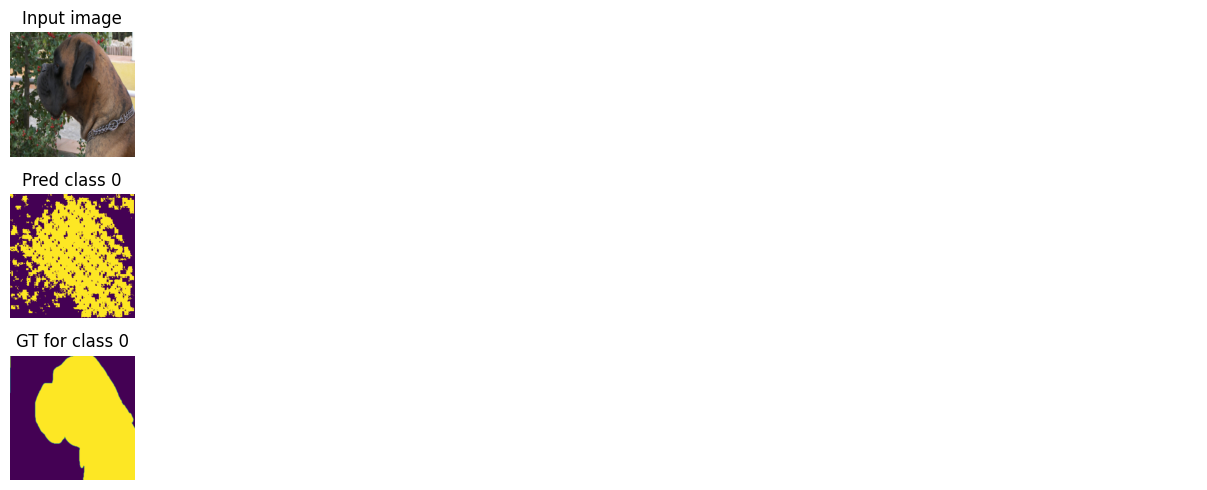

Train loss: 0.50454 | Time: 7m 12s | Val loss: 0.50064
Train_DICE_avg: 0.68521 | Train_Jaccard_avg: 0.52888 | Train_Sensitivity_avg: 0.84117 | Train_Specificity_avg: 0.74942 
Class 0 - Train_DICE: 0.68521 | Train_Jaccard: 0.52888 | Train_Sensitivity: 0.84117 | Train_Specificity: 0.74942 
Val_DICE_avg: 0.70474 | Val_Jaccard_avg: 0.55060 | Val_Sensitivity_avg: 0.86076 | Val_Specificity_avg: 0.75435 
Class 0 - Val_DICE: 0.70474 | Val_Jaccard: 0.55060 | Val_Sensitivity: 0.86076 | Val_Specificity: 0.75435 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.48671 | Time: 7m 39s | Val loss: 0.48371
Train_DICE_avg: 0.70101 | Train_Jaccard_avg: 0.54740 | Train_Sensitivity_avg: 0.84504 | Train_Specificity_avg: 0.75671 
Class 0 - Train_DICE: 0.70101 | Train_Jaccard: 0.54740 | Train_Sensitivity: 0.84504 | Train_Specificity: 0.75671 
Val_DICE_avg: 0.72372 | Val_Jaccard_avg: 0.57325 | Val_Sensitivity_avg: 0.86101 | Val_Specificity_avg: 0.76519 
Class 0 - Val_DICE: 0.72372 | Val_Jaccard: 0.57325 | Val_Sensitivity: 0.86101 | Val_Specificity: 0.76519 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.47100 | Time: 8m 6s | Val loss: 0.46445
Train_DICE_avg: 0.72029 | Train_Jaccard_avg: 0.57006 | Train_Sensitivity_avg: 0.84355 | Train_Specificity_avg: 0.76797 
Class 0 - Train_DICE: 0.72029 | Train_Jaccard: 0.57006 | Train_Sensitivity: 0.84355 | Train_Specificity: 0.76797 
Val_DICE_avg: 0.74495 | Val_Jaccard_avg: 0.59970 | Val_Sensitivity_avg: 0.85916 | Val_Specificity_avg: 0.77945 
Class 0 - Val_DICE: 0.74495 | Val_Jaccard: 0.59970 | Val_Sensitivity: 0.85916 | Val_Specificity: 0.77945 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.45333 | Time: 8m 33s | Val loss: 0.44272
Train_DICE_avg: 0.73452 | Train_Jaccard_avg: 0.58809 | Train_Sensitivity_avg: 0.84577 | Train_Specificity_avg: 0.77691 
Class 0 - Train_DICE: 0.73452 | Train_Jaccard: 0.58809 | Train_Sensitivity: 0.84577 | Train_Specificity: 0.77691 
Val_DICE_avg: 0.76092 | Val_Jaccard_avg: 0.62030 | Val_Sensitivity_avg: 0.86265 | Val_Specificity_avg: 0.79004 
Class 0 - Val_DICE: 0.76092 | Val_Jaccard: 0.62030 | Val_Sensitivity: 0.86265 | Val_Specificity: 0.79004 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.43608 | Time: 9m 1s | Val loss: 0.42316
Train_DICE_avg: 0.75126 | Train_Jaccard_avg: 0.60883 | Train_Sensitivity_avg: 0.84885 | Train_Specificity_avg: 0.78781 
Class 0 - Train_DICE: 0.75126 | Train_Jaccard: 0.60883 | Train_Sensitivity: 0.84885 | Train_Specificity: 0.78781 
Val_DICE_avg: 0.77655 | Val_Jaccard_avg: 0.64113 | Val_Sensitivity_avg: 0.86467 | Val_Specificity_avg: 0.80196 
Class 0 - Val_DICE: 0.77655 | Val_Jaccard: 0.64113 | Val_Sensitivity: 0.86467 | Val_Specificity: 0.80196 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

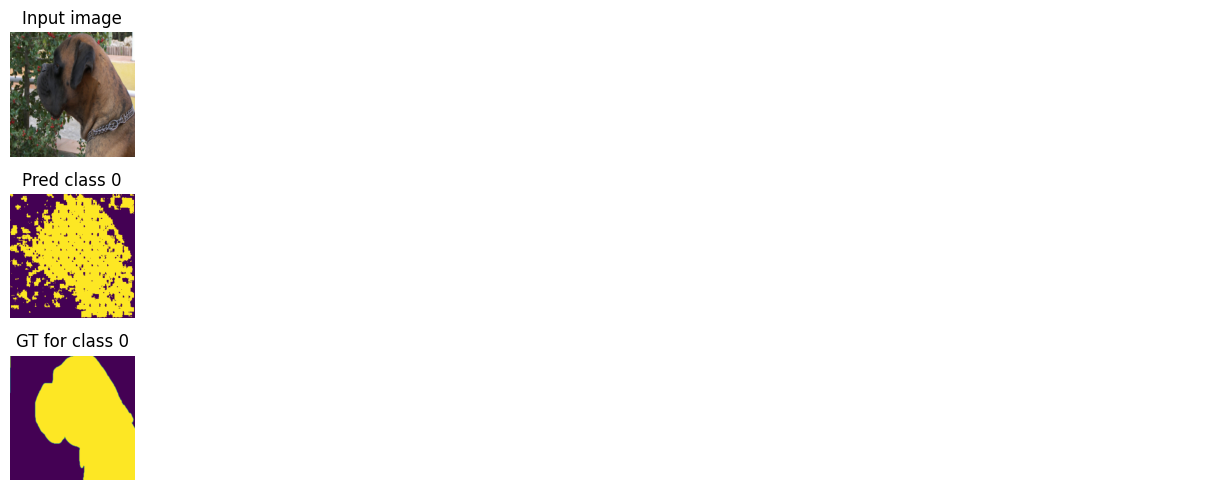

Train loss: 0.40944 | Time: 9m 28s | Val loss: 0.39330
Train_DICE_avg: 0.77467 | Train_Jaccard_avg: 0.63980 | Train_Sensitivity_avg: 0.85722 | Train_Specificity_avg: 0.80462 
Class 0 - Train_DICE: 0.77467 | Train_Jaccard: 0.63980 | Train_Sensitivity: 0.85722 | Train_Specificity: 0.80462 
Val_DICE_avg: 0.80424 | Val_Jaccard_avg: 0.67920 | Val_Sensitivity_avg: 0.87290 | Val_Specificity_avg: 0.82492 
Class 0 - Val_DICE: 0.80424 | Val_Jaccard: 0.67920 | Val_Sensitivity: 0.87290 | Val_Specificity: 0.82492 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.38537 | Time: 9m 56s | Val loss: 0.37437
Train_DICE_avg: 0.79167 | Train_Jaccard_avg: 0.66254 | Train_Sensitivity_avg: 0.87559 | Train_Specificity_avg: 0.81473 
Class 0 - Train_DICE: 0.79167 | Train_Jaccard: 0.66254 | Train_Sensitivity: 0.87559 | Train_Specificity: 0.81473 
Val_DICE_avg: 0.81963 | Val_Jaccard_avg: 0.70089 | Val_Sensitivity_avg: 0.88268 | Val_Specificity_avg: 0.83701 
Class 0 - Val_DICE: 0.81963 | Val_Jaccard: 0.70089 | Val_Sensitivity: 0.88268 | Val_Specificity: 0.83701 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.36754 | Time: 10m 23s | Val loss: 0.35611
Train_DICE_avg: 0.80538 | Train_Jaccard_avg: 0.68152 | Train_Sensitivity_avg: 0.88432 | Train_Specificity_avg: 0.82501 
Class 0 - Train_DICE: 0.80538 | Train_Jaccard: 0.68152 | Train_Sensitivity: 0.88432 | Train_Specificity: 0.82501 
Val_DICE_avg: 0.83031 | Val_Jaccard_avg: 0.71642 | Val_Sensitivity_avg: 0.88961 | Val_Specificity_avg: 0.84545 
Class 0 - Val_DICE: 0.83031 | Val_Jaccard: 0.71642 | Val_Sensitivity: 0.88961 | Val_Specificity: 0.84545 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.34889 | Time: 10m 50s | Val loss: 0.33895
Train_DICE_avg: 0.81834 | Train_Jaccard_avg: 0.69975 | Train_Sensitivity_avg: 0.89130 | Train_Specificity_avg: 0.83356 
Class 0 - Train_DICE: 0.81834 | Train_Jaccard: 0.69975 | Train_Sensitivity: 0.89130 | Train_Specificity: 0.83356 
Val_DICE_avg: 0.83881 | Val_Jaccard_avg: 0.72904 | Val_Sensitivity_avg: 0.89347 | Val_Specificity_avg: 0.85331 
Class 0 - Val_DICE: 0.83881 | Val_Jaccard: 0.72904 | Val_Sensitivity: 0.89347 | Val_Specificity: 0.85331 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.33452 | Time: 11m 17s | Val loss: 0.32367
Train_DICE_avg: 0.82827 | Train_Jaccard_avg: 0.71368 | Train_Sensitivity_avg: 0.89587 | Train_Specificity_avg: 0.84193 
Class 0 - Train_DICE: 0.82827 | Train_Jaccard: 0.71368 | Train_Sensitivity: 0.89587 | Train_Specificity: 0.84193 
Val_DICE_avg: 0.84610 | Val_Jaccard_avg: 0.73998 | Val_Sensitivity_avg: 0.89912 | Val_Specificity_avg: 0.85952 
Class 0 - Val_DICE: 0.84610 | Val_Jaccard: 0.73998 | Val_Sensitivity: 0.89912 | Val_Specificity: 0.85952 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

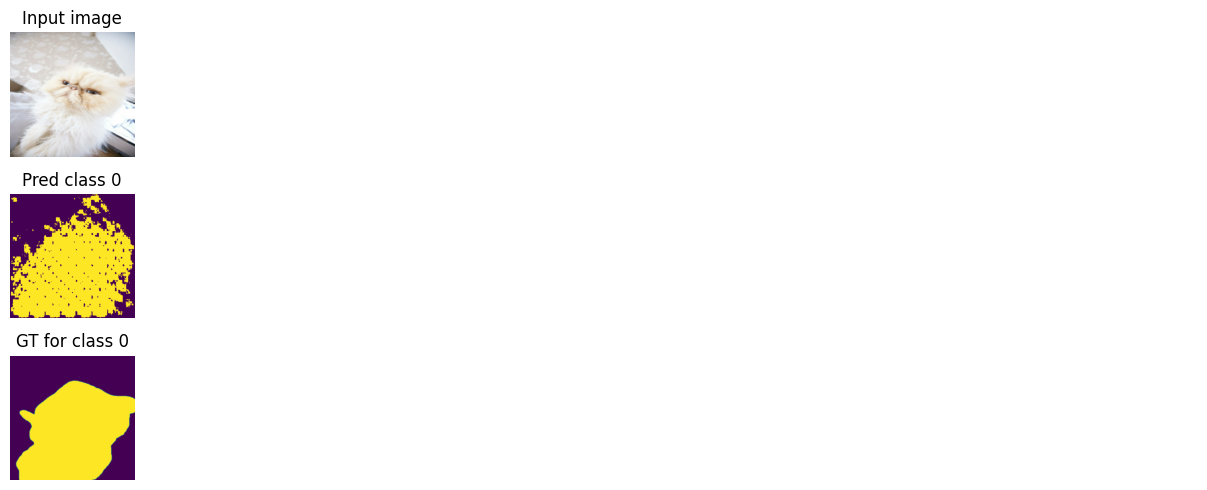

Train loss: 0.31867 | Time: 11m 45s | Val loss: 0.30964
Train_DICE_avg: 0.83600 | Train_Jaccard_avg: 0.72497 | Train_Sensitivity_avg: 0.90062 | Train_Specificity_avg: 0.84885 
Class 0 - Train_DICE: 0.83600 | Train_Jaccard: 0.72497 | Train_Sensitivity: 0.90062 | Train_Specificity: 0.84885 
Val_DICE_avg: 0.85390 | Val_Jaccard_avg: 0.75184 | Val_Sensitivity_avg: 0.90012 | Val_Specificity_avg: 0.86734 
Class 0 - Val_DICE: 0.85390 | Val_Jaccard: 0.75184 | Val_Sensitivity: 0.90012 | Val_Specificity: 0.86734 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.30496 | Time: 12m 12s | Val loss: 0.29533
Train_DICE_avg: 0.84294 | Train_Jaccard_avg: 0.73545 | Train_Sensitivity_avg: 0.90306 | Train_Specificity_avg: 0.85449 
Class 0 - Train_DICE: 0.84294 | Train_Jaccard: 0.73545 | Train_Sensitivity: 0.90306 | Train_Specificity: 0.85449 
Val_DICE_avg: 0.85754 | Val_Jaccard_avg: 0.75745 | Val_Sensitivity_avg: 0.90668 | Val_Specificity_avg: 0.86922 
Class 0 - Val_DICE: 0.85754 | Val_Jaccard: 0.75745 | Val_Sensitivity: 0.90668 | Val_Specificity: 0.86922 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.29179 | Time: 12m 39s | Val loss: 0.28274
Train_DICE_avg: 0.84864 | Train_Jaccard_avg: 0.74399 | Train_Sensitivity_avg: 0.90651 | Train_Specificity_avg: 0.85937 
Class 0 - Train_DICE: 0.84864 | Train_Jaccard: 0.74399 | Train_Sensitivity: 0.90651 | Train_Specificity: 0.85937 
Val_DICE_avg: 0.86271 | Val_Jaccard_avg: 0.76539 | Val_Sensitivity_avg: 0.90933 | Val_Specificity_avg: 0.87384 
Class 0 - Val_DICE: 0.86271 | Val_Jaccard: 0.76539 | Val_Sensitivity: 0.90933 | Val_Specificity: 0.87384 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.27865 | Time: 13m 7s | Val loss: 0.26796
Train_DICE_avg: 0.85529 | Train_Jaccard_avg: 0.75340 | Train_Sensitivity_avg: 0.90913 | Train_Specificity_avg: 0.86430 
Class 0 - Train_DICE: 0.85529 | Train_Jaccard: 0.75340 | Train_Sensitivity: 0.90913 | Train_Specificity: 0.86430 
Val_DICE_avg: 0.86516 | Val_Jaccard_avg: 0.76933 | Val_Sensitivity_avg: 0.91590 | Val_Specificity_avg: 0.87432 
Class 0 - Val_DICE: 0.86516 | Val_Jaccard: 0.76933 | Val_Sensitivity: 0.91590 | Val_Specificity: 0.87432 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.26535 | Time: 13m 34s | Val loss: 0.25843
Train_DICE_avg: 0.86146 | Train_Jaccard_avg: 0.76297 | Train_Sensitivity_avg: 0.91310 | Train_Specificity_avg: 0.87008 
Class 0 - Train_DICE: 0.86146 | Train_Jaccard: 0.76297 | Train_Sensitivity: 0.91310 | Train_Specificity: 0.87008 
Val_DICE_avg: 0.87008 | Val_Jaccard_avg: 0.77704 | Val_Sensitivity_avg: 0.91605 | Val_Specificity_avg: 0.87977 
Class 0 - Val_DICE: 0.87008 | Val_Jaccard: 0.77704 | Val_Sensitivity: 0.91605 | Val_Specificity: 0.87977 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

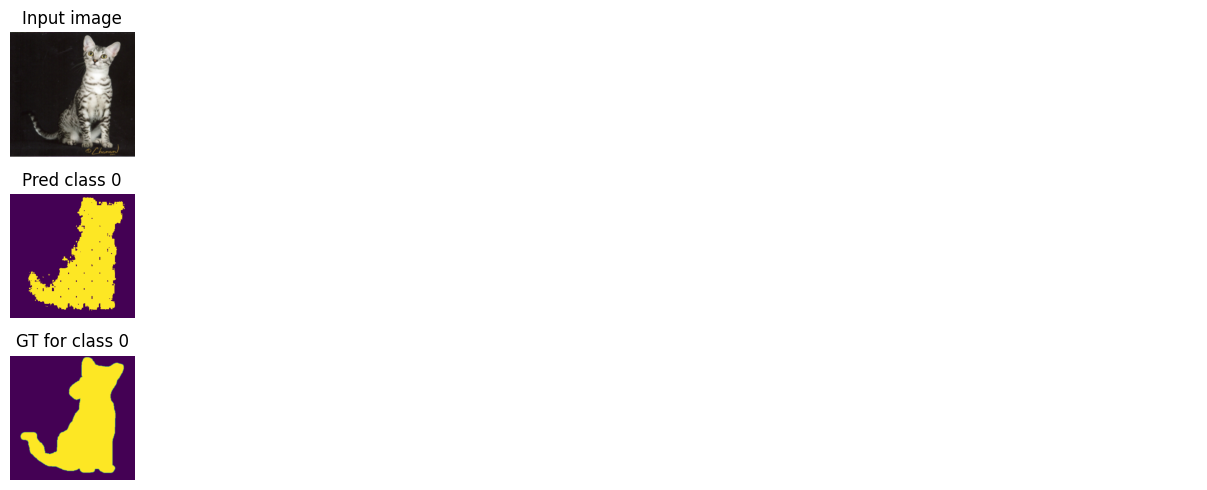

Train loss: 0.25442 | Time: 14m 2s | Val loss: 0.24099
Train_DICE_avg: 0.86679 | Train_Jaccard_avg: 0.77094 | Train_Sensitivity_avg: 0.91485 | Train_Specificity_avg: 0.87407 
Class 0 - Train_DICE: 0.86679 | Train_Jaccard: 0.77094 | Train_Sensitivity: 0.91485 | Train_Specificity: 0.87407 
Val_DICE_avg: 0.87971 | Val_Jaccard_avg: 0.79197 | Val_Sensitivity_avg: 0.91926 | Val_Specificity_avg: 0.88921 
Class 0 - Val_DICE: 0.87971 | Val_Jaccard: 0.79197 | Val_Sensitivity: 0.91926 | Val_Specificity: 0.88921 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.23470 | Time: 14m 29s | Val loss: 0.22231
Train_DICE_avg: 0.87591 | Train_Jaccard_avg: 0.78462 | Train_Sensitivity_avg: 0.92108 | Train_Specificity_avg: 0.87979 
Class 0 - Train_DICE: 0.87591 | Train_Jaccard: 0.78462 | Train_Sensitivity: 0.92108 | Train_Specificity: 0.87979 
Val_DICE_avg: 0.88321 | Val_Jaccard_avg: 0.79756 | Val_Sensitivity_avg: 0.93057 | Val_Specificity_avg: 0.88853 
Class 0 - Val_DICE: 0.88321 | Val_Jaccard: 0.79756 | Val_Sensitivity: 0.93057 | Val_Specificity: 0.88853 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.22016 | Time: 14m 56s | Val loss: 0.21141
Train_DICE_avg: 0.88265 | Train_Jaccard_avg: 0.79531 | Train_Sensitivity_avg: 0.92625 | Train_Specificity_avg: 0.88687 
Class 0 - Train_DICE: 0.88265 | Train_Jaccard: 0.79531 | Train_Sensitivity: 0.92625 | Train_Specificity: 0.88687 
Val_DICE_avg: 0.89097 | Val_Jaccard_avg: 0.81004 | Val_Sensitivity_avg: 0.93017 | Val_Specificity_avg: 0.89687 
Class 0 - Val_DICE: 0.89097 | Val_Jaccard: 0.81004 | Val_Sensitivity: 0.93017 | Val_Specificity: 0.89687 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.20813 | Time: 15m 23s | Val loss: 0.20100
Train_DICE_avg: 0.88823 | Train_Jaccard_avg: 0.80447 | Train_Sensitivity_avg: 0.92822 | Train_Specificity_avg: 0.89230 
Class 0 - Train_DICE: 0.88823 | Train_Jaccard: 0.80447 | Train_Sensitivity: 0.92822 | Train_Specificity: 0.89230 
Val_DICE_avg: 0.89384 | Val_Jaccard_avg: 0.81475 | Val_Sensitivity_avg: 0.93420 | Val_Specificity_avg: 0.89888 
Class 0 - Val_DICE: 0.89384 | Val_Jaccard: 0.81475 | Val_Sensitivity: 0.93420 | Val_Specificity: 0.89888 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.19948 | Time: 15m 51s | Val loss: 0.19199
Train_DICE_avg: 0.89200 | Train_Jaccard_avg: 0.81042 | Train_Sensitivity_avg: 0.93110 | Train_Specificity_avg: 0.89552 
Class 0 - Train_DICE: 0.89200 | Train_Jaccard: 0.81042 | Train_Sensitivity: 0.93110 | Train_Specificity: 0.89552 
Val_DICE_avg: 0.89721 | Val_Jaccard_avg: 0.82016 | Val_Sensitivity_avg: 0.93695 | Val_Specificity_avg: 0.90133 
Class 0 - Val_DICE: 0.89721 | Val_Jaccard: 0.82016 | Val_Sensitivity: 0.93695 | Val_Specificity: 0.90133 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

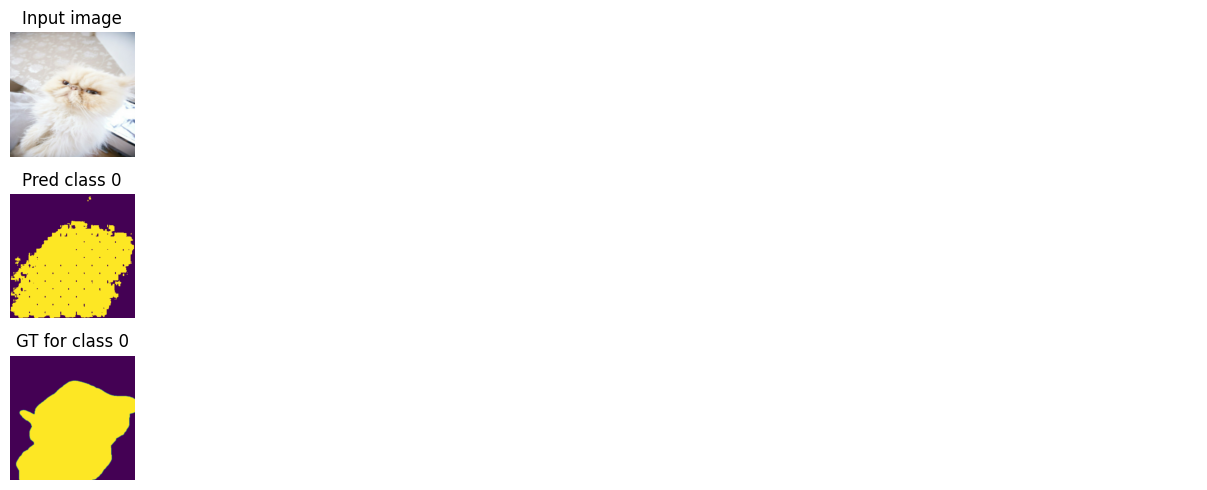

Train loss: 0.19078 | Time: 16m 18s | Val loss: 0.18455
Train_DICE_avg: 0.89627 | Train_Jaccard_avg: 0.81702 | Train_Sensitivity_avg: 0.93369 | Train_Specificity_avg: 0.89805 
Class 0 - Train_DICE: 0.89627 | Train_Jaccard: 0.81702 | Train_Sensitivity: 0.93369 | Train_Specificity: 0.89805 
Val_DICE_avg: 0.89996 | Val_Jaccard_avg: 0.82471 | Val_Sensitivity_avg: 0.94017 | Val_Specificity_avg: 0.90306 
Class 0 - Val_DICE: 0.89996 | Val_Jaccard: 0.82471 | Val_Sensitivity: 0.94017 | Val_Specificity: 0.90306 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.18562 | Time: 16m 46s | Val loss: 0.17977
Train_DICE_avg: 0.89834 | Train_Jaccard_avg: 0.82043 | Train_Sensitivity_avg: 0.93454 | Train_Specificity_avg: 0.90055 
Class 0 - Train_DICE: 0.89834 | Train_Jaccard: 0.82043 | Train_Sensitivity: 0.93454 | Train_Specificity: 0.90055 
Val_DICE_avg: 0.90218 | Val_Jaccard_avg: 0.82843 | Val_Sensitivity_avg: 0.94134 | Val_Specificity_avg: 0.90512 
Class 0 - Val_DICE: 0.90218 | Val_Jaccard: 0.82843 | Val_Sensitivity: 0.94134 | Val_Specificity: 0.90512 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17807 | Time: 17m 13s | Val loss: 0.17542
Train_DICE_avg: 0.90231 | Train_Jaccard_avg: 0.82690 | Train_Sensitivity_avg: 0.93672 | Train_Specificity_avg: 0.90411 
Class 0 - Train_DICE: 0.90231 | Train_Jaccard: 0.82690 | Train_Sensitivity: 0.93672 | Train_Specificity: 0.90411 
Val_DICE_avg: 0.90513 | Val_Jaccard_avg: 0.83339 | Val_Sensitivity_avg: 0.94172 | Val_Specificity_avg: 0.90877 
Class 0 - Val_DICE: 0.90513 | Val_Jaccard: 0.83339 | Val_Sensitivity: 0.94172 | Val_Specificity: 0.90877 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.17286 | Time: 17m 40s | Val loss: 0.17103
Train_DICE_avg: 0.90424 | Train_Jaccard_avg: 0.83009 | Train_Sensitivity_avg: 0.93894 | Train_Specificity_avg: 0.90567 
Class 0 - Train_DICE: 0.90424 | Train_Jaccard: 0.83009 | Train_Sensitivity: 0.93894 | Train_Specificity: 0.90567 
Val_DICE_avg: 0.90622 | Val_Jaccard_avg: 0.83522 | Val_Sensitivity_avg: 0.94402 | Val_Specificity_avg: 0.90936 
Class 0 - Val_DICE: 0.90622 | Val_Jaccard: 0.83522 | Val_Sensitivity: 0.94402 | Val_Specificity: 0.90936 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16848 | Time: 18m 8s | Val loss: 0.16735
Train_DICE_avg: 0.90643 | Train_Jaccard_avg: 0.83359 | Train_Sensitivity_avg: 0.93971 | Train_Specificity_avg: 0.90765 
Class 0 - Train_DICE: 0.90643 | Train_Jaccard: 0.83359 | Train_Sensitivity: 0.93971 | Train_Specificity: 0.90765 
Val_DICE_avg: 0.90742 | Val_Jaccard_avg: 0.83722 | Val_Sensitivity_avg: 0.94556 | Val_Specificity_avg: 0.91001 
Class 0 - Val_DICE: 0.90742 | Val_Jaccard: 0.83722 | Val_Sensitivity: 0.94556 | Val_Specificity: 0.91001 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

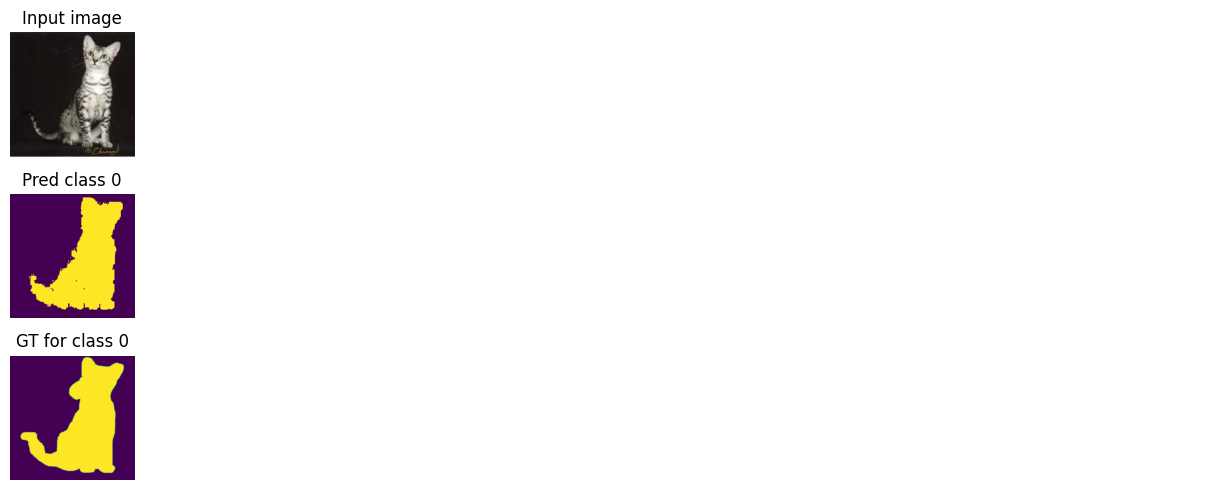

Train loss: 0.16544 | Time: 18m 36s | Val loss: 0.16428
Train_DICE_avg: 0.90828 | Train_Jaccard_avg: 0.83658 | Train_Sensitivity_avg: 0.94149 | Train_Specificity_avg: 0.90886 
Class 0 - Train_DICE: 0.90828 | Train_Jaccard: 0.83658 | Train_Sensitivity: 0.94149 | Train_Specificity: 0.90886 
Val_DICE_avg: 0.90814 | Val_Jaccard_avg: 0.83846 | Val_Sensitivity_avg: 0.94733 | Val_Specificity_avg: 0.91028 
Class 0 - Val_DICE: 0.90814 | Val_Jaccard: 0.83846 | Val_Sensitivity: 0.94733 | Val_Specificity: 0.91028 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.16304 | Time: 19m 3s | Val loss: 0.16210
Train_DICE_avg: 0.90917 | Train_Jaccard_avg: 0.83818 | Train_Sensitivity_avg: 0.94162 | Train_Specificity_avg: 0.91101 
Class 0 - Train_DICE: 0.90917 | Train_Jaccard: 0.83818 | Train_Sensitivity: 0.94162 | Train_Specificity: 0.91101 
Val_DICE_avg: 0.91027 | Val_Jaccard_avg: 0.84203 | Val_Sensitivity_avg: 0.94717 | Val_Specificity_avg: 0.91296 
Class 0 - Val_DICE: 0.91027 | Val_Jaccard: 0.84203 | Val_Sensitivity: 0.94717 | Val_Specificity: 0.91296 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15932 | Time: 19m 30s | Val loss: 0.16049
Train_DICE_avg: 0.91075 | Train_Jaccard_avg: 0.84089 | Train_Sensitivity_avg: 0.94265 | Train_Specificity_avg: 0.91166 
Class 0 - Train_DICE: 0.91075 | Train_Jaccard: 0.84089 | Train_Sensitivity: 0.94265 | Train_Specificity: 0.91166 
Val_DICE_avg: 0.91133 | Val_Jaccard_avg: 0.84378 | Val_Sensitivity_avg: 0.94765 | Val_Specificity_avg: 0.91438 
Class 0 - Val_DICE: 0.91133 | Val_Jaccard: 0.84378 | Val_Sensitivity: 0.94765 | Val_Specificity: 0.91438 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15476 | Time: 19m 58s | Val loss: 0.15826
Train_DICE_avg: 0.91450 | Train_Jaccard_avg: 0.84678 | Train_Sensitivity_avg: 0.94604 | Train_Specificity_avg: 0.91330 
Class 0 - Train_DICE: 0.91450 | Train_Jaccard: 0.84678 | Train_Sensitivity: 0.94604 | Train_Specificity: 0.91330 
Val_DICE_avg: 0.91185 | Val_Jaccard_avg: 0.84474 | Val_Sensitivity_avg: 0.94875 | Val_Specificity_avg: 0.91452 
Class 0 - Val_DICE: 0.91185 | Val_Jaccard: 0.84474 | Val_Sensitivity: 0.94875 | Val_Specificity: 0.91452 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.15298 | Time: 20m 25s | Val loss: 0.15667
Train_DICE_avg: 0.91364 | Train_Jaccard_avg: 0.84552 | Train_Sensitivity_avg: 0.94539 | Train_Specificity_avg: 0.91437 
Class 0 - Train_DICE: 0.91364 | Train_Jaccard: 0.84552 | Train_Sensitivity: 0.94539 | Train_Specificity: 0.91437 
Val_DICE_avg: 0.91312 | Val_Jaccard_avg: 0.84682 | Val_Sensitivity_avg: 0.94863 | Val_Specificity_avg: 0.91591 
Class 0 - Val_DICE: 0.91312 | Val_Jaccard: 0.84682 | Val_Sensitivity: 0.94863 | Val_Specificity: 0.91591 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

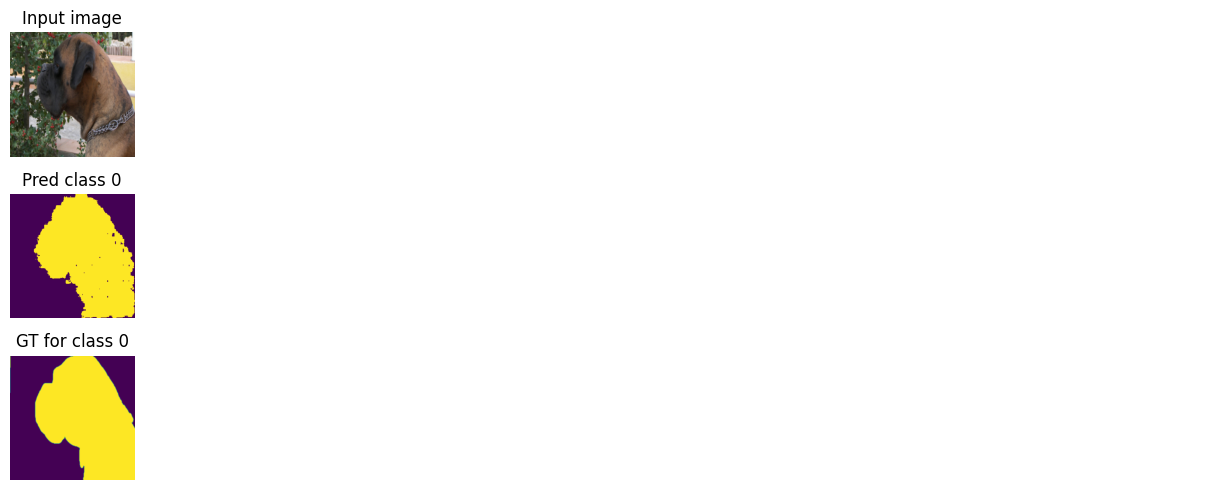

Train loss: 0.15088 | Time: 20m 53s | Val loss: 0.15525
Train_DICE_avg: 0.91566 | Train_Jaccard_avg: 0.84874 | Train_Sensitivity_avg: 0.94643 | Train_Specificity_avg: 0.91429 
Class 0 - Train_DICE: 0.91566 | Train_Jaccard: 0.84874 | Train_Sensitivity: 0.94643 | Train_Specificity: 0.91429 
Val_DICE_avg: 0.91383 | Val_Jaccard_avg: 0.84811 | Val_Sensitivity_avg: 0.94894 | Val_Specificity_avg: 0.91717 
Class 0 - Val_DICE: 0.91383 | Val_Jaccard: 0.84811 | Val_Sensitivity: 0.94894 | Val_Specificity: 0.91717 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14822 | Time: 21m 20s | Val loss: 0.15393
Train_DICE_avg: 0.91653 | Train_Jaccard_avg: 0.85033 | Train_Sensitivity_avg: 0.94746 | Train_Specificity_avg: 0.91664 
Class 0 - Train_DICE: 0.91653 | Train_Jaccard: 0.85033 | Train_Sensitivity: 0.94746 | Train_Specificity: 0.91664 
Val_DICE_avg: 0.91484 | Val_Jaccard_avg: 0.84974 | Val_Sensitivity_avg: 0.94888 | Val_Specificity_avg: 0.91825 
Class 0 - Val_DICE: 0.91484 | Val_Jaccard: 0.84974 | Val_Sensitivity: 0.94888 | Val_Specificity: 0.91825 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14818 | Time: 21m 47s | Val loss: 0.15320
Train_DICE_avg: 0.91709 | Train_Jaccard_avg: 0.85131 | Train_Sensitivity_avg: 0.94701 | Train_Specificity_avg: 0.91713 
Class 0 - Train_DICE: 0.91709 | Train_Jaccard: 0.85131 | Train_Sensitivity: 0.94701 | Train_Specificity: 0.91713 
Val_DICE_avg: 0.91473 | Val_Jaccard_avg: 0.84957 | Val_Sensitivity_avg: 0.94958 | Val_Specificity_avg: 0.91816 
Class 0 - Val_DICE: 0.91473 | Val_Jaccard: 0.84957 | Val_Sensitivity: 0.94958 | Val_Specificity: 0.91816 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14500 | Time: 22m 14s | Val loss: 0.15215
Train_DICE_avg: 0.91813 | Train_Jaccard_avg: 0.85300 | Train_Sensitivity_avg: 0.94788 | Train_Specificity_avg: 0.91865 
Class 0 - Train_DICE: 0.91813 | Train_Jaccard: 0.85300 | Train_Sensitivity: 0.94788 | Train_Specificity: 0.91865 
Val_DICE_avg: 0.91470 | Val_Jaccard_avg: 0.84953 | Val_Sensitivity_avg: 0.95052 | Val_Specificity_avg: 0.91783 
Class 0 - Val_DICE: 0.91470 | Val_Jaccard: 0.84953 | Val_Sensitivity: 0.95052 | Val_Specificity: 0.91783 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14374 | Time: 22m 42s | Val loss: 0.15167
Train_DICE_avg: 0.91864 | Train_Jaccard_avg: 0.85396 | Train_Sensitivity_avg: 0.94893 | Train_Specificity_avg: 0.91795 
Class 0 - Train_DICE: 0.91864 | Train_Jaccard: 0.85396 | Train_Sensitivity: 0.94893 | Train_Specificity: 0.91795 
Val_DICE_avg: 0.91576 | Val_Jaccard_avg: 0.85129 | Val_Sensitivity_avg: 0.94946 | Val_Specificity_avg: 0.91964 
Class 0 - Val_DICE: 0.91576 | Val_Jaccard: 0.85129 | Val_Sensitivity: 0.94946 | Val_Specificity: 0.91964 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

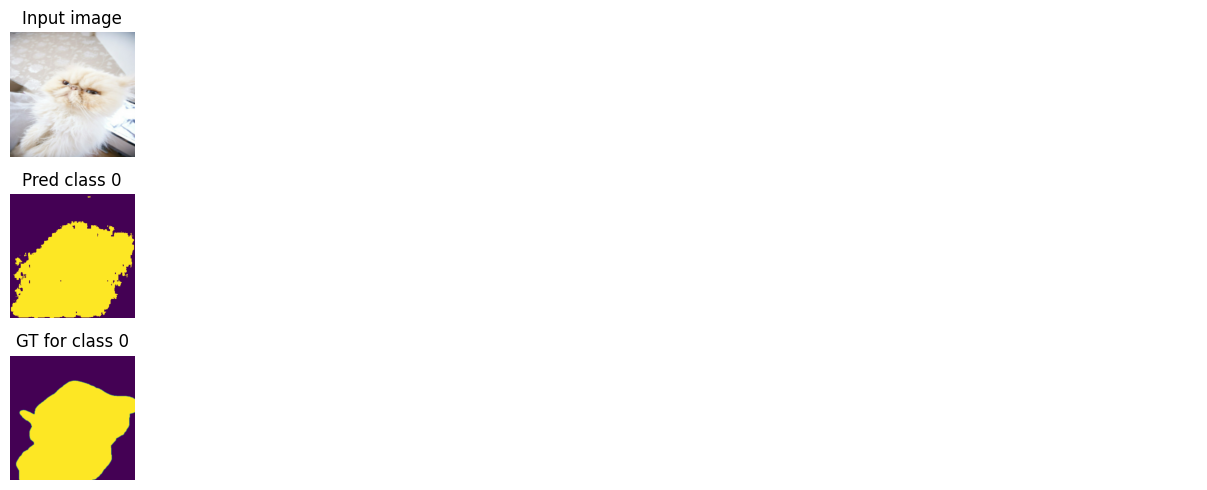

Train loss: 0.14071 | Time: 23m 10s | Val loss: 0.15114
Train_DICE_avg: 0.92022 | Train_Jaccard_avg: 0.85644 | Train_Sensitivity_avg: 0.94987 | Train_Specificity_avg: 0.92044 
Class 0 - Train_DICE: 0.92022 | Train_Jaccard: 0.85644 | Train_Sensitivity: 0.94987 | Train_Specificity: 0.92044 
Val_DICE_avg: 0.91641 | Val_Jaccard_avg: 0.85235 | Val_Sensitivity_avg: 0.94928 | Val_Specificity_avg: 0.92029 
Class 0 - Val_DICE: 0.91641 | Val_Jaccard: 0.85235 | Val_Sensitivity: 0.94928 | Val_Specificity: 0.92029 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.14192 | Time: 23m 37s | Val loss: 0.15029
Train_DICE_avg: 0.92036 | Train_Jaccard_avg: 0.85669 | Train_Sensitivity_avg: 0.94848 | Train_Specificity_avg: 0.92047 
Class 0 - Train_DICE: 0.92036 | Train_Jaccard: 0.85669 | Train_Sensitivity: 0.94848 | Train_Specificity: 0.92047 
Val_DICE_avg: 0.91696 | Val_Jaccard_avg: 0.85329 | Val_Sensitivity_avg: 0.94970 | Val_Specificity_avg: 0.92097 
Class 0 - Val_DICE: 0.91696 | Val_Jaccard: 0.85329 | Val_Sensitivity: 0.94970 | Val_Specificity: 0.92097 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13962 | Time: 24m 4s | Val loss: 0.14983
Train_DICE_avg: 0.92065 | Train_Jaccard_avg: 0.85720 | Train_Sensitivity_avg: 0.95005 | Train_Specificity_avg: 0.92073 
Class 0 - Train_DICE: 0.92065 | Train_Jaccard: 0.85720 | Train_Sensitivity: 0.95005 | Train_Specificity: 0.92073 
Val_DICE_avg: 0.91700 | Val_Jaccard_avg: 0.85343 | Val_Sensitivity_avg: 0.94979 | Val_Specificity_avg: 0.92107 
Class 0 - Val_DICE: 0.91700 | Val_Jaccard: 0.85343 | Val_Sensitivity: 0.94979 | Val_Specificity: 0.92107 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13701 | Time: 24m 32s | Val loss: 0.14932
Train_DICE_avg: 0.92180 | Train_Jaccard_avg: 0.85920 | Train_Sensitivity_avg: 0.95049 | Train_Specificity_avg: 0.92154 
Class 0 - Train_DICE: 0.92180 | Train_Jaccard: 0.85920 | Train_Sensitivity: 0.95049 | Train_Specificity: 0.92154 
Val_DICE_avg: 0.91690 | Val_Jaccard_avg: 0.85329 | Val_Sensitivity_avg: 0.95030 | Val_Specificity_avg: 0.92094 
Class 0 - Val_DICE: 0.91690 | Val_Jaccard: 0.85329 | Val_Sensitivity: 0.95030 | Val_Specificity: 0.92094 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13635 | Time: 24m 59s | Val loss: 0.14821
Train_DICE_avg: 0.92219 | Train_Jaccard_avg: 0.85980 | Train_Sensitivity_avg: 0.95184 | Train_Specificity_avg: 0.92108 
Class 0 - Train_DICE: 0.92219 | Train_Jaccard: 0.85980 | Train_Sensitivity: 0.95184 | Train_Specificity: 0.92108 
Val_DICE_avg: 0.91731 | Val_Jaccard_avg: 0.85391 | Val_Sensitivity_avg: 0.95105 | Val_Specificity_avg: 0.92097 
Class 0 - Val_DICE: 0.91731 | Val_Jaccard: 0.85391 | Val_Sensitivity: 0.95105 | Val_Specificity: 0.92097 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

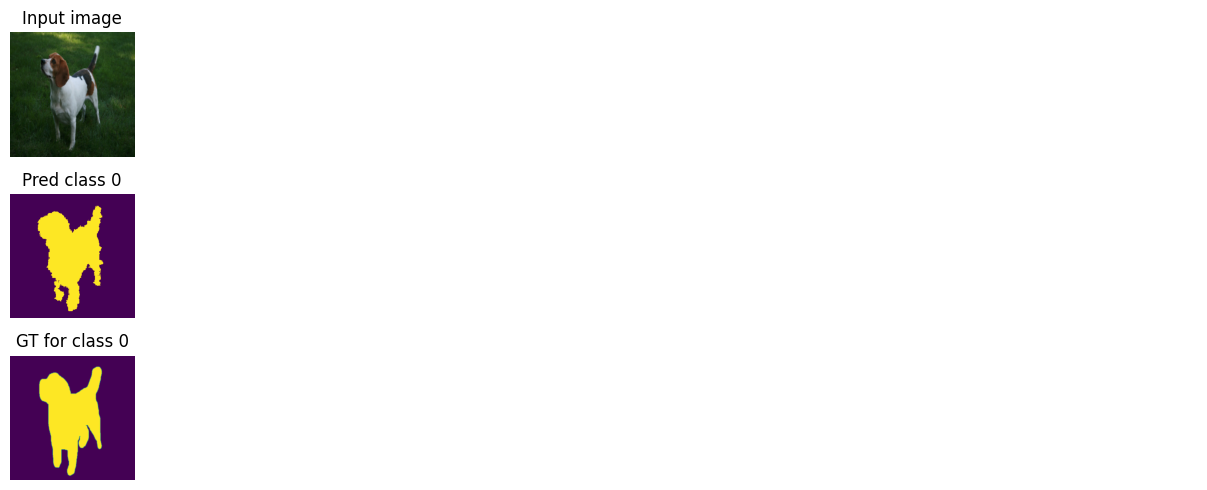

Train loss: 0.13561 | Time: 25m 27s | Val loss: 0.14836
Train_DICE_avg: 0.92283 | Train_Jaccard_avg: 0.86091 | Train_Sensitivity_avg: 0.95141 | Train_Specificity_avg: 0.92248 
Class 0 - Train_DICE: 0.92283 | Train_Jaccard: 0.86091 | Train_Sensitivity: 0.95141 | Train_Specificity: 0.92248 
Val_DICE_avg: 0.91784 | Val_Jaccard_avg: 0.85483 | Val_Sensitivity_avg: 0.95031 | Val_Specificity_avg: 0.92224 
Class 0 - Val_DICE: 0.91784 | Val_Jaccard: 0.85483 | Val_Sensitivity: 0.95031 | Val_Specificity: 0.92224 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13419 | Time: 25m 54s | Val loss: 0.14799
Train_DICE_avg: 0.92311 | Train_Jaccard_avg: 0.86140 | Train_Sensitivity_avg: 0.95146 | Train_Specificity_avg: 0.92418 
Class 0 - Train_DICE: 0.92311 | Train_Jaccard: 0.86140 | Train_Sensitivity: 0.95146 | Train_Specificity: 0.92418 
Val_DICE_avg: 0.91764 | Val_Jaccard_avg: 0.85444 | Val_Sensitivity_avg: 0.95121 | Val_Specificity_avg: 0.92148 
Class 0 - Val_DICE: 0.91764 | Val_Jaccard: 0.85444 | Val_Sensitivity: 0.95121 | Val_Specificity: 0.92148 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13478 | Time: 26m 21s | Val loss: 0.14758
Train_DICE_avg: 0.92247 | Train_Jaccard_avg: 0.86043 | Train_Sensitivity_avg: 0.95204 | Train_Specificity_avg: 0.92212 
Class 0 - Train_DICE: 0.92247 | Train_Jaccard: 0.86043 | Train_Sensitivity: 0.95204 | Train_Specificity: 0.92212 
Val_DICE_avg: 0.91842 | Val_Jaccard_avg: 0.85584 | Val_Sensitivity_avg: 0.95034 | Val_Specificity_avg: 0.92292 
Class 0 - Val_DICE: 0.91842 | Val_Jaccard: 0.85584 | Val_Sensitivity: 0.95034 | Val_Specificity: 0.92292 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13232 | Time: 26m 48s | Val loss: 0.14719
Train_DICE_avg: 0.92431 | Train_Jaccard_avg: 0.86342 | Train_Sensitivity_avg: 0.95334 | Train_Specificity_avg: 0.92354 
Class 0 - Train_DICE: 0.92431 | Train_Jaccard: 0.86342 | Train_Sensitivity: 0.95334 | Train_Specificity: 0.92354 
Val_DICE_avg: 0.91821 | Val_Jaccard_avg: 0.85552 | Val_Sensitivity_avg: 0.95100 | Val_Specificity_avg: 0.92235 
Class 0 - Val_DICE: 0.91821 | Val_Jaccard: 0.85552 | Val_Sensitivity: 0.95100 | Val_Specificity: 0.92235 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.13278 | Time: 27m 16s | Val loss: 0.14722
Train_DICE_avg: 0.92366 | Train_Jaccard_avg: 0.86240 | Train_Sensitivity_avg: 0.95116 | Train_Specificity_avg: 0.92426 
Class 0 - Train_DICE: 0.92366 | Train_Jaccard: 0.86240 | Train_Sensitivity: 0.95116 | Train_Specificity: 0.92426 
Val_DICE_avg: 0.91817 | Val_Jaccard_avg: 0.85545 | Val_Sensitivity_avg: 0.95103 | Val_Specificity_avg: 0.92257 
Class 0 - Val_DICE: 0.91817 | Val_Jaccard: 0.85545 | Val_Sensitivity: 0.95103 | Val_Specificity: 0.92257 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

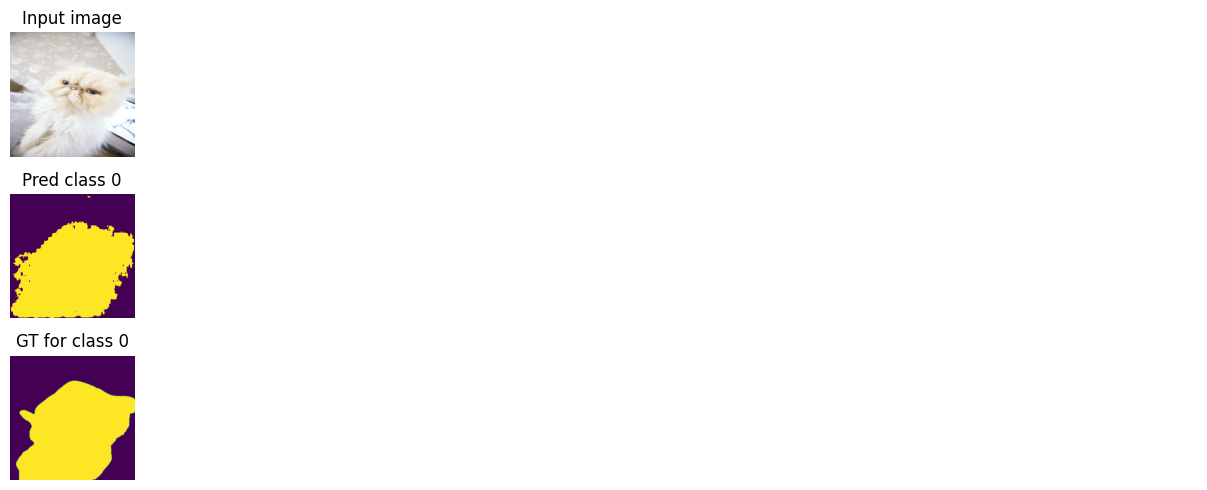

Train loss: 0.13505 | Time: 27m 44s | Val loss: 0.14723
Train_DICE_avg: 0.92267 | Train_Jaccard_avg: 0.86088 | Train_Sensitivity_avg: 0.95115 | Train_Specificity_avg: 0.92314 
Class 0 - Train_DICE: 0.92267 | Train_Jaccard: 0.86088 | Train_Sensitivity: 0.95115 | Train_Specificity: 0.92314 
Val_DICE_avg: 0.91789 | Val_Jaccard_avg: 0.85500 | Val_Sensitivity_avg: 0.95157 | Val_Specificity_avg: 0.92213 
Class 0 - Val_DICE: 0.91789 | Val_Jaccard: 0.85500 | Val_Sensitivity: 0.95157 | Val_Specificity: 0.92213 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]



Global Performance Metrics:
Loss mean: 0.14396, std: 0.01575
Dice Coefficient mean: 0.92588, std: 0.05451
Jaccard Index mean: 0.86604, std: 0.08036
Sensitivity mean: 0.93304, std: 0.05664
Specificity mean: 0.94955, std: 0.04850

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.92588, std: 0.05451
Jaccard mean: 0.86604, std: 0.08036
Sensitivity mean: 0.93304, std: 0.05664
Specificity mean: 0.94955, std: 0.04850


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-FCN-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 4.15 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

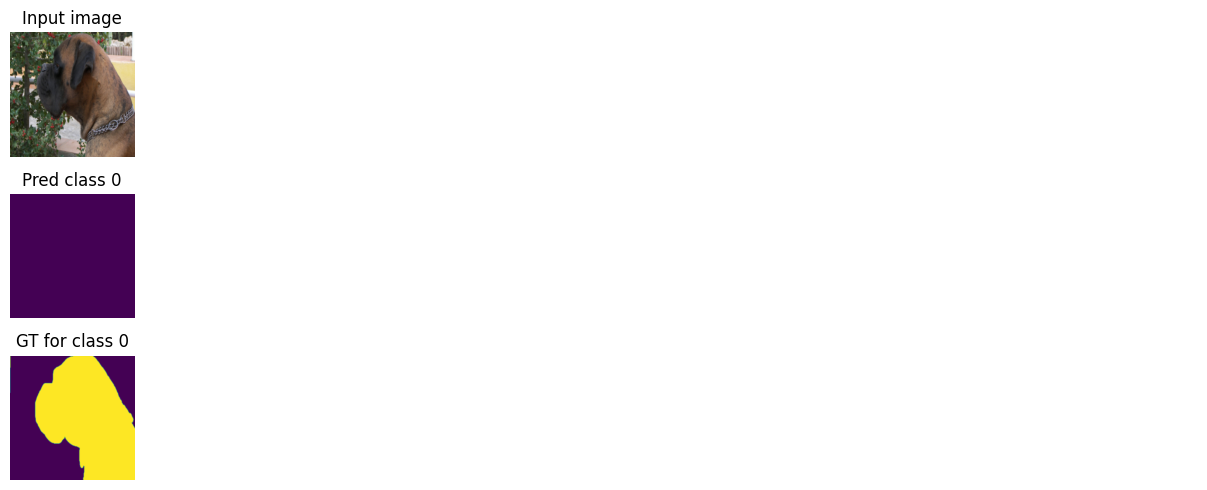

Train loss: 0.12872 | Time: 0m 27s | Val loss: 0.15027
Train_DICE_avg: 0.00287 | Train_Jaccard_avg: 0.00287 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.58744 
Class 0 - Train_DICE: 0.00287 | Train_Jaccard: 0.00287 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.58744 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.58377 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.58377 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.11467 | Time: 0m 53s | Val loss: 0.12695
Train_DICE_avg: 0.00287 | Train_Jaccard_avg: 0.00287 | Train_Sensitivity_avg: 0.99904 | Train_Specificity_avg: 0.58698 
Class 0 - Train_DICE: 0.00287 | Train_Jaccard: 0.00287 | Train_Sensitivity: 0.99904 | Train_Specificity: 0.58698 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.58377 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.58377 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.10256 | Time: 1m 20s | Val loss: 0.09722
Train_DICE_avg: 0.00288 | Train_Jaccard_avg: 0.00288 | Train_Sensitivity_avg: 0.99589 | Train_Specificity_avg: 0.58706 
Class 0 - Train_DICE: 0.00288 | Train_Jaccard: 0.00288 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.58706 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 0.99306 | Val_Specificity_avg: 0.58377 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 0.99306 | Val_Specificity: 0.58377 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.09241 | Time: 1m 47s | Val loss: 0.08689
Train_DICE_avg: 0.00207 | Train_Jaccard_avg: 0.00199 | Train_Sensitivity_avg: 0.94061 | Train_Specificity_avg: 0.58695 
Class 0 - Train_DICE: 0.00207 | Train_Jaccard: 0.00199 | Train_Sensitivity: 0.94061 | Train_Specificity: 0.58695 
Val_DICE_avg: 0.00410 | Val_Jaccard_avg: 0.00379 | Val_Sensitivity_avg: 0.82975 | Val_Specificity_avg: 0.58381 
Class 0 - Val_DICE: 0.00410 | Val_Jaccard: 0.00379 | Val_Sensitivity: 0.82975 | Val_Specificity: 0.58381 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.08411 | Time: 2m 14s | Val loss: 0.08027
Train_DICE_avg: 0.00425 | Train_Jaccard_avg: 0.00310 | Train_Sensitivity_avg: 0.87302 | Train_Specificity_avg: 0.58715 
Class 0 - Train_DICE: 0.00425 | Train_Jaccard: 0.00310 | Train_Sensitivity: 0.87302 | Train_Specificity: 0.58715 
Val_DICE_avg: 0.00757 | Val_Jaccard_avg: 0.00390 | Val_Sensitivity_avg: 0.82596 | Val_Specificity_avg: 0.58433 
Class 0 - Val_DICE: 0.00757 | Val_Jaccard: 0.00390 | Val_Sensitivity: 0.82596 | Val_Specificity: 0.58433 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

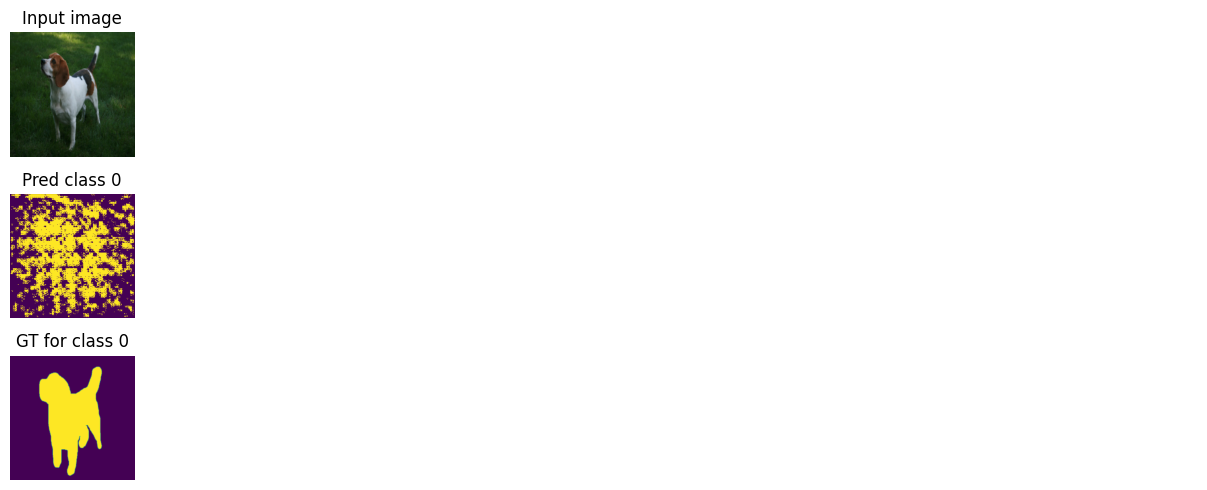

Train loss: 0.07744 | Time: 2m 41s | Val loss: 0.07490
Train_DICE_avg: 0.02121 | Train_Jaccard_avg: 0.01116 | Train_Sensitivity_avg: 0.87706 | Train_Specificity_avg: 0.58858 
Class 0 - Train_DICE: 0.02121 | Train_Jaccard: 0.01116 | Train_Sensitivity: 0.87706 | Train_Specificity: 0.58858 
Val_DICE_avg: 0.04049 | Val_Jaccard_avg: 0.02175 | Val_Sensitivity_avg: 0.89034 | Val_Specificity_avg: 0.58739 
Class 0 - Val_DICE: 0.04049 | Val_Jaccard: 0.02175 | Val_Sensitivity: 0.89034 | Val_Specificity: 0.58739 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.07194 | Time: 3m 8s | Val loss: 0.07037
Train_DICE_avg: 0.08914 | Train_Jaccard_avg: 0.04925 | Train_Sensitivity_avg: 0.88755 | Train_Specificity_avg: 0.59570 
Class 0 - Train_DICE: 0.08914 | Train_Jaccard: 0.04925 | Train_Sensitivity: 0.88755 | Train_Specificity: 0.59570 
Val_DICE_avg: 0.11550 | Val_Jaccard_avg: 0.06537 | Val_Sensitivity_avg: 0.91300 | Val_Specificity_avg: 0.59601 
Class 0 - Val_DICE: 0.11550 | Val_Jaccard: 0.06537 | Val_Sensitivity: 0.91300 | Val_Specificity: 0.59601 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06727 | Time: 3m 35s | Val loss: 0.06624
Train_DICE_avg: 0.20878 | Train_Jaccard_avg: 0.12380 | Train_Sensitivity_avg: 0.88213 | Train_Specificity_avg: 0.61183 
Class 0 - Train_DICE: 0.20878 | Train_Jaccard: 0.12380 | Train_Sensitivity: 0.88213 | Train_Specificity: 0.61183 
Val_DICE_avg: 0.22289 | Val_Jaccard_avg: 0.13379 | Val_Sensitivity_avg: 0.91066 | Val_Specificity_avg: 0.61133 
Class 0 - Val_DICE: 0.22289 | Val_Jaccard: 0.13379 | Val_Sensitivity: 0.91066 | Val_Specificity: 0.61133 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.06319 | Time: 4m 1s | Val loss: 0.06241
Train_DICE_avg: 0.33660 | Train_Jaccard_avg: 0.21358 | Train_Sensitivity_avg: 0.87808 | Train_Specificity_avg: 0.63347 
Class 0 - Train_DICE: 0.33660 | Train_Jaccard: 0.21358 | Train_Sensitivity: 0.87808 | Train_Specificity: 0.63347 
Val_DICE_avg: 0.33406 | Val_Jaccard_avg: 0.21244 | Val_Sensitivity_avg: 0.90636 | Val_Specificity_avg: 0.63126 
Class 0 - Val_DICE: 0.33406 | Val_Jaccard: 0.21244 | Val_Sensitivity: 0.90636 | Val_Specificity: 0.63126 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05968 | Time: 4m 28s | Val loss: 0.05897
Train_DICE_avg: 0.44464 | Train_Jaccard_avg: 0.29871 | Train_Sensitivity_avg: 0.87261 | Train_Specificity_avg: 0.65799 
Class 0 - Train_DICE: 0.44464 | Train_Jaccard: 0.29871 | Train_Sensitivity: 0.87261 | Train_Specificity: 0.65799 
Val_DICE_avg: 0.43125 | Val_Jaccard_avg: 0.28877 | Val_Sensitivity_avg: 0.90303 | Val_Specificity_avg: 0.65300 
Class 0 - Val_DICE: 0.43125 | Val_Jaccard: 0.28877 | Val_Sensitivity: 0.90303 | Val_Specificity: 0.65300 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

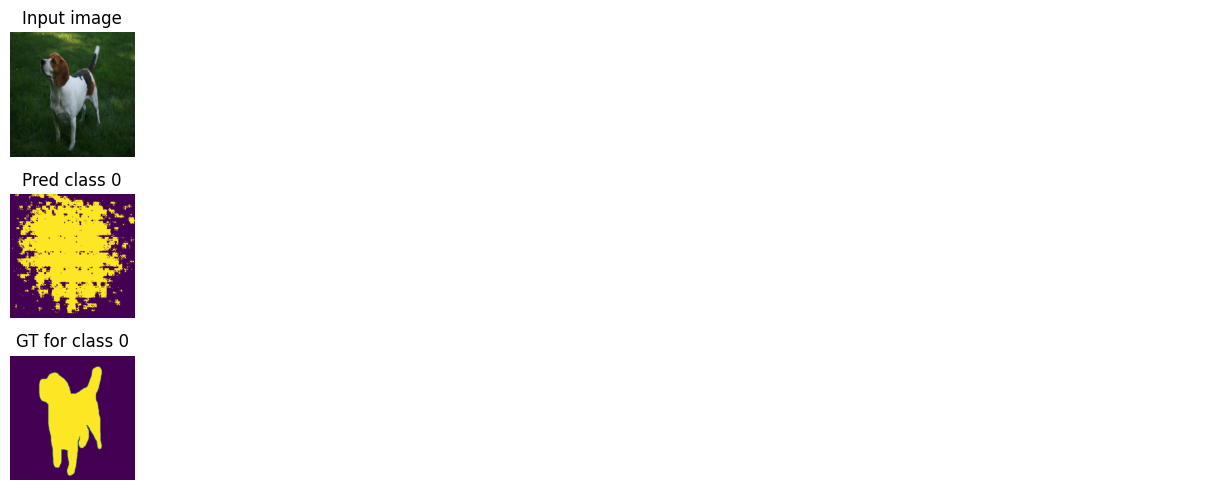

Train loss: 0.05608 | Time: 4m 56s | Val loss: 0.05477
Train_DICE_avg: 0.55432 | Train_Jaccard_avg: 0.39563 | Train_Sensitivity_avg: 0.85587 | Train_Specificity_avg: 0.69136 
Class 0 - Train_DICE: 0.55432 | Train_Jaccard: 0.39563 | Train_Sensitivity: 0.85587 | Train_Specificity: 0.69136 
Val_DICE_avg: 0.56816 | Val_Jaccard_avg: 0.40944 | Val_Sensitivity_avg: 0.87675 | Val_Specificity_avg: 0.69386 
Class 0 - Val_DICE: 0.56816 | Val_Jaccard: 0.40944 | Val_Sensitivity: 0.87675 | Val_Specificity: 0.69386 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05310 | Time: 5m 23s | Val loss: 0.05178
Train_DICE_avg: 0.64161 | Train_Jaccard_avg: 0.48216 | Train_Sensitivity_avg: 0.83571 | Train_Specificity_avg: 0.72717 
Class 0 - Train_DICE: 0.64161 | Train_Jaccard: 0.48216 | Train_Sensitivity: 0.83571 | Train_Specificity: 0.72717 
Val_DICE_avg: 0.64731 | Val_Jaccard_avg: 0.48919 | Val_Sensitivity_avg: 0.86273 | Val_Specificity_avg: 0.72660 
Class 0 - Val_DICE: 0.64731 | Val_Jaccard: 0.48919 | Val_Sensitivity: 0.86273 | Val_Specificity: 0.72660 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.05053 | Time: 5m 50s | Val loss: 0.04926
Train_DICE_avg: 0.69209 | Train_Jaccard_avg: 0.53768 | Train_Sensitivity_avg: 0.83421 | Train_Specificity_avg: 0.75325 
Class 0 - Train_DICE: 0.69209 | Train_Jaccard: 0.53768 | Train_Sensitivity: 0.83421 | Train_Specificity: 0.75325 
Val_DICE_avg: 0.69635 | Val_Jaccard_avg: 0.54357 | Val_Sensitivity_avg: 0.86041 | Val_Specificity_avg: 0.75147 
Class 0 - Val_DICE: 0.69635 | Val_Jaccard: 0.54357 | Val_Sensitivity: 0.86041 | Val_Specificity: 0.75147 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04843 | Time: 6m 17s | Val loss: 0.04713
Train_DICE_avg: 0.72156 | Train_Jaccard_avg: 0.57263 | Train_Sensitivity_avg: 0.83785 | Train_Specificity_avg: 0.76985 
Class 0 - Train_DICE: 0.72156 | Train_Jaccard: 0.57263 | Train_Sensitivity: 0.83785 | Train_Specificity: 0.76985 
Val_DICE_avg: 0.72429 | Val_Jaccard_avg: 0.57676 | Val_Sensitivity_avg: 0.86865 | Val_Specificity_avg: 0.76617 
Class 0 - Val_DICE: 0.72429 | Val_Jaccard: 0.57676 | Val_Sensitivity: 0.86865 | Val_Specificity: 0.76617 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04646 | Time: 6m 44s | Val loss: 0.04514
Train_DICE_avg: 0.74560 | Train_Jaccard_avg: 0.60268 | Train_Sensitivity_avg: 0.84655 | Train_Specificity_avg: 0.78377 
Class 0 - Train_DICE: 0.74560 | Train_Jaccard: 0.60268 | Train_Sensitivity: 0.84655 | Train_Specificity: 0.78377 
Val_DICE_avg: 0.74840 | Val_Jaccard_avg: 0.60665 | Val_Sensitivity_avg: 0.87691 | Val_Specificity_avg: 0.77963 
Class 0 - Val_DICE: 0.74840 | Val_Jaccard: 0.60665 | Val_Sensitivity: 0.87691 | Val_Specificity: 0.77963 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

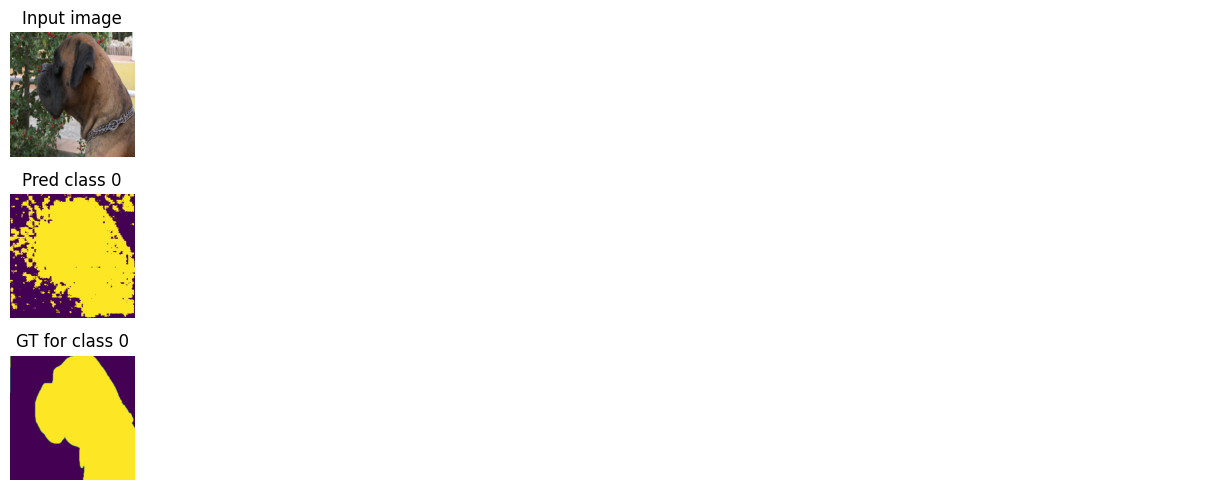

Train loss: 0.04410 | Time: 7m 11s | Val loss: 0.04298
Train_DICE_avg: 0.76932 | Train_Jaccard_avg: 0.63317 | Train_Sensitivity_avg: 0.85715 | Train_Specificity_avg: 0.79916 
Class 0 - Train_DICE: 0.76932 | Train_Jaccard: 0.63317 | Train_Sensitivity: 0.85715 | Train_Specificity: 0.79916 
Val_DICE_avg: 0.77284 | Val_Jaccard_avg: 0.63817 | Val_Sensitivity_avg: 0.88452 | Val_Specificity_avg: 0.79480 
Class 0 - Val_DICE: 0.77284 | Val_Jaccard: 0.63817 | Val_Sensitivity: 0.88452 | Val_Specificity: 0.79480 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04247 | Time: 7m 38s | Val loss: 0.04089
Train_DICE_avg: 0.78589 | Train_Jaccard_avg: 0.65519 | Train_Sensitivity_avg: 0.86520 | Train_Specificity_avg: 0.80964 
Class 0 - Train_DICE: 0.78589 | Train_Jaccard: 0.65519 | Train_Sensitivity: 0.86520 | Train_Specificity: 0.80964 
Val_DICE_avg: 0.79496 | Val_Jaccard_avg: 0.66775 | Val_Sensitivity_avg: 0.88973 | Val_Specificity_avg: 0.81037 
Class 0 - Val_DICE: 0.79496 | Val_Jaccard: 0.66775 | Val_Sensitivity: 0.88973 | Val_Specificity: 0.81037 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.04027 | Time: 8m 5s | Val loss: 0.03877
Train_DICE_avg: 0.80164 | Train_Jaccard_avg: 0.67677 | Train_Sensitivity_avg: 0.87432 | Train_Specificity_avg: 0.81993 
Class 0 - Train_DICE: 0.80164 | Train_Jaccard: 0.67677 | Train_Sensitivity: 0.87432 | Train_Specificity: 0.81993 
Val_DICE_avg: 0.81379 | Val_Jaccard_avg: 0.69391 | Val_Sensitivity_avg: 0.89476 | Val_Specificity_avg: 0.82483 
Class 0 - Val_DICE: 0.81379 | Val_Jaccard: 0.69391 | Val_Sensitivity: 0.89476 | Val_Specificity: 0.82483 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.03837 | Time: 8m 32s | Val loss: 0.03689
Train_DICE_avg: 0.81603 | Train_Jaccard_avg: 0.69715 | Train_Sensitivity_avg: 0.88465 | Train_Specificity_avg: 0.82919 
Class 0 - Train_DICE: 0.81603 | Train_Jaccard: 0.69715 | Train_Sensitivity: 0.88465 | Train_Specificity: 0.82919 
Val_DICE_avg: 0.82731 | Val_Jaccard_avg: 0.71325 | Val_Sensitivity_avg: 0.89887 | Val_Specificity_avg: 0.83617 
Class 0 - Val_DICE: 0.82731 | Val_Jaccard: 0.71325 | Val_Sensitivity: 0.89887 | Val_Specificity: 0.83617 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.03679 | Time: 9m 0s | Val loss: 0.03500
Train_DICE_avg: 0.82562 | Train_Jaccard_avg: 0.71081 | Train_Sensitivity_avg: 0.88822 | Train_Specificity_avg: 0.83777 
Class 0 - Train_DICE: 0.82562 | Train_Jaccard: 0.71081 | Train_Sensitivity: 0.88822 | Train_Specificity: 0.83777 
Val_DICE_avg: 0.84057 | Val_Jaccard_avg: 0.73265 | Val_Sensitivity_avg: 0.90081 | Val_Specificity_avg: 0.84873 
Class 0 - Val_DICE: 0.84057 | Val_Jaccard: 0.73265 | Val_Sensitivity: 0.90081 | Val_Specificity: 0.84873 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

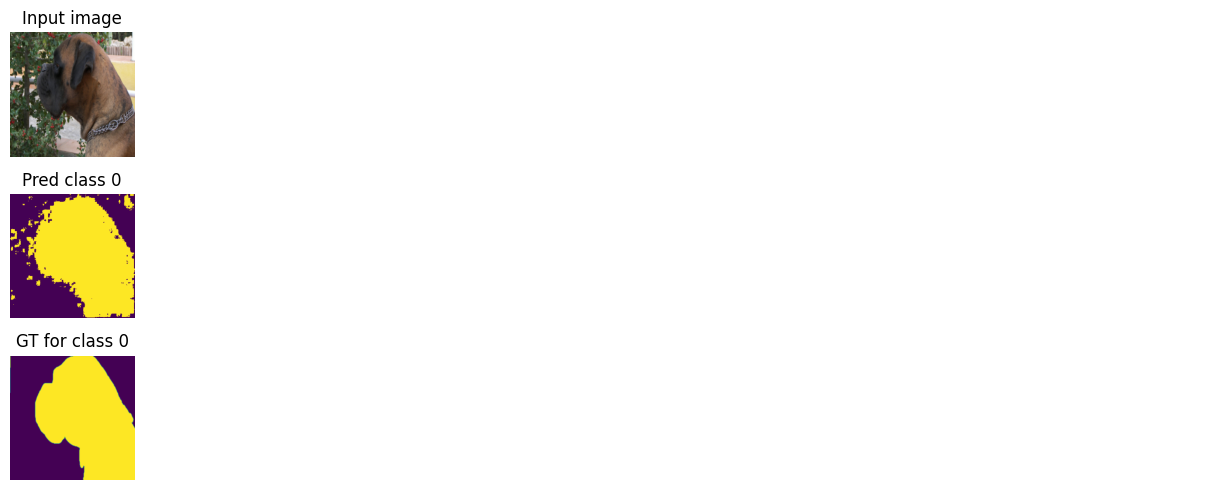

Train loss: 0.03414 | Time: 9m 27s | Val loss: 0.03149
Train_DICE_avg: 0.84188 | Train_Jaccard_avg: 0.73523 | Train_Sensitivity_avg: 0.90077 | Train_Specificity_avg: 0.85214 
Class 0 - Train_DICE: 0.84188 | Train_Jaccard: 0.73523 | Train_Sensitivity: 0.90077 | Train_Specificity: 0.85214 
Val_DICE_avg: 0.85934 | Val_Jaccard_avg: 0.76063 | Val_Sensitivity_avg: 0.91973 | Val_Specificity_avg: 0.86232 
Class 0 - Val_DICE: 0.85934 | Val_Jaccard: 0.76063 | Val_Sensitivity: 0.91973 | Val_Specificity: 0.86232 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.03143 | Time: 9m 54s | Val loss: 0.02956
Train_DICE_avg: 0.85427 | Train_Jaccard_avg: 0.75377 | Train_Sensitivity_avg: 0.91554 | Train_Specificity_avg: 0.86197 
Class 0 - Train_DICE: 0.85427 | Train_Jaccard: 0.75377 | Train_Sensitivity: 0.91554 | Train_Specificity: 0.86197 
Val_DICE_avg: 0.87565 | Val_Jaccard_avg: 0.78578 | Val_Sensitivity_avg: 0.91309 | Val_Specificity_avg: 0.88301 
Class 0 - Val_DICE: 0.87565 | Val_Jaccard: 0.78578 | Val_Sensitivity: 0.91309 | Val_Specificity: 0.88301 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02965 | Time: 10m 22s | Val loss: 0.02795
Train_DICE_avg: 0.86322 | Train_Jaccard_avg: 0.76695 | Train_Sensitivity_avg: 0.92025 | Train_Specificity_avg: 0.86920 
Class 0 - Train_DICE: 0.86322 | Train_Jaccard: 0.76695 | Train_Sensitivity: 0.92025 | Train_Specificity: 0.86920 
Val_DICE_avg: 0.87992 | Val_Jaccard_avg: 0.79252 | Val_Sensitivity_avg: 0.92285 | Val_Specificity_avg: 0.88436 
Class 0 - Val_DICE: 0.87992 | Val_Jaccard: 0.79252 | Val_Sensitivity: 0.92285 | Val_Specificity: 0.88436 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02816 | Time: 10m 49s | Val loss: 0.02688
Train_DICE_avg: 0.86982 | Train_Jaccard_avg: 0.77682 | Train_Sensitivity_avg: 0.92481 | Train_Specificity_avg: 0.87476 
Class 0 - Train_DICE: 0.86982 | Train_Jaccard: 0.77682 | Train_Sensitivity: 0.92481 | Train_Specificity: 0.87476 
Val_DICE_avg: 0.88516 | Val_Jaccard_avg: 0.80080 | Val_Sensitivity_avg: 0.92341 | Val_Specificity_avg: 0.89026 
Class 0 - Val_DICE: 0.88516 | Val_Jaccard: 0.80080 | Val_Sensitivity: 0.92341 | Val_Specificity: 0.89026 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02680 | Time: 11m 16s | Val loss: 0.02582
Train_DICE_avg: 0.87685 | Train_Jaccard_avg: 0.78763 | Train_Sensitivity_avg: 0.92672 | Train_Specificity_avg: 0.88172 
Class 0 - Train_DICE: 0.87685 | Train_Jaccard: 0.78763 | Train_Sensitivity: 0.92672 | Train_Specificity: 0.88172 
Val_DICE_avg: 0.88764 | Val_Jaccard_avg: 0.80478 | Val_Sensitivity_avg: 0.92862 | Val_Specificity_avg: 0.89132 
Class 0 - Val_DICE: 0.88764 | Val_Jaccard: 0.80478 | Val_Sensitivity: 0.92862 | Val_Specificity: 0.89132 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

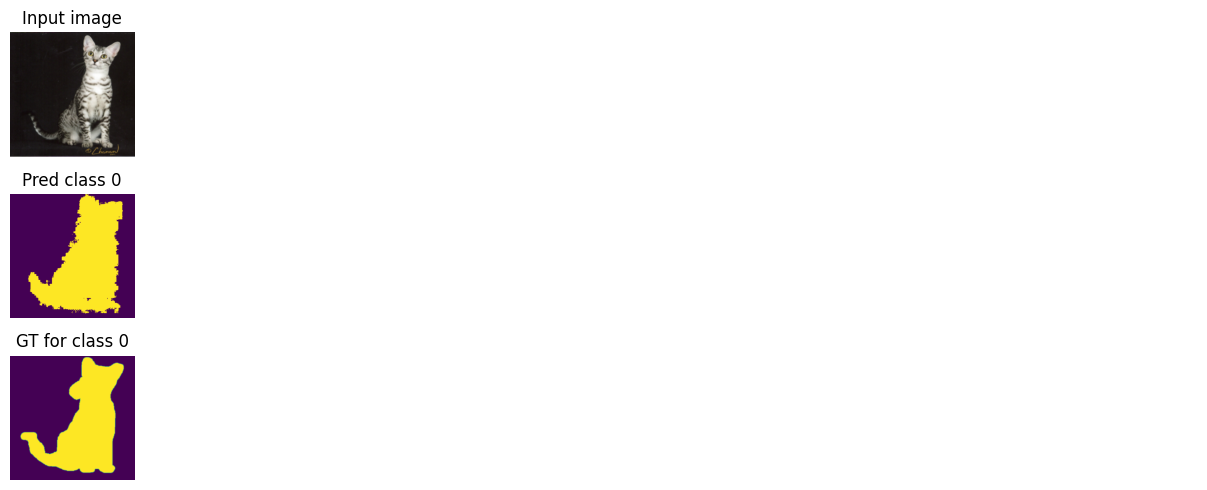

Train loss: 0.02573 | Time: 11m 43s | Val loss: 0.02488
Train_DICE_avg: 0.88093 | Train_Jaccard_avg: 0.79401 | Train_Sensitivity_avg: 0.92982 | Train_Specificity_avg: 0.88605 
Class 0 - Train_DICE: 0.88093 | Train_Jaccard: 0.79401 | Train_Sensitivity: 0.92982 | Train_Specificity: 0.88605 
Val_DICE_avg: 0.88951 | Val_Jaccard_avg: 0.80796 | Val_Sensitivity_avg: 0.93312 | Val_Specificity_avg: 0.89265 
Class 0 - Val_DICE: 0.88951 | Val_Jaccard: 0.80796 | Val_Sensitivity: 0.93312 | Val_Specificity: 0.89265 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02514 | Time: 12m 11s | Val loss: 0.02413
Train_DICE_avg: 0.88295 | Train_Jaccard_avg: 0.79715 | Train_Sensitivity_avg: 0.92770 | Train_Specificity_avg: 0.88859 
Class 0 - Train_DICE: 0.88295 | Train_Jaccard: 0.79715 | Train_Sensitivity: 0.92770 | Train_Specificity: 0.88859 
Val_DICE_avg: 0.89296 | Val_Jaccard_avg: 0.81341 | Val_Sensitivity_avg: 0.93270 | Val_Specificity_avg: 0.89642 
Class 0 - Val_DICE: 0.89296 | Val_Jaccard: 0.81341 | Val_Sensitivity: 0.93270 | Val_Specificity: 0.89642 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02394 | Time: 12m 38s | Val loss: 0.02347
Train_DICE_avg: 0.88754 | Train_Jaccard_avg: 0.80427 | Train_Sensitivity_avg: 0.93202 | Train_Specificity_avg: 0.89335 
Class 0 - Train_DICE: 0.88754 | Train_Jaccard: 0.80427 | Train_Sensitivity: 0.93202 | Train_Specificity: 0.89335 
Val_DICE_avg: 0.89360 | Val_Jaccard_avg: 0.81458 | Val_Sensitivity_avg: 0.93687 | Val_Specificity_avg: 0.89570 
Class 0 - Val_DICE: 0.89360 | Val_Jaccard: 0.81458 | Val_Sensitivity: 0.93687 | Val_Specificity: 0.89570 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02352 | Time: 13m 5s | Val loss: 0.02283
Train_DICE_avg: 0.89051 | Train_Jaccard_avg: 0.80864 | Train_Sensitivity_avg: 0.93153 | Train_Specificity_avg: 0.89511 
Class 0 - Train_DICE: 0.89051 | Train_Jaccard: 0.80864 | Train_Sensitivity: 0.93153 | Train_Specificity: 0.89511 
Val_DICE_avg: 0.89500 | Val_Jaccard_avg: 0.81669 | Val_Sensitivity_avg: 0.93875 | Val_Specificity_avg: 0.89654 
Class 0 - Val_DICE: 0.89500 | Val_Jaccard: 0.81669 | Val_Sensitivity: 0.93875 | Val_Specificity: 0.89654 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02259 | Time: 13m 32s | Val loss: 0.02234
Train_DICE_avg: 0.89309 | Train_Jaccard_avg: 0.81253 | Train_Sensitivity_avg: 0.93420 | Train_Specificity_avg: 0.89760 
Class 0 - Train_DICE: 0.89309 | Train_Jaccard: 0.81253 | Train_Sensitivity: 0.93420 | Train_Specificity: 0.89760 
Val_DICE_avg: 0.89604 | Val_Jaccard_avg: 0.81846 | Val_Sensitivity_avg: 0.94013 | Val_Specificity_avg: 0.89733 
Class 0 - Val_DICE: 0.89604 | Val_Jaccard: 0.81846 | Val_Sensitivity: 0.94013 | Val_Specificity: 0.89733 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

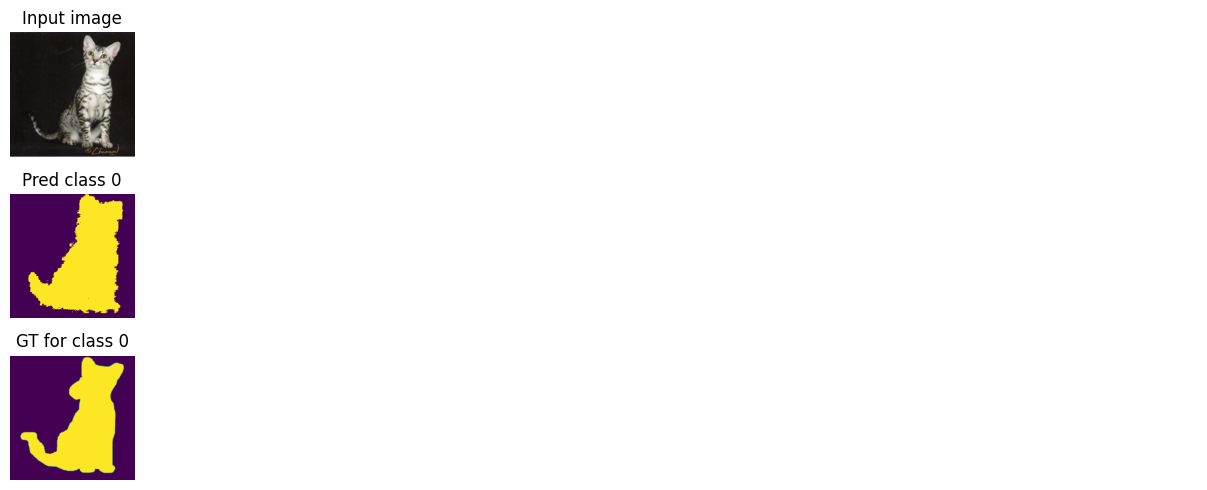

Train loss: 0.02214 | Time: 14m 0s | Val loss: 0.02156
Train_DICE_avg: 0.89606 | Train_Jaccard_avg: 0.81771 | Train_Sensitivity_avg: 0.93237 | Train_Specificity_avg: 0.90218 
Class 0 - Train_DICE: 0.89606 | Train_Jaccard: 0.81771 | Train_Sensitivity: 0.93237 | Train_Specificity: 0.90218 
Val_DICE_avg: 0.90060 | Val_Jaccard_avg: 0.82559 | Val_Sensitivity_avg: 0.94008 | Val_Specificity_avg: 0.90356 
Class 0 - Val_DICE: 0.90060 | Val_Jaccard: 0.82559 | Val_Sensitivity: 0.94008 | Val_Specificity: 0.90356 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.02077 | Time: 14m 27s | Val loss: 0.02064
Train_DICE_avg: 0.90300 | Train_Jaccard_avg: 0.82841 | Train_Sensitivity_avg: 0.93828 | Train_Specificity_avg: 0.90591 
Class 0 - Train_DICE: 0.90300 | Train_Jaccard: 0.82841 | Train_Sensitivity: 0.93828 | Train_Specificity: 0.90591 
Val_DICE_avg: 0.90295 | Val_Jaccard_avg: 0.82948 | Val_Sensitivity_avg: 0.94520 | Val_Specificity_avg: 0.90420 
Class 0 - Val_DICE: 0.90295 | Val_Jaccard: 0.82948 | Val_Sensitivity: 0.94520 | Val_Specificity: 0.90420 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01994 | Time: 14m 54s | Val loss: 0.02008
Train_DICE_avg: 0.90552 | Train_Jaccard_avg: 0.83248 | Train_Sensitivity_avg: 0.93810 | Train_Specificity_avg: 0.90953 
Class 0 - Train_DICE: 0.90552 | Train_Jaccard: 0.83248 | Train_Sensitivity: 0.93810 | Train_Specificity: 0.90953 
Val_DICE_avg: 0.90667 | Val_Jaccard_avg: 0.83535 | Val_Sensitivity_avg: 0.94452 | Val_Specificity_avg: 0.90878 
Class 0 - Val_DICE: 0.90667 | Val_Jaccard: 0.83535 | Val_Sensitivity: 0.94452 | Val_Specificity: 0.90878 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01927 | Time: 15m 21s | Val loss: 0.01957
Train_DICE_avg: 0.90834 | Train_Jaccard_avg: 0.83722 | Train_Sensitivity_avg: 0.93952 | Train_Specificity_avg: 0.91384 
Class 0 - Train_DICE: 0.90834 | Train_Jaccard: 0.83722 | Train_Sensitivity: 0.93952 | Train_Specificity: 0.91384 
Val_DICE_avg: 0.90877 | Val_Jaccard_avg: 0.83887 | Val_Sensitivity_avg: 0.94475 | Val_Specificity_avg: 0.91165 
Class 0 - Val_DICE: 0.90877 | Val_Jaccard: 0.83887 | Val_Sensitivity: 0.94475 | Val_Specificity: 0.91165 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01867 | Time: 15m 49s | Val loss: 0.01916
Train_DICE_avg: 0.91055 | Train_Jaccard_avg: 0.84101 | Train_Sensitivity_avg: 0.93967 | Train_Specificity_avg: 0.91605 
Class 0 - Train_DICE: 0.91055 | Train_Jaccard: 0.84101 | Train_Sensitivity: 0.93967 | Train_Specificity: 0.91605 
Val_DICE_avg: 0.90920 | Val_Jaccard_avg: 0.83946 | Val_Sensitivity_avg: 0.94742 | Val_Specificity_avg: 0.91104 
Class 0 - Val_DICE: 0.90920 | Val_Jaccard: 0.83946 | Val_Sensitivity: 0.94742 | Val_Specificity: 0.91104 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

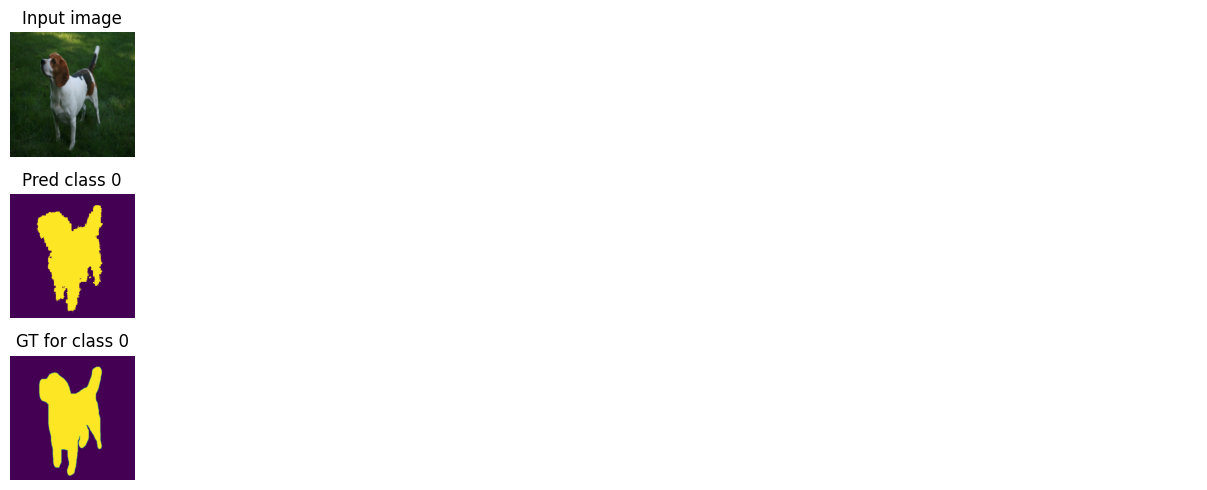

Train loss: 0.01818 | Time: 16m 16s | Val loss: 0.01878
Train_DICE_avg: 0.91404 | Train_Jaccard_avg: 0.84636 | Train_Sensitivity_avg: 0.94272 | Train_Specificity_avg: 0.91700 
Class 0 - Train_DICE: 0.91404 | Train_Jaccard: 0.84636 | Train_Sensitivity: 0.94272 | Train_Specificity: 0.91700 
Val_DICE_avg: 0.91144 | Val_Jaccard_avg: 0.84306 | Val_Sensitivity_avg: 0.94728 | Val_Specificity_avg: 0.91363 
Class 0 - Val_DICE: 0.91144 | Val_Jaccard: 0.84306 | Val_Sensitivity: 0.94728 | Val_Specificity: 0.91363 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01768 | Time: 16m 43s | Val loss: 0.01850
Train_DICE_avg: 0.91499 | Train_Jaccard_avg: 0.84814 | Train_Sensitivity_avg: 0.94306 | Train_Specificity_avg: 0.91934 
Class 0 - Train_DICE: 0.91499 | Train_Jaccard: 0.84814 | Train_Sensitivity: 0.94306 | Train_Specificity: 0.91934 
Val_DICE_avg: 0.91272 | Val_Jaccard_avg: 0.84525 | Val_Sensitivity_avg: 0.94781 | Val_Specificity_avg: 0.91498 
Class 0 - Val_DICE: 0.91272 | Val_Jaccard: 0.84525 | Val_Sensitivity: 0.94781 | Val_Specificity: 0.91498 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01735 | Time: 17m 11s | Val loss: 0.01828
Train_DICE_avg: 0.91711 | Train_Jaccard_avg: 0.85153 | Train_Sensitivity_avg: 0.94355 | Train_Specificity_avg: 0.92009 
Class 0 - Train_DICE: 0.91711 | Train_Jaccard: 0.85153 | Train_Sensitivity: 0.94355 | Train_Specificity: 0.92009 
Val_DICE_avg: 0.91338 | Val_Jaccard_avg: 0.84644 | Val_Sensitivity_avg: 0.94879 | Val_Specificity_avg: 0.91596 
Class 0 - Val_DICE: 0.91338 | Val_Jaccard: 0.84644 | Val_Sensitivity: 0.94879 | Val_Specificity: 0.91596 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01703 | Time: 17m 38s | Val loss: 0.01807
Train_DICE_avg: 0.91770 | Train_Jaccard_avg: 0.85231 | Train_Sensitivity_avg: 0.94425 | Train_Specificity_avg: 0.92091 
Class 0 - Train_DICE: 0.91770 | Train_Jaccard: 0.85231 | Train_Sensitivity: 0.94425 | Train_Specificity: 0.92091 
Val_DICE_avg: 0.91502 | Val_Jaccard_avg: 0.84908 | Val_Sensitivity_avg: 0.94722 | Val_Specificity_avg: 0.91913 
Class 0 - Val_DICE: 0.91502 | Val_Jaccard: 0.84908 | Val_Sensitivity: 0.94722 | Val_Specificity: 0.91913 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01658 | Time: 18m 5s | Val loss: 0.01786
Train_DICE_avg: 0.92021 | Train_Jaccard_avg: 0.85652 | Train_Sensitivity_avg: 0.94653 | Train_Specificity_avg: 0.92345 
Class 0 - Train_DICE: 0.92021 | Train_Jaccard: 0.85652 | Train_Sensitivity: 0.94653 | Train_Specificity: 0.92345 
Val_DICE_avg: 0.91547 | Val_Jaccard_avg: 0.84988 | Val_Sensitivity_avg: 0.94837 | Val_Specificity_avg: 0.91960 
Class 0 - Val_DICE: 0.91547 | Val_Jaccard: 0.84988 | Val_Sensitivity: 0.94837 | Val_Specificity: 0.91960 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

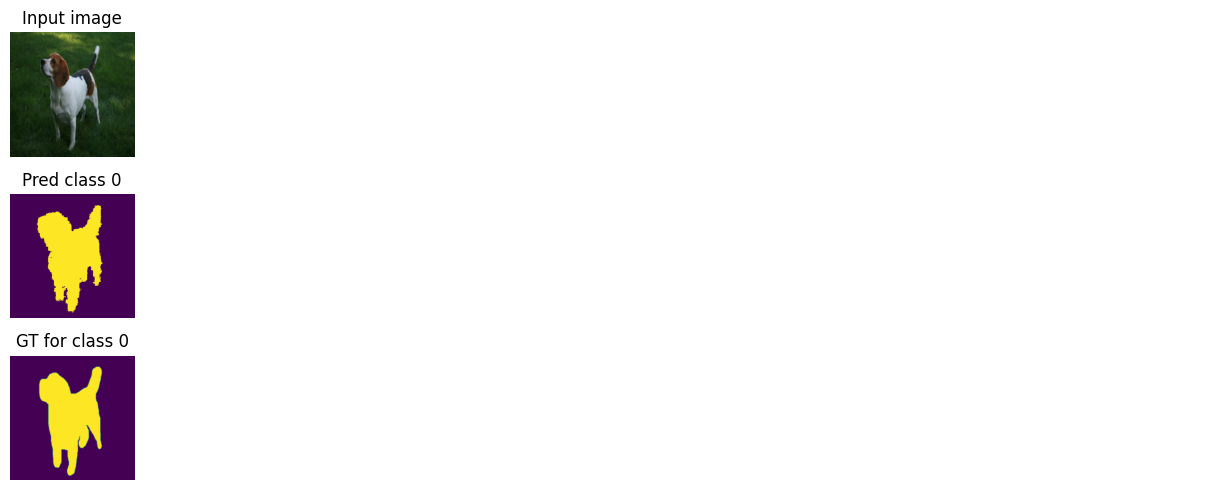

Train loss: 0.01631 | Time: 18m 33s | Val loss: 0.01771
Train_DICE_avg: 0.92122 | Train_Jaccard_avg: 0.85839 | Train_Sensitivity_avg: 0.94546 | Train_Specificity_avg: 0.92511 
Class 0 - Train_DICE: 0.92122 | Train_Jaccard: 0.85839 | Train_Sensitivity: 0.94546 | Train_Specificity: 0.92511 
Val_DICE_avg: 0.91664 | Val_Jaccard_avg: 0.85183 | Val_Sensitivity_avg: 0.94766 | Val_Specificity_avg: 0.92104 
Class 0 - Val_DICE: 0.91664 | Val_Jaccard: 0.85183 | Val_Sensitivity: 0.94766 | Val_Specificity: 0.92104 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01593 | Time: 19m 0s | Val loss: 0.01755
Train_DICE_avg: 0.92270 | Train_Jaccard_avg: 0.86064 | Train_Sensitivity_avg: 0.94734 | Train_Specificity_avg: 0.92543 
Class 0 - Train_DICE: 0.92270 | Train_Jaccard: 0.86064 | Train_Sensitivity: 0.94734 | Train_Specificity: 0.92543 
Val_DICE_avg: 0.91721 | Val_Jaccard_avg: 0.85278 | Val_Sensitivity_avg: 0.94812 | Val_Specificity_avg: 0.92167 
Class 0 - Val_DICE: 0.91721 | Val_Jaccard: 0.85278 | Val_Sensitivity: 0.94812 | Val_Specificity: 0.92167 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01561 | Time: 19m 27s | Val loss: 0.01745
Train_DICE_avg: 0.92323 | Train_Jaccard_avg: 0.86166 | Train_Sensitivity_avg: 0.94801 | Train_Specificity_avg: 0.92595 
Class 0 - Train_DICE: 0.92323 | Train_Jaccard: 0.86166 | Train_Sensitivity: 0.94801 | Train_Specificity: 0.92595 
Val_DICE_avg: 0.91794 | Val_Jaccard_avg: 0.85402 | Val_Sensitivity_avg: 0.94779 | Val_Specificity_avg: 0.92266 
Class 0 - Val_DICE: 0.91794 | Val_Jaccard: 0.85402 | Val_Sensitivity: 0.94779 | Val_Specificity: 0.92266 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01542 | Time: 19m 54s | Val loss: 0.01735
Train_DICE_avg: 0.92423 | Train_Jaccard_avg: 0.86319 | Train_Sensitivity_avg: 0.94740 | Train_Specificity_avg: 0.92827 
Class 0 - Train_DICE: 0.92423 | Train_Jaccard: 0.86319 | Train_Sensitivity: 0.94740 | Train_Specificity: 0.92827 
Val_DICE_avg: 0.91770 | Val_Jaccard_avg: 0.85371 | Val_Sensitivity_avg: 0.94945 | Val_Specificity_avg: 0.92224 
Class 0 - Val_DICE: 0.91770 | Val_Jaccard: 0.85371 | Val_Sensitivity: 0.94945 | Val_Specificity: 0.92224 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01520 | Time: 20m 21s | Val loss: 0.01728
Train_DICE_avg: 0.92574 | Train_Jaccard_avg: 0.86580 | Train_Sensitivity_avg: 0.94859 | Train_Specificity_avg: 0.92903 
Class 0 - Train_DICE: 0.92574 | Train_Jaccard: 0.86580 | Train_Sensitivity: 0.94859 | Train_Specificity: 0.92903 
Val_DICE_avg: 0.91853 | Val_Jaccard_avg: 0.85512 | Val_Sensitivity_avg: 0.94846 | Val_Specificity_avg: 0.92364 
Class 0 - Val_DICE: 0.91853 | Val_Jaccard: 0.85512 | Val_Sensitivity: 0.94846 | Val_Specificity: 0.92364 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

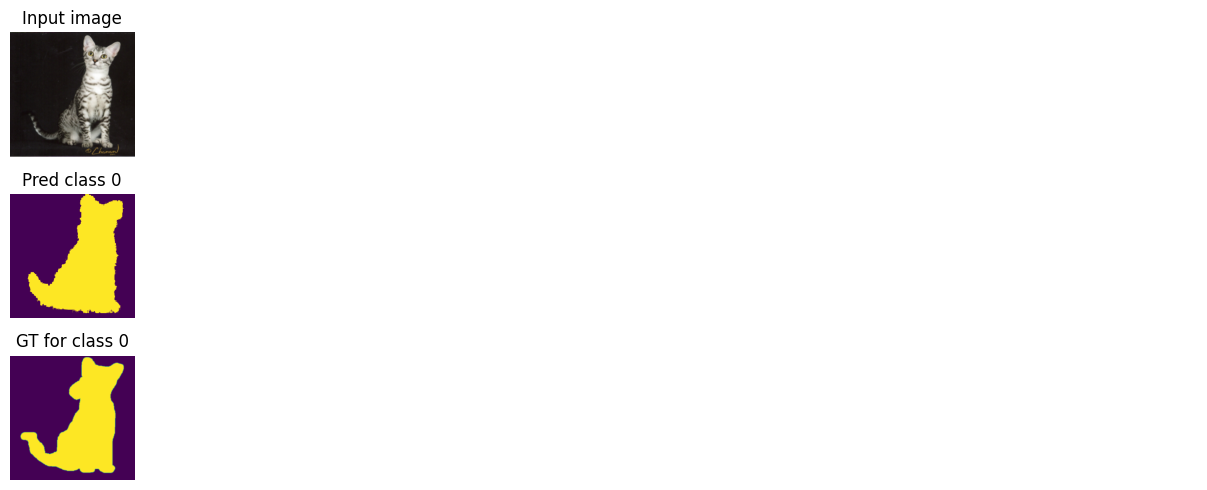

Train loss: 0.01514 | Time: 20m 49s | Val loss: 0.01716
Train_DICE_avg: 0.92586 | Train_Jaccard_avg: 0.86604 | Train_Sensitivity_avg: 0.94892 | Train_Specificity_avg: 0.92894 
Class 0 - Train_DICE: 0.92586 | Train_Jaccard: 0.86604 | Train_Sensitivity: 0.94892 | Train_Specificity: 0.92894 
Val_DICE_avg: 0.91912 | Val_Jaccard_avg: 0.85608 | Val_Sensitivity_avg: 0.94835 | Val_Specificity_avg: 0.92444 
Class 0 - Val_DICE: 0.91912 | Val_Jaccard: 0.85608 | Val_Sensitivity: 0.94835 | Val_Specificity: 0.92444 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01494 | Time: 21m 16s | Val loss: 0.01704
Train_DICE_avg: 0.92607 | Train_Jaccard_avg: 0.86640 | Train_Sensitivity_avg: 0.94805 | Train_Specificity_avg: 0.93045 
Class 0 - Train_DICE: 0.92607 | Train_Jaccard: 0.86640 | Train_Sensitivity: 0.94805 | Train_Specificity: 0.93045 
Val_DICE_avg: 0.92002 | Val_Jaccard_avg: 0.85752 | Val_Sensitivity_avg: 0.94813 | Val_Specificity_avg: 0.92531 
Class 0 - Val_DICE: 0.92002 | Val_Jaccard: 0.85752 | Val_Sensitivity: 0.94813 | Val_Specificity: 0.92531 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01488 | Time: 21m 43s | Val loss: 0.01689
Train_DICE_avg: 0.92706 | Train_Jaccard_avg: 0.86804 | Train_Sensitivity_avg: 0.94794 | Train_Specificity_avg: 0.93136 
Class 0 - Train_DICE: 0.92706 | Train_Jaccard: 0.86804 | Train_Sensitivity: 0.94794 | Train_Specificity: 0.93136 
Val_DICE_avg: 0.91955 | Val_Jaccard_avg: 0.85674 | Val_Sensitivity_avg: 0.95019 | Val_Specificity_avg: 0.92411 
Class 0 - Val_DICE: 0.91955 | Val_Jaccard: 0.85674 | Val_Sensitivity: 0.95019 | Val_Specificity: 0.92411 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01460 | Time: 22m 11s | Val loss: 0.01686
Train_DICE_avg: 0.92788 | Train_Jaccard_avg: 0.86939 | Train_Sensitivity_avg: 0.95009 | Train_Specificity_avg: 0.93200 
Class 0 - Train_DICE: 0.92788 | Train_Jaccard: 0.86939 | Train_Sensitivity: 0.95009 | Train_Specificity: 0.93200 
Val_DICE_avg: 0.92027 | Val_Jaccard_avg: 0.85792 | Val_Sensitivity_avg: 0.94925 | Val_Specificity_avg: 0.92559 
Class 0 - Val_DICE: 0.92027 | Val_Jaccard: 0.85792 | Val_Sensitivity: 0.94925 | Val_Specificity: 0.92559 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01446 | Time: 22m 38s | Val loss: 0.01681
Train_DICE_avg: 0.92806 | Train_Jaccard_avg: 0.86984 | Train_Sensitivity_avg: 0.94951 | Train_Specificity_avg: 0.93101 
Class 0 - Train_DICE: 0.92806 | Train_Jaccard: 0.86984 | Train_Sensitivity: 0.94951 | Train_Specificity: 0.93101 
Val_DICE_avg: 0.92051 | Val_Jaccard_avg: 0.85840 | Val_Sensitivity_avg: 0.94911 | Val_Specificity_avg: 0.92614 
Class 0 - Val_DICE: 0.92051 | Val_Jaccard: 0.85840 | Val_Sensitivity: 0.94911 | Val_Specificity: 0.92614 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

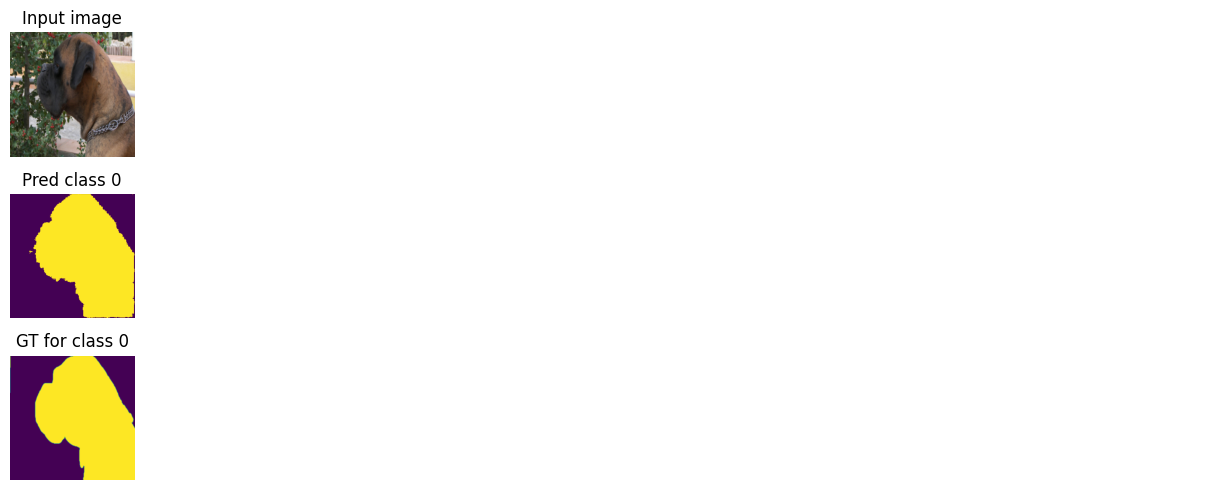

Train loss: 0.01442 | Time: 23m 5s | Val loss: 0.01681
Train_DICE_avg: 0.92873 | Train_Jaccard_avg: 0.87083 | Train_Sensitivity_avg: 0.94994 | Train_Specificity_avg: 0.93289 
Class 0 - Train_DICE: 0.92873 | Train_Jaccard: 0.87083 | Train_Sensitivity: 0.94994 | Train_Specificity: 0.93289 
Val_DICE_avg: 0.91977 | Val_Jaccard_avg: 0.85721 | Val_Sensitivity_avg: 0.95082 | Val_Specificity_avg: 0.92508 
Class 0 - Val_DICE: 0.91977 | Val_Jaccard: 0.85721 | Val_Sensitivity: 0.95082 | Val_Specificity: 0.92508 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01430 | Time: 23m 33s | Val loss: 0.01676
Train_DICE_avg: 0.92855 | Train_Jaccard_avg: 0.87055 | Train_Sensitivity_avg: 0.94991 | Train_Specificity_avg: 0.93189 
Class 0 - Train_DICE: 0.92855 | Train_Jaccard: 0.87055 | Train_Sensitivity: 0.94991 | Train_Specificity: 0.93189 
Val_DICE_avg: 0.92030 | Val_Jaccard_avg: 0.85809 | Val_Sensitivity_avg: 0.95058 | Val_Specificity_avg: 0.92580 
Class 0 - Val_DICE: 0.92030 | Val_Jaccard: 0.85809 | Val_Sensitivity: 0.95058 | Val_Specificity: 0.92580 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01404 | Time: 24m 0s | Val loss: 0.01670
Train_DICE_avg: 0.92924 | Train_Jaccard_avg: 0.87175 | Train_Sensitivity_avg: 0.95136 | Train_Specificity_avg: 0.93256 
Class 0 - Train_DICE: 0.92924 | Train_Jaccard: 0.87175 | Train_Sensitivity: 0.95136 | Train_Specificity: 0.93256 
Val_DICE_avg: 0.92067 | Val_Jaccard_avg: 0.85873 | Val_Sensitivity_avg: 0.95043 | Val_Specificity_avg: 0.92606 
Class 0 - Val_DICE: 0.92067 | Val_Jaccard: 0.85873 | Val_Sensitivity: 0.95043 | Val_Specificity: 0.92606 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01414 | Time: 24m 27s | Val loss: 0.01670
Train_DICE_avg: 0.92935 | Train_Jaccard_avg: 0.87203 | Train_Sensitivity_avg: 0.94945 | Train_Specificity_avg: 0.93394 
Class 0 - Train_DICE: 0.92935 | Train_Jaccard: 0.87203 | Train_Sensitivity: 0.94945 | Train_Specificity: 0.93394 
Val_DICE_avg: 0.92126 | Val_Jaccard_avg: 0.85967 | Val_Sensitivity_avg: 0.94966 | Val_Specificity_avg: 0.92717 
Class 0 - Val_DICE: 0.92126 | Val_Jaccard: 0.85967 | Val_Sensitivity: 0.94966 | Val_Specificity: 0.92717 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01399 | Time: 24m 54s | Val loss: 0.01659
Train_DICE_avg: 0.93021 | Train_Jaccard_avg: 0.87340 | Train_Sensitivity_avg: 0.95101 | Train_Specificity_avg: 0.93325 
Class 0 - Train_DICE: 0.93021 | Train_Jaccard: 0.87340 | Train_Sensitivity: 0.95101 | Train_Specificity: 0.93325 
Val_DICE_avg: 0.92118 | Val_Jaccard_avg: 0.85965 | Val_Sensitivity_avg: 0.95056 | Val_Specificity_avg: 0.92706 
Class 0 - Val_DICE: 0.92118 | Val_Jaccard: 0.85965 | Val_Sensitivity: 0.95056 | Val_Specificity: 0.92706 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

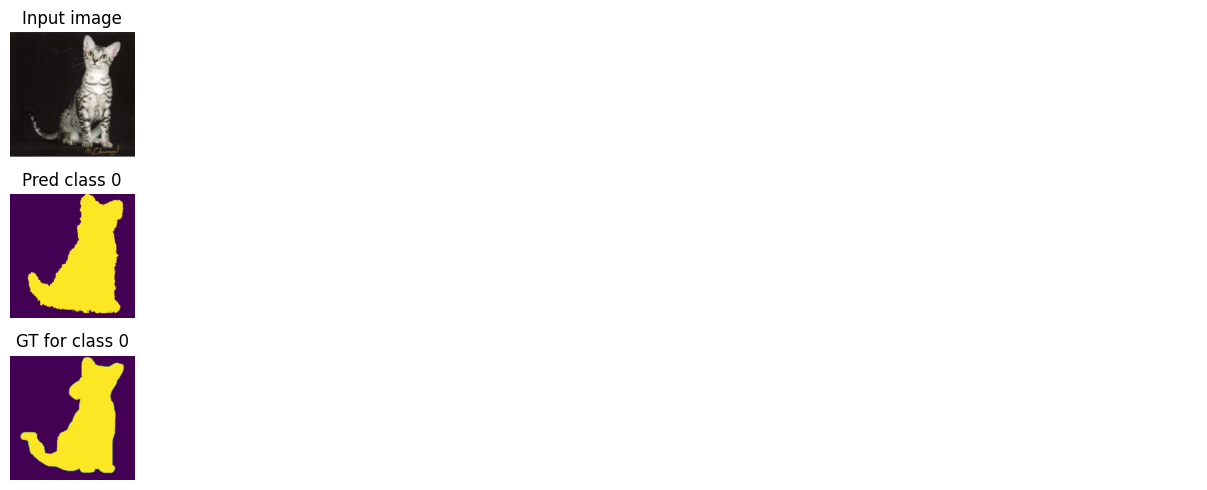

Train loss: 0.01392 | Time: 25m 22s | Val loss: 0.01660
Train_DICE_avg: 0.92977 | Train_Jaccard_avg: 0.87257 | Train_Sensitivity_avg: 0.95115 | Train_Specificity_avg: 0.93337 
Class 0 - Train_DICE: 0.92977 | Train_Jaccard: 0.87257 | Train_Sensitivity: 0.95115 | Train_Specificity: 0.93337 
Val_DICE_avg: 0.92116 | Val_Jaccard_avg: 0.85955 | Val_Sensitivity_avg: 0.95050 | Val_Specificity_avg: 0.92708 
Class 0 - Val_DICE: 0.92116 | Val_Jaccard: 0.85955 | Val_Sensitivity: 0.95050 | Val_Specificity: 0.92708 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01383 | Time: 25m 49s | Val loss: 0.01652
Train_DICE_avg: 0.93049 | Train_Jaccard_avg: 0.87393 | Train_Sensitivity_avg: 0.95030 | Train_Specificity_avg: 0.93548 
Class 0 - Train_DICE: 0.93049 | Train_Jaccard: 0.87393 | Train_Sensitivity: 0.95030 | Train_Specificity: 0.93548 
Val_DICE_avg: 0.92156 | Val_Jaccard_avg: 0.86014 | Val_Sensitivity_avg: 0.95054 | Val_Specificity_avg: 0.92726 
Class 0 - Val_DICE: 0.92156 | Val_Jaccard: 0.86014 | Val_Sensitivity: 0.95054 | Val_Specificity: 0.92726 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01386 | Time: 26m 16s | Val loss: 0.01656
Train_DICE_avg: 0.93086 | Train_Jaccard_avg: 0.87458 | Train_Sensitivity_avg: 0.95025 | Train_Specificity_avg: 0.93464 
Class 0 - Train_DICE: 0.93086 | Train_Jaccard: 0.87458 | Train_Sensitivity: 0.95025 | Train_Specificity: 0.93464 
Val_DICE_avg: 0.92159 | Val_Jaccard_avg: 0.86022 | Val_Sensitivity_avg: 0.95024 | Val_Specificity_avg: 0.92769 
Class 0 - Val_DICE: 0.92159 | Val_Jaccard: 0.86022 | Val_Sensitivity: 0.95024 | Val_Specificity: 0.92769 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01381 | Time: 26m 44s | Val loss: 0.01646
Train_DICE_avg: 0.93056 | Train_Jaccard_avg: 0.87397 | Train_Sensitivity_avg: 0.95102 | Train_Specificity_avg: 0.93454 
Class 0 - Train_DICE: 0.93056 | Train_Jaccard: 0.87397 | Train_Sensitivity: 0.95102 | Train_Specificity: 0.93454 
Val_DICE_avg: 0.92170 | Val_Jaccard_avg: 0.86049 | Val_Sensitivity_avg: 0.95054 | Val_Specificity_avg: 0.92777 
Class 0 - Val_DICE: 0.92170 | Val_Jaccard: 0.86049 | Val_Sensitivity: 0.95054 | Val_Specificity: 0.92777 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.01355 | Time: 27m 11s | Val loss: 0.01644
Train_DICE_avg: 0.93171 | Train_Jaccard_avg: 0.87600 | Train_Sensitivity_avg: 0.95138 | Train_Specificity_avg: 0.93655 
Class 0 - Train_DICE: 0.93171 | Train_Jaccard: 0.87600 | Train_Sensitivity: 0.95138 | Train_Specificity: 0.93655 
Val_DICE_avg: 0.92232 | Val_Jaccard_avg: 0.86148 | Val_Sensitivity_avg: 0.95008 | Val_Specificity_avg: 0.92851 
Class 0 - Val_DICE: 0.92232 | Val_Jaccard: 0.86148 | Val_Sensitivity: 0.95008 | Val_Specificity: 0.92851 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

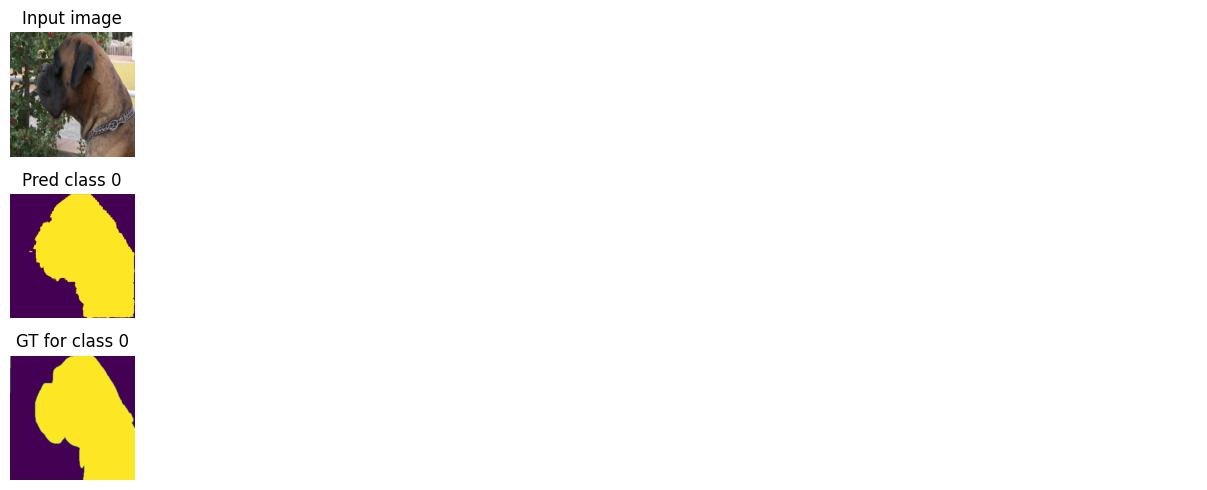

Train loss: 0.01370 | Time: 27m 39s | Val loss: 0.01642
Train_DICE_avg: 0.93137 | Train_Jaccard_avg: 0.87533 | Train_Sensitivity_avg: 0.95213 | Train_Specificity_avg: 0.93459 
Class 0 - Train_DICE: 0.93137 | Train_Jaccard: 0.87533 | Train_Sensitivity: 0.95213 | Train_Specificity: 0.93459 
Val_DICE_avg: 0.92235 | Val_Jaccard_avg: 0.86155 | Val_Sensitivity_avg: 0.95006 | Val_Specificity_avg: 0.92873 
Class 0 - Val_DICE: 0.92235 | Val_Jaccard: 0.86155 | Val_Sensitivity: 0.95006 | Val_Specificity: 0.92873 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]



Global Performance Metrics:
Loss mean: 0.01548, std: 0.00162
Dice Coefficient mean: 0.92512, std: 0.04962
Jaccard Index mean: 0.86419, std: 0.07637
Sensitivity mean: 0.95980, std: 0.03442
Specificity mean: 0.92368, std: 0.06664

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.92512, std: 0.04962
Jaccard mean: 0.86419, std: 0.07637
Sensitivity mean: 0.95980, std: 0.03442
Specificity mean: 0.92368, std: 0.06664


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","OxfordIIITPet-FCN-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.63 GB
GPU Memory - Reserved: 4.15 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Training Epoch 1/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 1/61:   0%|          | 0/8 [00:00<?, ?it/s]

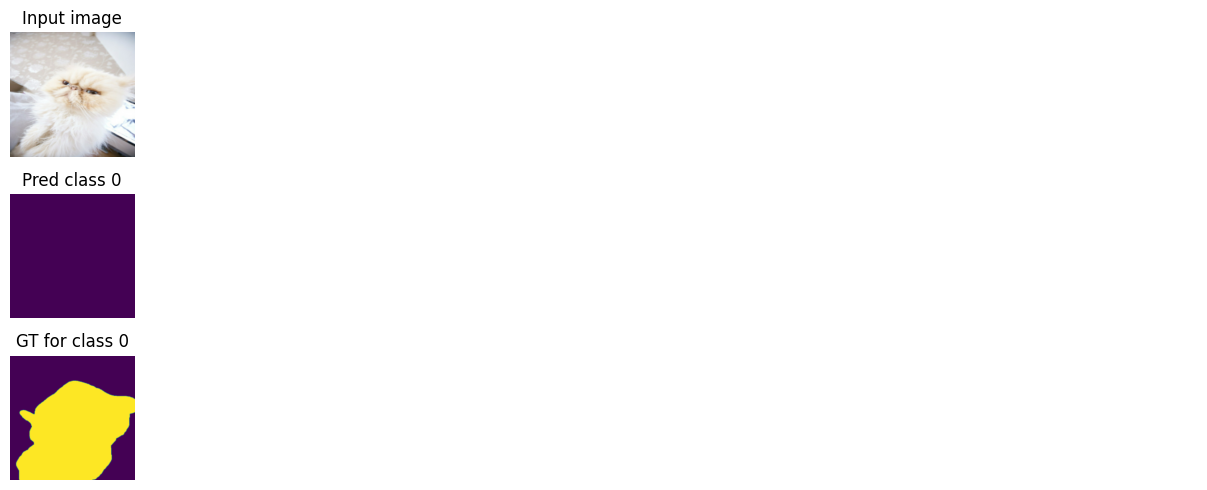

Train loss: 0.60519 | Time: 0m 27s | Val loss: 0.60495
Train_DICE_avg: 0.00287 | Train_Jaccard_avg: 0.00287 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.59150 
Class 0 - Train_DICE: 0.00287 | Train_Jaccard: 0.00287 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59150 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.59279 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.59279 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 2/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.60450 | Time: 0m 53s | Val loss: 0.60448
Train_DICE_avg: 0.00287 | Train_Jaccard_avg: 0.00287 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.59154 
Class 0 - Train_DICE: 0.00287 | Train_Jaccard: 0.00287 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59154 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.59279 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.59279 

Epoch 3/61


Training Epoch 3/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 3/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.60335 | Time: 1m 20s | Val loss: 0.60282
Train_DICE_avg: 0.00287 | Train_Jaccard_avg: 0.00287 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.59152 
Class 0 - Train_DICE: 0.00287 | Train_Jaccard: 0.00287 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59152 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.59279 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.59279 

Epoch 4/61


Training Epoch 4/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 4/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.60154 | Time: 1m 46s | Val loss: 0.59998
Train_DICE_avg: 0.00287 | Train_Jaccard_avg: 0.00287 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.59178 
Class 0 - Train_DICE: 0.00287 | Train_Jaccard: 0.00287 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59178 
Val_DICE_avg: 0.00347 | Val_Jaccard_avg: 0.00347 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.59279 
Class 0 - Val_DICE: 0.00347 | Val_Jaccard: 0.00347 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.59279 

Epoch 5/61


Training Epoch 5/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 5/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.59846 | Time: 2m 13s | Val loss: 0.59685
Train_DICE_avg: 0.00288 | Train_Jaccard_avg: 0.00288 | Train_Sensitivity_avg: 1.00000 | Train_Specificity_avg: 0.59150 
Class 0 - Train_DICE: 0.00288 | Train_Jaccard: 0.00288 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.59150 
Val_DICE_avg: 0.00357 | Val_Jaccard_avg: 0.00352 | Val_Sensitivity_avg: 0.99873 | Val_Specificity_avg: 0.59279 
Class 0 - Val_DICE: 0.00357 | Val_Jaccard: 0.00352 | Val_Sensitivity: 0.99873 | Val_Specificity: 0.59279 

Epoch 6/61


Training Epoch 6/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 6/61:   0%|          | 0/8 [00:00<?, ?it/s]

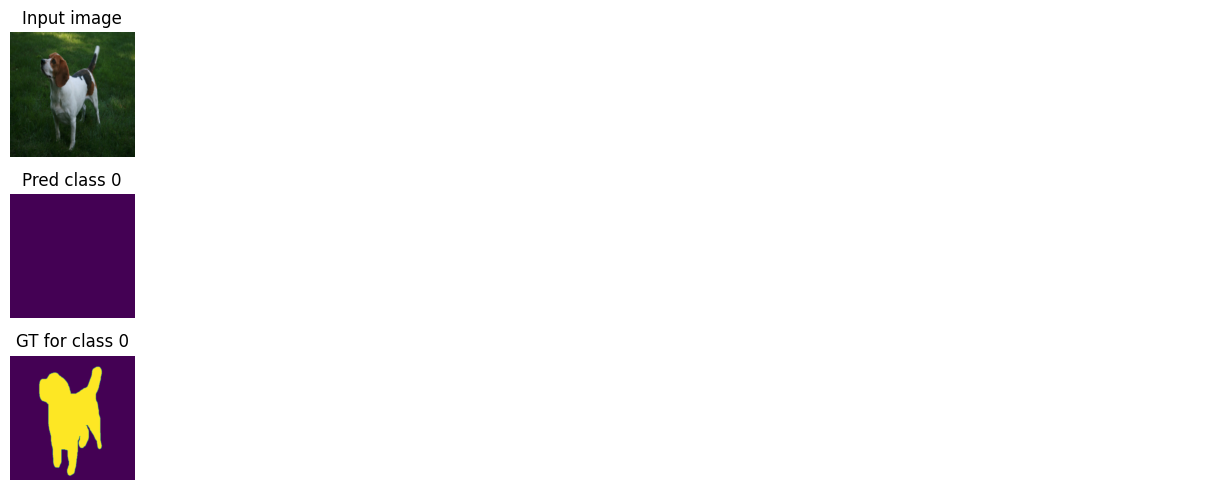

Train loss: 0.59461 | Time: 2m 40s | Val loss: 0.59279
Train_DICE_avg: 0.00387 | Train_Jaccard_avg: 0.00338 | Train_Sensitivity_avg: 0.98840 | Train_Specificity_avg: 0.59158 
Class 0 - Train_DICE: 0.00387 | Train_Jaccard: 0.00338 | Train_Sensitivity: 0.98840 | Train_Specificity: 0.59158 
Val_DICE_avg: 0.00707 | Val_Jaccard_avg: 0.00539 | Val_Sensitivity_avg: 0.97336 | Val_Specificity_avg: 0.59303 
Class 0 - Val_DICE: 0.00707 | Val_Jaccard: 0.00539 | Val_Sensitivity: 0.97336 | Val_Specificity: 0.59303 

Epoch 7/61


Training Epoch 7/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 7/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.58977 | Time: 3m 7s | Val loss: 0.58779
Train_DICE_avg: 0.02645 | Train_Jaccard_avg: 0.01451 | Train_Sensitivity_avg: 0.95608 | Train_Specificity_avg: 0.59406 
Class 0 - Train_DICE: 0.02645 | Train_Jaccard: 0.01451 | Train_Sensitivity: 0.95608 | Train_Specificity: 0.59406 
Val_DICE_avg: 0.04406 | Val_Jaccard_avg: 0.02454 | Val_Sensitivity_avg: 0.94395 | Val_Specificity_avg: 0.59693 
Class 0 - Val_DICE: 0.04406 | Val_Jaccard: 0.02454 | Val_Sensitivity: 0.94395 | Val_Specificity: 0.59693 

Epoch 8/61


Training Epoch 8/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 8/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.58350 | Time: 3m 34s | Val loss: 0.58168
Train_DICE_avg: 0.15350 | Train_Jaccard_avg: 0.09241 | Train_Sensitivity_avg: 0.92569 | Train_Specificity_avg: 0.60966 
Class 0 - Train_DICE: 0.15350 | Train_Jaccard: 0.09241 | Train_Sensitivity: 0.92569 | Train_Specificity: 0.60966 
Val_DICE_avg: 0.20202 | Val_Jaccard_avg: 0.12346 | Val_Sensitivity_avg: 0.91173 | Val_Specificity_avg: 0.61832 
Class 0 - Val_DICE: 0.20202 | Val_Jaccard: 0.12346 | Val_Sensitivity: 0.91173 | Val_Specificity: 0.61832 

Epoch 9/61


Training Epoch 9/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 9/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.57639 | Time: 4m 1s | Val loss: 0.57473
Train_DICE_avg: 0.38633 | Train_Jaccard_avg: 0.25821 | Train_Sensitivity_avg: 0.87589 | Train_Specificity_avg: 0.65314 
Class 0 - Train_DICE: 0.38633 | Train_Jaccard: 0.25821 | Train_Sensitivity: 0.87589 | Train_Specificity: 0.65314 
Val_DICE_avg: 0.42957 | Val_Jaccard_avg: 0.29169 | Val_Sensitivity_avg: 0.86400 | Val_Specificity_avg: 0.66521 
Class 0 - Val_DICE: 0.42957 | Val_Jaccard: 0.29169 | Val_Sensitivity: 0.86400 | Val_Specificity: 0.66521 

Epoch 10/61


Training Epoch 10/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 10/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.56841 | Time: 4m 27s | Val loss: 0.56633
Train_DICE_avg: 0.58405 | Train_Jaccard_avg: 0.42791 | Train_Sensitivity_avg: 0.82411 | Train_Specificity_avg: 0.71550 
Class 0 - Train_DICE: 0.58405 | Train_Jaccard: 0.42791 | Train_Sensitivity: 0.82411 | Train_Specificity: 0.71550 
Val_DICE_avg: 0.60635 | Val_Jaccard_avg: 0.44991 | Val_Sensitivity_avg: 0.81352 | Val_Specificity_avg: 0.72720 
Class 0 - Val_DICE: 0.60635 | Val_Jaccard: 0.44991 | Val_Sensitivity: 0.81352 | Val_Specificity: 0.72720 

Epoch 11/61
Training phase 2


Training Epoch 11/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 11/61:   0%|          | 0/8 [00:00<?, ?it/s]

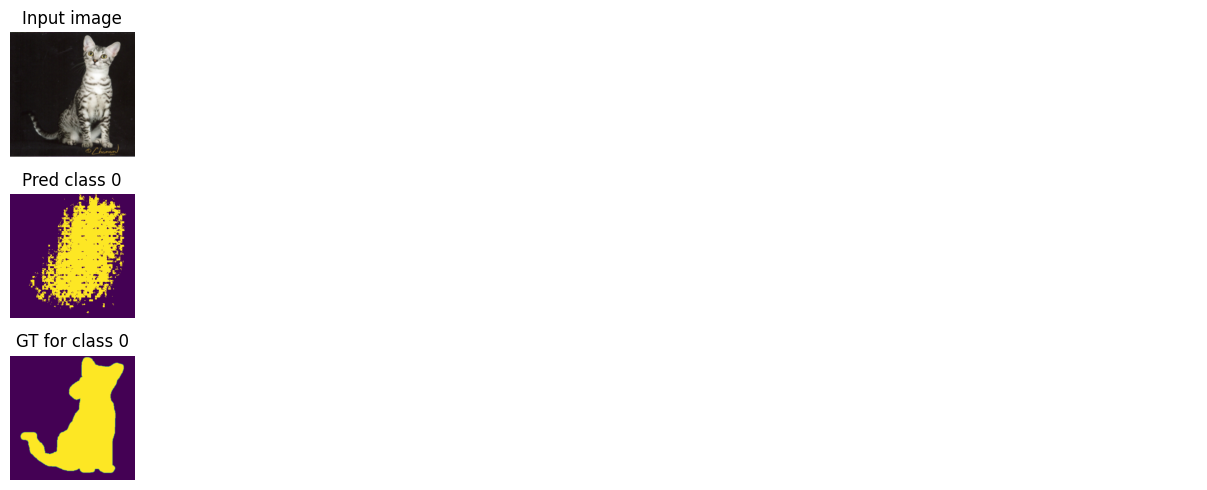

Train loss: 0.56094 | Time: 4m 55s | Val loss: 0.56131
Train_DICE_avg: 0.67097 | Train_Jaccard_avg: 0.51566 | Train_Sensitivity_avg: 0.78403 | Train_Specificity_avg: 0.76160 
Class 0 - Train_DICE: 0.67097 | Train_Jaccard: 0.51566 | Train_Sensitivity: 0.78403 | Train_Specificity: 0.76160 
Val_DICE_avg: 0.66597 | Val_Jaccard_avg: 0.51095 | Val_Sensitivity_avg: 0.78751 | Val_Specificity_avg: 0.76045 
Class 0 - Val_DICE: 0.66597 | Val_Jaccard: 0.51095 | Val_Sensitivity: 0.78751 | Val_Specificity: 0.76045 

Epoch 12/61


Training Epoch 12/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 12/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.55515 | Time: 5m 22s | Val loss: 0.55588
Train_DICE_avg: 0.70865 | Train_Jaccard_avg: 0.55821 | Train_Sensitivity_avg: 0.75976 | Train_Specificity_avg: 0.79165 
Class 0 - Train_DICE: 0.70865 | Train_Jaccard: 0.55821 | Train_Sensitivity: 0.75976 | Train_Specificity: 0.79165 
Val_DICE_avg: 0.70443 | Val_Jaccard_avg: 0.55369 | Val_Sensitivity_avg: 0.76281 | Val_Specificity_avg: 0.79091 
Class 0 - Val_DICE: 0.70443 | Val_Jaccard: 0.55369 | Val_Sensitivity: 0.76281 | Val_Specificity: 0.79091 

Epoch 13/61


Training Epoch 13/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 13/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.54915 | Time: 5m 49s | Val loss: 0.54928
Train_DICE_avg: 0.72777 | Train_Jaccard_avg: 0.58160 | Train_Sensitivity_avg: 0.73697 | Train_Specificity_avg: 0.81681 
Class 0 - Train_DICE: 0.72777 | Train_Jaccard: 0.58160 | Train_Sensitivity: 0.73697 | Train_Specificity: 0.81681 
Val_DICE_avg: 0.73158 | Val_Jaccard_avg: 0.58638 | Val_Sensitivity_avg: 0.73697 | Val_Specificity_avg: 0.82212 
Class 0 - Val_DICE: 0.73158 | Val_Jaccard: 0.58638 | Val_Sensitivity: 0.73697 | Val_Specificity: 0.82212 

Epoch 14/61


Training Epoch 14/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 14/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.54276 | Time: 6m 16s | Val loss: 0.54301
Train_DICE_avg: 0.73790 | Train_Jaccard_avg: 0.59592 | Train_Sensitivity_avg: 0.71602 | Train_Specificity_avg: 0.83771 
Class 0 - Train_DICE: 0.73790 | Train_Jaccard: 0.59592 | Train_Sensitivity: 0.71602 | Train_Specificity: 0.83771 
Val_DICE_avg: 0.74362 | Val_Jaccard_avg: 0.60270 | Val_Sensitivity_avg: 0.71535 | Val_Specificity_avg: 0.84627 
Class 0 - Val_DICE: 0.74362 | Val_Jaccard: 0.60270 | Val_Sensitivity: 0.71535 | Val_Specificity: 0.84627 

Epoch 15/61


Training Epoch 15/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 15/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.53618 | Time: 6m 43s | Val loss: 0.53635
Train_DICE_avg: 0.74280 | Train_Jaccard_avg: 0.60310 | Train_Sensitivity_avg: 0.69642 | Train_Specificity_avg: 0.85768 
Class 0 - Train_DICE: 0.74280 | Train_Jaccard: 0.60310 | Train_Sensitivity: 0.69642 | Train_Specificity: 0.85768 
Val_DICE_avg: 0.74838 | Val_Jaccard_avg: 0.61056 | Val_Sensitivity_avg: 0.69550 | Val_Specificity_avg: 0.86728 
Class 0 - Val_DICE: 0.74838 | Val_Jaccard: 0.61056 | Val_Sensitivity: 0.69550 | Val_Specificity: 0.86728 

Epoch 16/61


Training Epoch 16/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 16/61:   0%|          | 0/8 [00:00<?, ?it/s]

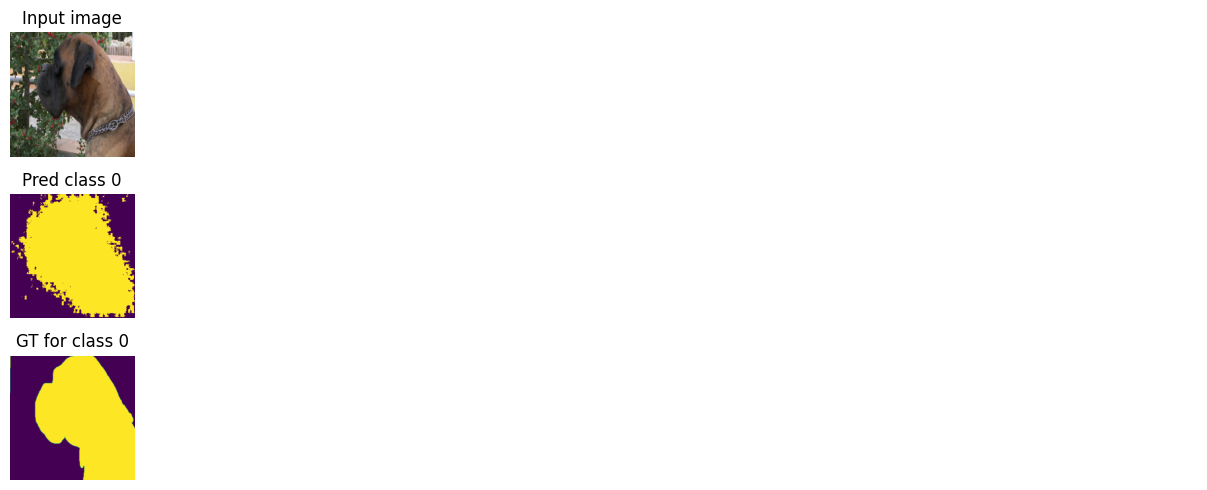

Train loss: 0.52980 | Time: 7m 11s | Val loss: 0.53008
Train_DICE_avg: 0.74251 | Train_Jaccard_avg: 0.60448 | Train_Sensitivity_avg: 0.67751 | Train_Specificity_avg: 0.87254 
Class 0 - Train_DICE: 0.74251 | Train_Jaccard: 0.60448 | Train_Sensitivity: 0.67751 | Train_Specificity: 0.87254 
Val_DICE_avg: 0.74805 | Val_Jaccard_avg: 0.61175 | Val_Sensitivity_avg: 0.67664 | Val_Specificity_avg: 0.88434 
Class 0 - Val_DICE: 0.74805 | Val_Jaccard: 0.61175 | Val_Sensitivity: 0.67664 | Val_Specificity: 0.88434 

Epoch 17/61


Training Epoch 17/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 17/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.52327 | Time: 7m 38s | Val loss: 0.52398
Train_DICE_avg: 0.73835 | Train_Jaccard_avg: 0.60065 | Train_Sensitivity_avg: 0.65879 | Train_Specificity_avg: 0.88529 
Class 0 - Train_DICE: 0.73835 | Train_Jaccard: 0.60065 | Train_Sensitivity: 0.65879 | Train_Specificity: 0.88529 
Val_DICE_avg: 0.74508 | Val_Jaccard_avg: 0.60940 | Val_Sensitivity_avg: 0.66011 | Val_Specificity_avg: 0.89832 
Class 0 - Val_DICE: 0.74508 | Val_Jaccard: 0.60940 | Val_Sensitivity: 0.66011 | Val_Specificity: 0.89832 

Epoch 18/61


Training Epoch 18/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 18/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.51673 | Time: 8m 5s | Val loss: 0.51650
Train_DICE_avg: 0.73513 | Train_Jaccard_avg: 0.59751 | Train_Sensitivity_avg: 0.64465 | Train_Specificity_avg: 0.89689 
Class 0 - Train_DICE: 0.73513 | Train_Jaccard: 0.59751 | Train_Sensitivity: 0.64465 | Train_Specificity: 0.89689 
Val_DICE_avg: 0.73881 | Val_Jaccard_avg: 0.60271 | Val_Sensitivity_avg: 0.64145 | Val_Specificity_avg: 0.91126 
Class 0 - Val_DICE: 0.73881 | Val_Jaccard: 0.60271 | Val_Sensitivity: 0.64145 | Val_Specificity: 0.91126 

Epoch 19/61


Training Epoch 19/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 19/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.51082 | Time: 8m 31s | Val loss: 0.51083
Train_DICE_avg: 0.73063 | Train_Jaccard_avg: 0.59332 | Train_Sensitivity_avg: 0.63211 | Train_Specificity_avg: 0.90734 
Class 0 - Train_DICE: 0.73063 | Train_Jaccard: 0.59332 | Train_Sensitivity: 0.63211 | Train_Specificity: 0.90734 
Val_DICE_avg: 0.73397 | Val_Jaccard_avg: 0.59747 | Val_Sensitivity_avg: 0.62922 | Val_Specificity_avg: 0.92015 
Class 0 - Val_DICE: 0.73397 | Val_Jaccard: 0.59747 | Val_Sensitivity: 0.62922 | Val_Specificity: 0.92015 

Epoch 20/61


Training Epoch 20/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 20/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.50477 | Time: 8m 58s | Val loss: 0.50454
Train_DICE_avg: 0.72440 | Train_Jaccard_avg: 0.58611 | Train_Sensitivity_avg: 0.61912 | Train_Specificity_avg: 0.91263 
Class 0 - Train_DICE: 0.72440 | Train_Jaccard: 0.58611 | Train_Sensitivity: 0.61912 | Train_Specificity: 0.91263 
Val_DICE_avg: 0.72820 | Val_Jaccard_avg: 0.59094 | Val_Sensitivity_avg: 0.61727 | Val_Specificity_avg: 0.92740 
Class 0 - Val_DICE: 0.72820 | Val_Jaccard: 0.59094 | Val_Sensitivity: 0.61727 | Val_Specificity: 0.92740 

Epoch 21/61
Training phase 3


Training Epoch 21/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 21/61:   0%|          | 0/8 [00:00<?, ?it/s]

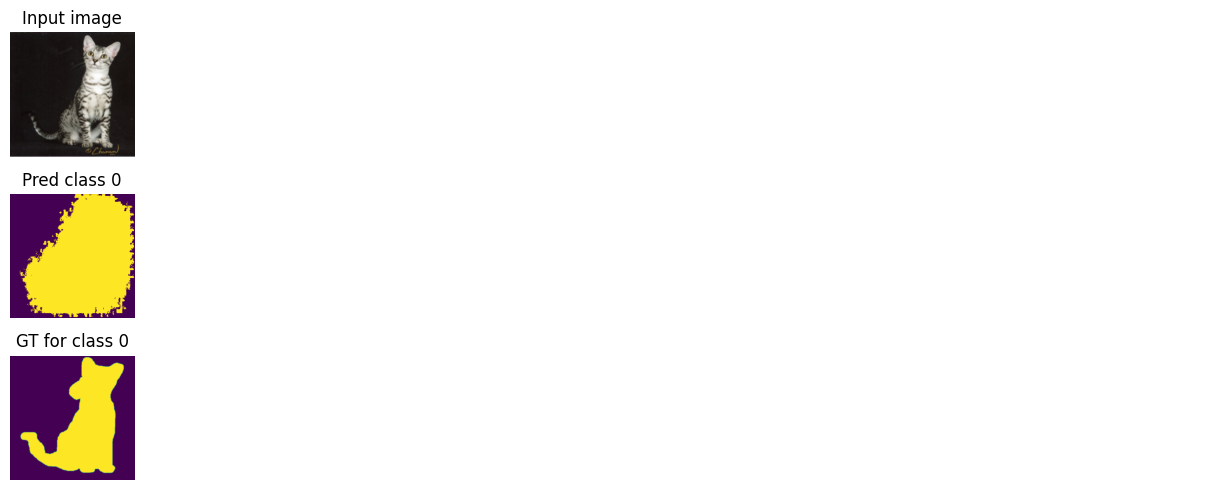

Train loss: 0.49652 | Time: 9m 25s | Val loss: 0.48990
Train_DICE_avg: 0.73049 | Train_Jaccard_avg: 0.59366 | Train_Sensitivity_avg: 0.61944 | Train_Specificity_avg: 0.92644 
Class 0 - Train_DICE: 0.73049 | Train_Jaccard: 0.59366 | Train_Sensitivity: 0.61944 | Train_Specificity: 0.92644 
Val_DICE_avg: 0.73846 | Val_Jaccard_avg: 0.60338 | Val_Sensitivity_avg: 0.62250 | Val_Specificity_avg: 0.94407 
Class 0 - Val_DICE: 0.73846 | Val_Jaccard: 0.60338 | Val_Sensitivity: 0.62250 | Val_Specificity: 0.94407 

Epoch 22/61


Training Epoch 22/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 22/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.48705 | Time: 9m 52s | Val loss: 0.48014
Train_DICE_avg: 0.74463 | Train_Jaccard_avg: 0.61116 | Train_Sensitivity_avg: 0.63431 | Train_Specificity_avg: 0.93565 
Class 0 - Train_DICE: 0.74463 | Train_Jaccard: 0.61116 | Train_Sensitivity: 0.63431 | Train_Specificity: 0.93565 
Val_DICE_avg: 0.74440 | Val_Jaccard_avg: 0.61035 | Val_Sensitivity_avg: 0.62626 | Val_Specificity_avg: 0.95211 
Class 0 - Val_DICE: 0.74440 | Val_Jaccard: 0.61035 | Val_Sensitivity: 0.62626 | Val_Specificity: 0.95211 

Epoch 23/61


Training Epoch 23/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 23/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.47962 | Time: 10m 20s | Val loss: 0.47328
Train_DICE_avg: 0.75344 | Train_Jaccard_avg: 0.62188 | Train_Sensitivity_avg: 0.64251 | Train_Specificity_avg: 0.94280 
Class 0 - Train_DICE: 0.75344 | Train_Jaccard: 0.62188 | Train_Sensitivity: 0.64251 | Train_Specificity: 0.94280 
Val_DICE_avg: 0.75173 | Val_Jaccard_avg: 0.61933 | Val_Sensitivity_avg: 0.63505 | Val_Specificity_avg: 0.95443 
Class 0 - Val_DICE: 0.75173 | Val_Jaccard: 0.61933 | Val_Sensitivity: 0.63505 | Val_Specificity: 0.95443 

Epoch 24/61


Training Epoch 24/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 24/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.47258 | Time: 10m 47s | Val loss: 0.46622
Train_DICE_avg: 0.76152 | Train_Jaccard_avg: 0.63169 | Train_Sensitivity_avg: 0.65026 | Train_Specificity_avg: 0.94850 
Class 0 - Train_DICE: 0.76152 | Train_Jaccard: 0.63169 | Train_Sensitivity: 0.65026 | Train_Specificity: 0.94850 
Val_DICE_avg: 0.75917 | Val_Jaccard_avg: 0.62840 | Val_Sensitivity_avg: 0.64347 | Val_Specificity_avg: 0.95753 
Class 0 - Val_DICE: 0.75917 | Val_Jaccard: 0.62840 | Val_Sensitivity: 0.64347 | Val_Specificity: 0.95753 

Epoch 25/61


Training Epoch 25/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 25/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.46600 | Time: 11m 14s | Val loss: 0.46068
Train_DICE_avg: 0.76682 | Train_Jaccard_avg: 0.63796 | Train_Sensitivity_avg: 0.65748 | Train_Specificity_avg: 0.94760 
Class 0 - Train_DICE: 0.76682 | Train_Jaccard: 0.63796 | Train_Sensitivity: 0.65748 | Train_Specificity: 0.94760 
Val_DICE_avg: 0.76537 | Val_Jaccard_avg: 0.63625 | Val_Sensitivity_avg: 0.65079 | Val_Specificity_avg: 0.95972 
Class 0 - Val_DICE: 0.76537 | Val_Jaccard: 0.63625 | Val_Sensitivity: 0.65079 | Val_Specificity: 0.95972 

Epoch 26/61


Training Epoch 26/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 26/61:   0%|          | 0/8 [00:00<?, ?it/s]

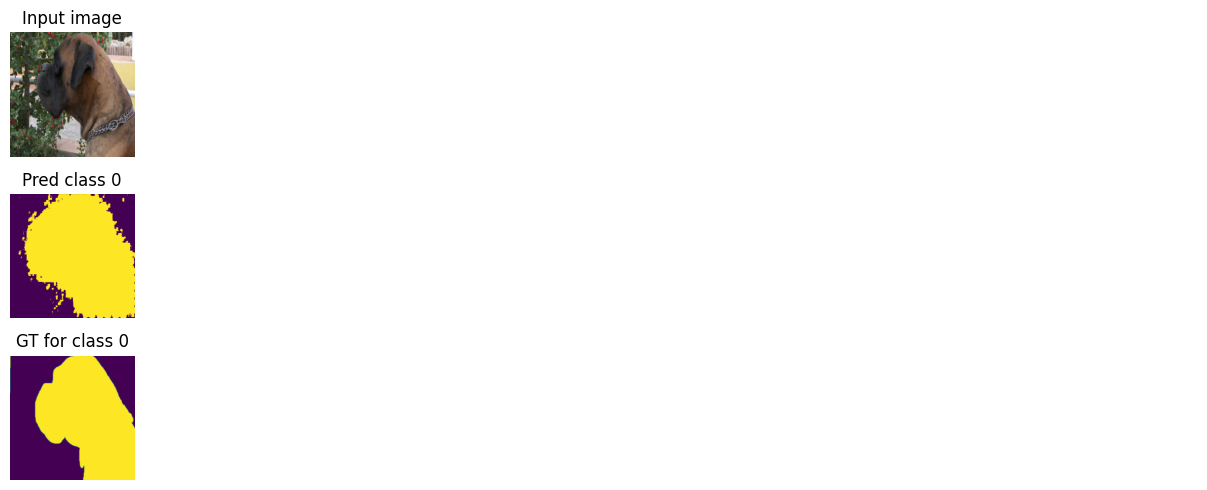

Train loss: 0.46029 | Time: 11m 41s | Val loss: 0.45572
Train_DICE_avg: 0.77097 | Train_Jaccard_avg: 0.64316 | Train_Sensitivity_avg: 0.66179 | Train_Specificity_avg: 0.95091 
Class 0 - Train_DICE: 0.77097 | Train_Jaccard: 0.64316 | Train_Sensitivity: 0.66179 | Train_Specificity: 0.95091 
Val_DICE_avg: 0.77166 | Val_Jaccard_avg: 0.64419 | Val_Sensitivity_avg: 0.65864 | Val_Specificity_avg: 0.96105 
Class 0 - Val_DICE: 0.77166 | Val_Jaccard: 0.64419 | Val_Sensitivity: 0.65864 | Val_Specificity: 0.96105 

Epoch 27/61


Training Epoch 27/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 27/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.45453 | Time: 12m 8s | Val loss: 0.45018
Train_DICE_avg: 0.77612 | Train_Jaccard_avg: 0.64968 | Train_Sensitivity_avg: 0.66726 | Train_Specificity_avg: 0.95387 
Class 0 - Train_DICE: 0.77612 | Train_Jaccard: 0.64968 | Train_Sensitivity: 0.66726 | Train_Specificity: 0.95387 
Val_DICE_avg: 0.77748 | Val_Jaccard_avg: 0.65143 | Val_Sensitivity_avg: 0.66605 | Val_Specificity_avg: 0.96194 
Class 0 - Val_DICE: 0.77748 | Val_Jaccard: 0.65143 | Val_Sensitivity: 0.66605 | Val_Specificity: 0.96194 

Epoch 28/61


Training Epoch 28/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 28/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.44911 | Time: 12m 36s | Val loss: 0.44519
Train_DICE_avg: 0.78062 | Train_Jaccard_avg: 0.65530 | Train_Sensitivity_avg: 0.67314 | Train_Specificity_avg: 0.95400 
Class 0 - Train_DICE: 0.78062 | Train_Jaccard: 0.65530 | Train_Sensitivity: 0.67314 | Train_Specificity: 0.95400 
Val_DICE_avg: 0.78299 | Val_Jaccard_avg: 0.65848 | Val_Sensitivity_avg: 0.67304 | Val_Specificity_avg: 0.96307 
Class 0 - Val_DICE: 0.78299 | Val_Jaccard: 0.65848 | Val_Sensitivity: 0.67304 | Val_Specificity: 0.96307 

Epoch 29/61


Training Epoch 29/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 29/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.44396 | Time: 13m 3s | Val loss: 0.44053
Train_DICE_avg: 0.78522 | Train_Jaccard_avg: 0.66112 | Train_Sensitivity_avg: 0.67856 | Train_Specificity_avg: 0.95488 
Class 0 - Train_DICE: 0.78522 | Train_Jaccard: 0.66112 | Train_Sensitivity: 0.67856 | Train_Specificity: 0.95488 
Val_DICE_avg: 0.78789 | Val_Jaccard_avg: 0.66488 | Val_Sensitivity_avg: 0.67927 | Val_Specificity_avg: 0.96418 
Class 0 - Val_DICE: 0.78789 | Val_Jaccard: 0.66488 | Val_Sensitivity: 0.67927 | Val_Specificity: 0.96418 

Epoch 30/61


Training Epoch 30/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 30/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.43940 | Time: 13m 30s | Val loss: 0.43602
Train_DICE_avg: 0.78839 | Train_Jaccard_avg: 0.66513 | Train_Sensitivity_avg: 0.68235 | Train_Specificity_avg: 0.95627 
Class 0 - Train_DICE: 0.78839 | Train_Jaccard: 0.66513 | Train_Sensitivity: 0.68235 | Train_Specificity: 0.95627 
Val_DICE_avg: 0.79116 | Val_Jaccard_avg: 0.66910 | Val_Sensitivity_avg: 0.68346 | Val_Specificity_avg: 0.96491 
Class 0 - Val_DICE: 0.79116 | Val_Jaccard: 0.66910 | Val_Sensitivity: 0.68346 | Val_Specificity: 0.96491 

Epoch 31/61
Training phase 4


Training Epoch 31/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 31/61:   0%|          | 0/8 [00:00<?, ?it/s]

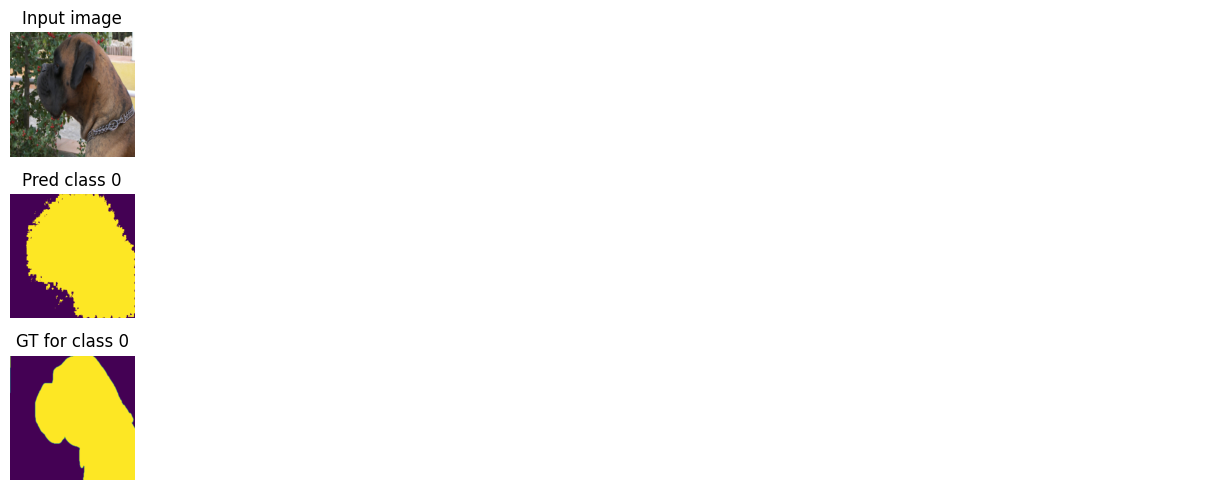

Train loss: 0.43454 | Time: 13m 58s | Val loss: 0.42873
Train_DICE_avg: 0.79100 | Train_Jaccard_avg: 0.66848 | Train_Sensitivity_avg: 0.68503 | Train_Specificity_avg: 0.95882 
Class 0 - Train_DICE: 0.79100 | Train_Jaccard: 0.66848 | Train_Sensitivity: 0.68503 | Train_Specificity: 0.95882 
Val_DICE_avg: 0.79227 | Val_Jaccard_avg: 0.67028 | Val_Sensitivity_avg: 0.68274 | Val_Specificity_avg: 0.96876 
Class 0 - Val_DICE: 0.79227 | Val_Jaccard: 0.67028 | Val_Sensitivity: 0.68274 | Val_Specificity: 0.96876 

Epoch 32/61


Training Epoch 32/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 32/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.42896 | Time: 14m 25s | Val loss: 0.42535
Train_DICE_avg: 0.79588 | Train_Jaccard_avg: 0.67475 | Train_Sensitivity_avg: 0.69071 | Train_Specificity_avg: 0.96044 
Class 0 - Train_DICE: 0.79588 | Train_Jaccard: 0.67475 | Train_Sensitivity: 0.69071 | Train_Specificity: 0.96044 
Val_DICE_avg: 0.80113 | Val_Jaccard_avg: 0.68189 | Val_Sensitivity_avg: 0.69436 | Val_Specificity_avg: 0.97013 
Class 0 - Val_DICE: 0.80113 | Val_Jaccard: 0.68189 | Val_Sensitivity: 0.69436 | Val_Specificity: 0.97013 

Epoch 33/61


Training Epoch 33/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 33/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.42430 | Time: 14m 52s | Val loss: 0.42111
Train_DICE_avg: 0.80089 | Train_Jaccard_avg: 0.68105 | Train_Sensitivity_avg: 0.69589 | Train_Specificity_avg: 0.96256 
Class 0 - Train_DICE: 0.80089 | Train_Jaccard: 0.68105 | Train_Sensitivity: 0.69589 | Train_Specificity: 0.96256 
Val_DICE_avg: 0.80390 | Val_Jaccard_avg: 0.68542 | Val_Sensitivity_avg: 0.69737 | Val_Specificity_avg: 0.97139 
Class 0 - Val_DICE: 0.80390 | Val_Jaccard: 0.68542 | Val_Sensitivity: 0.69737 | Val_Specificity: 0.97139 

Epoch 34/61


Training Epoch 34/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 34/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.42028 | Time: 15m 20s | Val loss: 0.41775
Train_DICE_avg: 0.80370 | Train_Jaccard_avg: 0.68483 | Train_Sensitivity_avg: 0.69992 | Train_Specificity_avg: 0.96276 
Class 0 - Train_DICE: 0.80370 | Train_Jaccard: 0.68483 | Train_Sensitivity: 0.69992 | Train_Specificity: 0.96276 
Val_DICE_avg: 0.80672 | Val_Jaccard_avg: 0.68923 | Val_Sensitivity_avg: 0.70117 | Val_Specificity_avg: 0.97213 
Class 0 - Val_DICE: 0.80672 | Val_Jaccard: 0.68923 | Val_Sensitivity: 0.70117 | Val_Specificity: 0.97213 

Epoch 35/61


Training Epoch 35/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 35/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.41677 | Time: 15m 47s | Val loss: 0.41453
Train_DICE_avg: 0.80670 | Train_Jaccard_avg: 0.68859 | Train_Sensitivity_avg: 0.70285 | Train_Specificity_avg: 0.96470 
Class 0 - Train_DICE: 0.80670 | Train_Jaccard: 0.68859 | Train_Sensitivity: 0.70285 | Train_Specificity: 0.96470 
Val_DICE_avg: 0.81114 | Val_Jaccard_avg: 0.69518 | Val_Sensitivity_avg: 0.70691 | Val_Specificity_avg: 0.97324 
Class 0 - Val_DICE: 0.81114 | Val_Jaccard: 0.69518 | Val_Sensitivity: 0.70691 | Val_Specificity: 0.97324 

Epoch 36/61


Training Epoch 36/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 36/61:   0%|          | 0/8 [00:00<?, ?it/s]

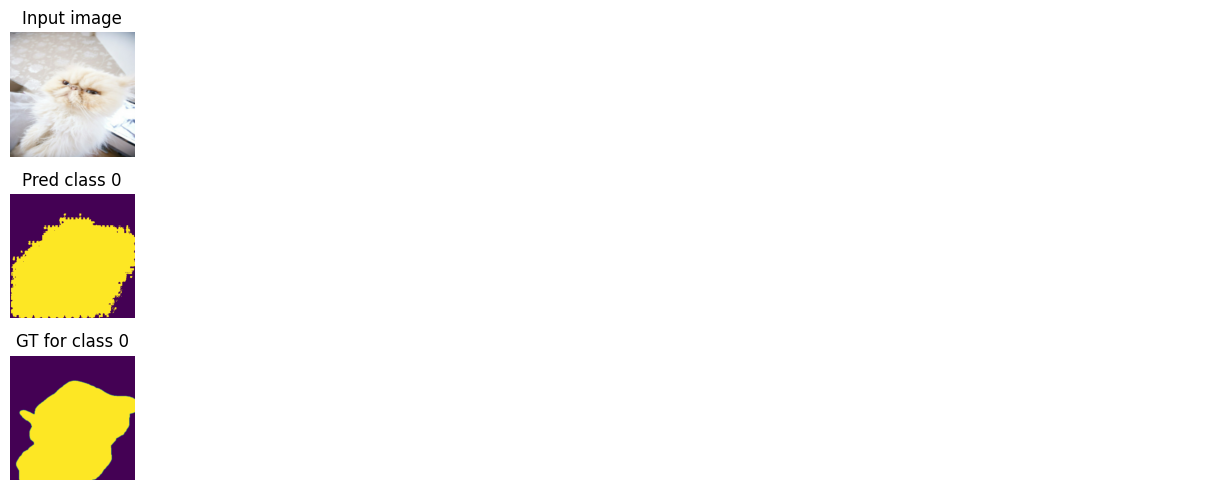

Train loss: 0.41381 | Time: 16m 15s | Val loss: 0.41159
Train_DICE_avg: 0.81085 | Train_Jaccard_avg: 0.69420 | Train_Sensitivity_avg: 0.70814 | Train_Specificity_avg: 0.96578 
Class 0 - Train_DICE: 0.81085 | Train_Jaccard: 0.69420 | Train_Sensitivity: 0.70814 | Train_Specificity: 0.96578 
Val_DICE_avg: 0.81315 | Val_Jaccard_avg: 0.69794 | Val_Sensitivity_avg: 0.70956 | Val_Specificity_avg: 0.97382 
Class 0 - Val_DICE: 0.81315 | Val_Jaccard: 0.69794 | Val_Sensitivity: 0.70956 | Val_Specificity: 0.97382 

Epoch 37/61


Training Epoch 37/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 37/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.41103 | Time: 16m 42s | Val loss: 0.40938
Train_DICE_avg: 0.81266 | Train_Jaccard_avg: 0.69679 | Train_Sensitivity_avg: 0.71050 | Train_Specificity_avg: 0.96782 
Class 0 - Train_DICE: 0.81266 | Train_Jaccard: 0.69679 | Train_Sensitivity: 0.71050 | Train_Specificity: 0.96782 
Val_DICE_avg: 0.81628 | Val_Jaccard_avg: 0.70233 | Val_Sensitivity_avg: 0.71433 | Val_Specificity_avg: 0.97355 
Class 0 - Val_DICE: 0.81628 | Val_Jaccard: 0.70233 | Val_Sensitivity: 0.71433 | Val_Specificity: 0.97355 

Epoch 38/61


Training Epoch 38/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 38/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.40849 | Time: 17m 9s | Val loss: 0.40758
Train_DICE_avg: 0.81545 | Train_Jaccard_avg: 0.70049 | Train_Sensitivity_avg: 0.71439 | Train_Specificity_avg: 0.96694 
Class 0 - Train_DICE: 0.81545 | Train_Jaccard: 0.70049 | Train_Sensitivity: 0.71439 | Train_Specificity: 0.96694 
Val_DICE_avg: 0.81923 | Val_Jaccard_avg: 0.70634 | Val_Sensitivity_avg: 0.71851 | Val_Specificity_avg: 0.97385 
Class 0 - Val_DICE: 0.81923 | Val_Jaccard: 0.70634 | Val_Sensitivity: 0.71851 | Val_Specificity: 0.97385 

Epoch 39/61


Training Epoch 39/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 39/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.40636 | Time: 17m 36s | Val loss: 0.40531
Train_DICE_avg: 0.81750 | Train_Jaccard_avg: 0.70294 | Train_Sensitivity_avg: 0.71674 | Train_Specificity_avg: 0.96727 
Class 0 - Train_DICE: 0.81750 | Train_Jaccard: 0.70294 | Train_Sensitivity: 0.71674 | Train_Specificity: 0.96727 
Val_DICE_avg: 0.81975 | Val_Jaccard_avg: 0.70710 | Val_Sensitivity_avg: 0.71889 | Val_Specificity_avg: 0.97459 
Class 0 - Val_DICE: 0.81975 | Val_Jaccard: 0.70710 | Val_Sensitivity: 0.71889 | Val_Specificity: 0.97459 

Epoch 40/61


Training Epoch 40/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 40/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.40450 | Time: 18m 4s | Val loss: 0.40374
Train_DICE_avg: 0.82088 | Train_Jaccard_avg: 0.70759 | Train_Sensitivity_avg: 0.72150 | Train_Specificity_avg: 0.96763 
Class 0 - Train_DICE: 0.82088 | Train_Jaccard: 0.70759 | Train_Sensitivity: 0.72150 | Train_Specificity: 0.96763 
Val_DICE_avg: 0.82400 | Val_Jaccard_avg: 0.71315 | Val_Sensitivity_avg: 0.72598 | Val_Specificity_avg: 0.97353 
Class 0 - Val_DICE: 0.82400 | Val_Jaccard: 0.71315 | Val_Sensitivity: 0.72598 | Val_Specificity: 0.97353 

Epoch 41/61


Training Epoch 41/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 41/61:   0%|          | 0/8 [00:00<?, ?it/s]

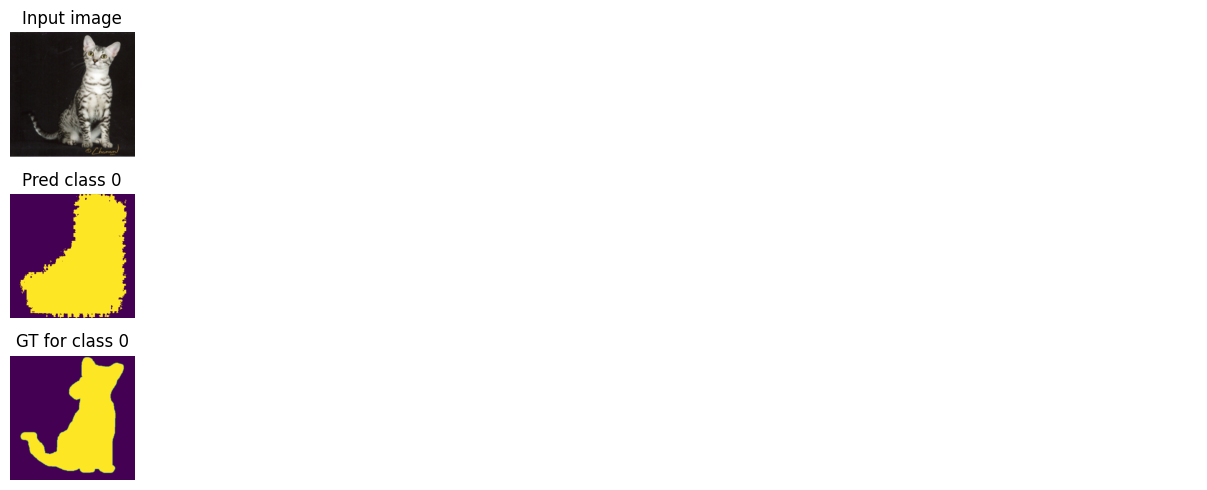

Train loss: 0.40266 | Time: 18m 31s | Val loss: 0.40193
Train_DICE_avg: 0.82172 | Train_Jaccard_avg: 0.70930 | Train_Sensitivity_avg: 0.72301 | Train_Specificity_avg: 0.96877 
Class 0 - Train_DICE: 0.82172 | Train_Jaccard: 0.70930 | Train_Sensitivity: 0.72301 | Train_Specificity: 0.96877 
Val_DICE_avg: 0.82470 | Val_Jaccard_avg: 0.71406 | Val_Sensitivity_avg: 0.72658 | Val_Specificity_avg: 0.97438 
Class 0 - Val_DICE: 0.82470 | Val_Jaccard: 0.71406 | Val_Sensitivity: 0.72658 | Val_Specificity: 0.97438 

Epoch 42/61


Training Epoch 42/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 42/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.40147 | Time: 18m 58s | Val loss: 0.40022
Train_DICE_avg: 0.82277 | Train_Jaccard_avg: 0.71043 | Train_Sensitivity_avg: 0.72452 | Train_Specificity_avg: 0.96860 
Class 0 - Train_DICE: 0.82277 | Train_Jaccard: 0.71043 | Train_Sensitivity: 0.72452 | Train_Specificity: 0.96860 
Val_DICE_avg: 0.82533 | Val_Jaccard_avg: 0.71495 | Val_Sensitivity_avg: 0.72715 | Val_Specificity_avg: 0.97485 
Class 0 - Val_DICE: 0.82533 | Val_Jaccard: 0.71495 | Val_Sensitivity: 0.72715 | Val_Specificity: 0.97485 

Epoch 43/61


Training Epoch 43/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 43/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.40009 | Time: 19m 26s | Val loss: 0.39862
Train_DICE_avg: 0.82502 | Train_Jaccard_avg: 0.71384 | Train_Sensitivity_avg: 0.72805 | Train_Specificity_avg: 0.96860 
Class 0 - Train_DICE: 0.82502 | Train_Jaccard: 0.71384 | Train_Sensitivity: 0.72805 | Train_Specificity: 0.96860 
Val_DICE_avg: 0.82569 | Val_Jaccard_avg: 0.71542 | Val_Sensitivity_avg: 0.72748 | Val_Specificity_avg: 0.97523 
Class 0 - Val_DICE: 0.82569 | Val_Jaccard: 0.71542 | Val_Sensitivity: 0.72748 | Val_Specificity: 0.97523 

Epoch 44/61


Training Epoch 44/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 44/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39885 | Time: 19m 53s | Val loss: 0.39743
Train_DICE_avg: 0.82637 | Train_Jaccard_avg: 0.71548 | Train_Sensitivity_avg: 0.72928 | Train_Specificity_avg: 0.97022 
Class 0 - Train_DICE: 0.82637 | Train_Jaccard: 0.71548 | Train_Sensitivity: 0.72928 | Train_Specificity: 0.97022 
Val_DICE_avg: 0.82803 | Val_Jaccard_avg: 0.71876 | Val_Sensitivity_avg: 0.73121 | Val_Specificity_avg: 0.97493 
Class 0 - Val_DICE: 0.82803 | Val_Jaccard: 0.71876 | Val_Sensitivity: 0.73121 | Val_Specificity: 0.97493 

Epoch 45/61


Training Epoch 45/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 45/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39785 | Time: 20m 20s | Val loss: 0.39622
Train_DICE_avg: 0.82700 | Train_Jaccard_avg: 0.71652 | Train_Sensitivity_avg: 0.73098 | Train_Specificity_avg: 0.96786 
Class 0 - Train_DICE: 0.82700 | Train_Jaccard: 0.71652 | Train_Sensitivity: 0.73098 | Train_Specificity: 0.96786 
Val_DICE_avg: 0.82846 | Val_Jaccard_avg: 0.71936 | Val_Sensitivity_avg: 0.73159 | Val_Specificity_avg: 0.97549 
Class 0 - Val_DICE: 0.82846 | Val_Jaccard: 0.71936 | Val_Sensitivity: 0.73159 | Val_Specificity: 0.97549 

Epoch 46/61


Training Epoch 46/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 46/61:   0%|          | 0/8 [00:00<?, ?it/s]

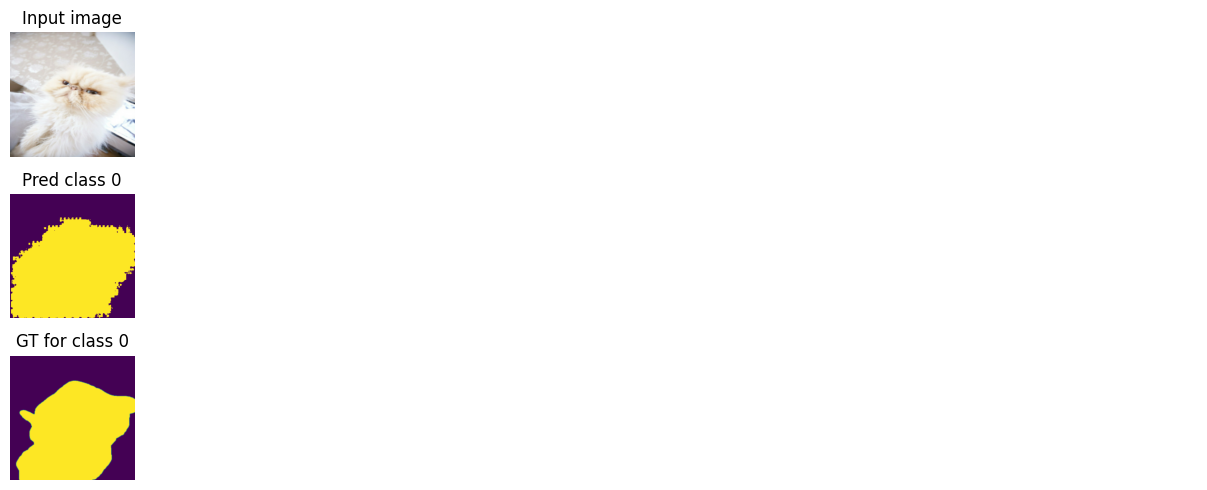

Train loss: 0.39656 | Time: 20m 47s | Val loss: 0.39517
Train_DICE_avg: 0.82802 | Train_Jaccard_avg: 0.71776 | Train_Sensitivity_avg: 0.73197 | Train_Specificity_avg: 0.96897 
Class 0 - Train_DICE: 0.82802 | Train_Jaccard: 0.71776 | Train_Sensitivity: 0.73197 | Train_Specificity: 0.96897 
Val_DICE_avg: 0.82901 | Val_Jaccard_avg: 0.72012 | Val_Sensitivity_avg: 0.73215 | Val_Specificity_avg: 0.97591 
Class 0 - Val_DICE: 0.82901 | Val_Jaccard: 0.72012 | Val_Sensitivity: 0.73215 | Val_Specificity: 0.97591 

Epoch 47/61


Training Epoch 47/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 47/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39540 | Time: 21m 13s | Val loss: 0.39424
Train_DICE_avg: 0.83029 | Train_Jaccard_avg: 0.72092 | Train_Sensitivity_avg: 0.73485 | Train_Specificity_avg: 0.96986 
Class 0 - Train_DICE: 0.83029 | Train_Jaccard: 0.72092 | Train_Sensitivity: 0.73485 | Train_Specificity: 0.96986 
Val_DICE_avg: 0.82959 | Val_Jaccard_avg: 0.72098 | Val_Sensitivity_avg: 0.73305 | Val_Specificity_avg: 0.97590 
Class 0 - Val_DICE: 0.82959 | Val_Jaccard: 0.72098 | Val_Sensitivity: 0.73305 | Val_Specificity: 0.97590 

Epoch 48/61


Training Epoch 48/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 48/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39462 | Time: 21m 39s | Val loss: 0.39324
Train_DICE_avg: 0.83110 | Train_Jaccard_avg: 0.72200 | Train_Sensitivity_avg: 0.73616 | Train_Specificity_avg: 0.96944 
Class 0 - Train_DICE: 0.83110 | Train_Jaccard: 0.72200 | Train_Sensitivity: 0.73616 | Train_Specificity: 0.96944 
Val_DICE_avg: 0.83068 | Val_Jaccard_avg: 0.72253 | Val_Sensitivity_avg: 0.73473 | Val_Specificity_avg: 0.97594 
Class 0 - Val_DICE: 0.83068 | Val_Jaccard: 0.72253 | Val_Sensitivity: 0.73473 | Val_Specificity: 0.97594 

Epoch 49/61


Training Epoch 49/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 49/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39362 | Time: 22m 6s | Val loss: 0.39256
Train_DICE_avg: 0.83200 | Train_Jaccard_avg: 0.72353 | Train_Sensitivity_avg: 0.73775 | Train_Specificity_avg: 0.96887 
Class 0 - Train_DICE: 0.83200 | Train_Jaccard: 0.72353 | Train_Sensitivity: 0.73775 | Train_Specificity: 0.96887 
Val_DICE_avg: 0.83121 | Val_Jaccard_avg: 0.72324 | Val_Sensitivity_avg: 0.73547 | Val_Specificity_avg: 0.97598 
Class 0 - Val_DICE: 0.83121 | Val_Jaccard: 0.72324 | Val_Sensitivity: 0.73547 | Val_Specificity: 0.97598 

Epoch 50/61


Training Epoch 50/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 50/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39288 | Time: 22m 32s | Val loss: 0.39180
Train_DICE_avg: 0.83263 | Train_Jaccard_avg: 0.72437 | Train_Sensitivity_avg: 0.73863 | Train_Specificity_avg: 0.96946 
Class 0 - Train_DICE: 0.83263 | Train_Jaccard: 0.72437 | Train_Sensitivity: 0.73863 | Train_Specificity: 0.96946 
Val_DICE_avg: 0.83145 | Val_Jaccard_avg: 0.72356 | Val_Sensitivity_avg: 0.73550 | Val_Specificity_avg: 0.97651 
Class 0 - Val_DICE: 0.83145 | Val_Jaccard: 0.72356 | Val_Sensitivity: 0.73550 | Val_Specificity: 0.97651 

Epoch 51/61


Training Epoch 51/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 51/61:   0%|          | 0/8 [00:00<?, ?it/s]

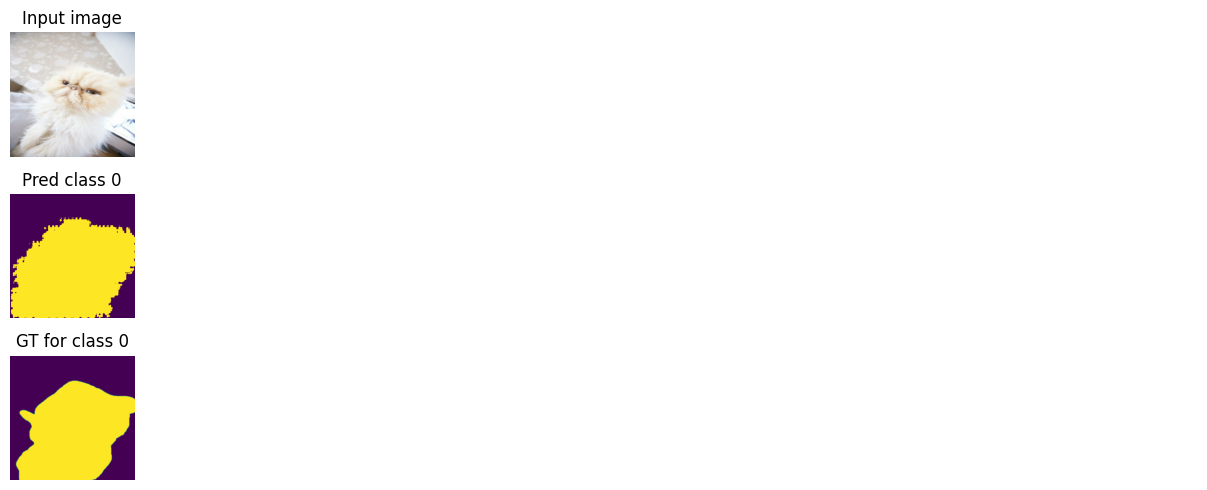

Train loss: 0.39209 | Time: 22m 59s | Val loss: 0.39116
Train_DICE_avg: 0.83397 | Train_Jaccard_avg: 0.72611 | Train_Sensitivity_avg: 0.74048 | Train_Specificity_avg: 0.96930 
Class 0 - Train_DICE: 0.83397 | Train_Jaccard: 0.72611 | Train_Sensitivity: 0.74048 | Train_Specificity: 0.96930 
Val_DICE_avg: 0.83229 | Val_Jaccard_avg: 0.72480 | Val_Sensitivity_avg: 0.73679 | Val_Specificity_avg: 0.97647 
Class 0 - Val_DICE: 0.83229 | Val_Jaccard: 0.72480 | Val_Sensitivity: 0.73679 | Val_Specificity: 0.97647 

Epoch 52/61


Training Epoch 52/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 52/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39178 | Time: 23m 25s | Val loss: 0.39047
Train_DICE_avg: 0.83416 | Train_Jaccard_avg: 0.72617 | Train_Sensitivity_avg: 0.74026 | Train_Specificity_avg: 0.96946 
Class 0 - Train_DICE: 0.83416 | Train_Jaccard: 0.72617 | Train_Sensitivity: 0.74026 | Train_Specificity: 0.96946 
Val_DICE_avg: 0.83340 | Val_Jaccard_avg: 0.72641 | Val_Sensitivity_avg: 0.73865 | Val_Specificity_avg: 0.97624 
Class 0 - Val_DICE: 0.83340 | Val_Jaccard: 0.72641 | Val_Sensitivity: 0.73865 | Val_Specificity: 0.97624 

Epoch 53/61


Training Epoch 53/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 53/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39115 | Time: 23m 52s | Val loss: 0.38995
Train_DICE_avg: 0.83571 | Train_Jaccard_avg: 0.72848 | Train_Sensitivity_avg: 0.74250 | Train_Specificity_avg: 0.97083 
Class 0 - Train_DICE: 0.83571 | Train_Jaccard: 0.72848 | Train_Sensitivity: 0.74250 | Train_Specificity: 0.97083 
Val_DICE_avg: 0.83391 | Val_Jaccard_avg: 0.72716 | Val_Sensitivity_avg: 0.73933 | Val_Specificity_avg: 0.97639 
Class 0 - Val_DICE: 0.83391 | Val_Jaccard: 0.72716 | Val_Sensitivity: 0.73933 | Val_Specificity: 0.97639 

Epoch 54/61


Training Epoch 54/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 54/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39033 | Time: 24m 18s | Val loss: 0.38954
Train_DICE_avg: 0.83609 | Train_Jaccard_avg: 0.72907 | Train_Sensitivity_avg: 0.74283 | Train_Specificity_avg: 0.97054 
Class 0 - Train_DICE: 0.83609 | Train_Jaccard: 0.72907 | Train_Sensitivity: 0.74283 | Train_Specificity: 0.97054 
Val_DICE_avg: 0.83538 | Val_Jaccard_avg: 0.72930 | Val_Sensitivity_avg: 0.74206 | Val_Specificity_avg: 0.97573 
Class 0 - Val_DICE: 0.83538 | Val_Jaccard: 0.72930 | Val_Sensitivity: 0.74206 | Val_Specificity: 0.97573 

Epoch 55/61


Training Epoch 55/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 55/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.39031 | Time: 24m 44s | Val loss: 0.38901
Train_DICE_avg: 0.83622 | Train_Jaccard_avg: 0.72922 | Train_Sensitivity_avg: 0.74364 | Train_Specificity_avg: 0.97032 
Class 0 - Train_DICE: 0.83622 | Train_Jaccard: 0.72922 | Train_Sensitivity: 0.74364 | Train_Specificity: 0.97032 
Val_DICE_avg: 0.83547 | Val_Jaccard_avg: 0.72939 | Val_Sensitivity_avg: 0.74182 | Val_Specificity_avg: 0.97624 
Class 0 - Val_DICE: 0.83547 | Val_Jaccard: 0.72939 | Val_Sensitivity: 0.74182 | Val_Specificity: 0.97624 

Epoch 56/61


Training Epoch 56/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 56/61:   0%|          | 0/8 [00:00<?, ?it/s]

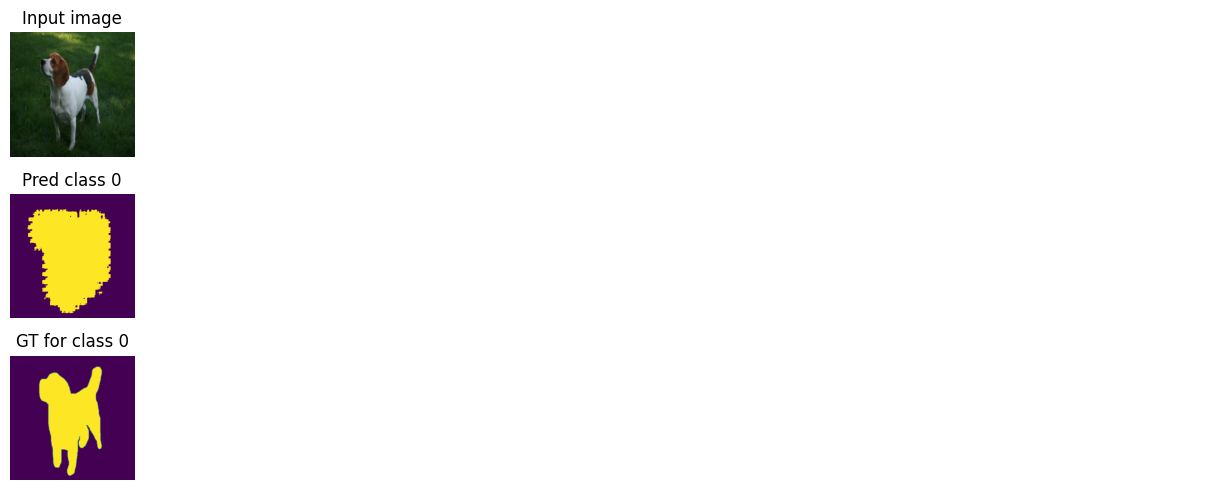

Train loss: 0.38961 | Time: 25m 11s | Val loss: 0.38861
Train_DICE_avg: 0.83685 | Train_Jaccard_avg: 0.73021 | Train_Sensitivity_avg: 0.74418 | Train_Specificity_avg: 0.97081 
Class 0 - Train_DICE: 0.83685 | Train_Jaccard: 0.73021 | Train_Sensitivity: 0.74418 | Train_Specificity: 0.97081 
Val_DICE_avg: 0.83544 | Val_Jaccard_avg: 0.72932 | Val_Sensitivity_avg: 0.74141 | Val_Specificity_avg: 0.97678 
Class 0 - Val_DICE: 0.83544 | Val_Jaccard: 0.72932 | Val_Sensitivity: 0.74141 | Val_Specificity: 0.97678 

Epoch 57/61


Training Epoch 57/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 57/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.38933 | Time: 25m 38s | Val loss: 0.38809
Train_DICE_avg: 0.83731 | Train_Jaccard_avg: 0.73070 | Train_Sensitivity_avg: 0.74508 | Train_Specificity_avg: 0.97091 
Class 0 - Train_DICE: 0.83731 | Train_Jaccard: 0.73070 | Train_Sensitivity: 0.74508 | Train_Specificity: 0.97091 
Val_DICE_avg: 0.83578 | Val_Jaccard_avg: 0.72982 | Val_Sensitivity_avg: 0.74214 | Val_Specificity_avg: 0.97655 
Class 0 - Val_DICE: 0.83578 | Val_Jaccard: 0.72982 | Val_Sensitivity: 0.74214 | Val_Specificity: 0.97655 

Epoch 58/61


Training Epoch 58/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 58/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.38872 | Time: 26m 4s | Val loss: 0.38775
Train_DICE_avg: 0.83764 | Train_Jaccard_avg: 0.73156 | Train_Sensitivity_avg: 0.74611 | Train_Specificity_avg: 0.96960 
Class 0 - Train_DICE: 0.83764 | Train_Jaccard: 0.73156 | Train_Sensitivity: 0.74611 | Train_Specificity: 0.96960 
Val_DICE_avg: 0.83660 | Val_Jaccard_avg: 0.73098 | Val_Sensitivity_avg: 0.74337 | Val_Specificity_avg: 0.97651 
Class 0 - Val_DICE: 0.83660 | Val_Jaccard: 0.73098 | Val_Sensitivity: 0.74337 | Val_Specificity: 0.97651 

Epoch 59/61


Training Epoch 59/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 59/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.38829 | Time: 26m 30s | Val loss: 0.38743
Train_DICE_avg: 0.83796 | Train_Jaccard_avg: 0.73188 | Train_Sensitivity_avg: 0.74605 | Train_Specificity_avg: 0.97077 
Class 0 - Train_DICE: 0.83796 | Train_Jaccard: 0.73188 | Train_Sensitivity: 0.74605 | Train_Specificity: 0.97077 
Val_DICE_avg: 0.83785 | Val_Jaccard_avg: 0.73277 | Val_Sensitivity_avg: 0.74563 | Val_Specificity_avg: 0.97597 
Class 0 - Val_DICE: 0.83785 | Val_Jaccard: 0.73277 | Val_Sensitivity: 0.74563 | Val_Specificity: 0.97597 

Epoch 60/61


Training Epoch 60/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 60/61:   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.38782 | Time: 26m 57s | Val loss: 0.38708
Train_DICE_avg: 0.83867 | Train_Jaccard_avg: 0.73277 | Train_Sensitivity_avg: 0.74761 | Train_Specificity_avg: 0.96898 
Class 0 - Train_DICE: 0.83867 | Train_Jaccard: 0.73277 | Train_Sensitivity: 0.74761 | Train_Specificity: 0.96898 
Val_DICE_avg: 0.83768 | Val_Jaccard_avg: 0.73250 | Val_Sensitivity_avg: 0.74510 | Val_Specificity_avg: 0.97636 
Class 0 - Val_DICE: 0.83768 | Val_Jaccard: 0.73250 | Val_Sensitivity: 0.74510 | Val_Specificity: 0.97636 

Epoch 61/61


Training Epoch 61/61:   0%|          | 0/29 [00:00<?, ?it/s]

Validation Epoch 61/61:   0%|          | 0/8 [00:00<?, ?it/s]

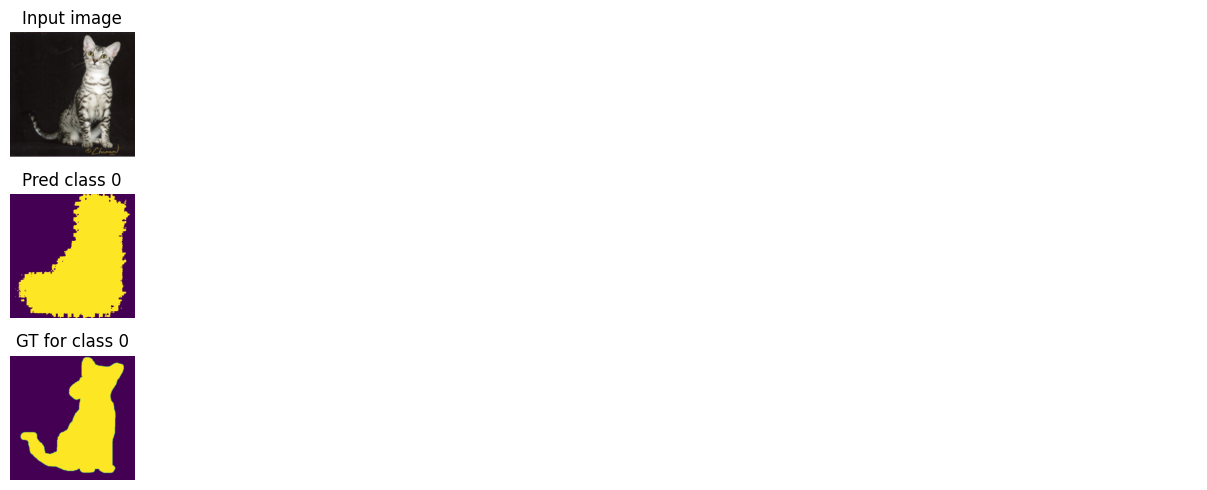

Train loss: 0.38748 | Time: 27m 23s | Val loss: 0.38687
Train_DICE_avg: 0.83971 | Train_Jaccard_avg: 0.73415 | Train_Sensitivity_avg: 0.74869 | Train_Specificity_avg: 0.96949 
Class 0 - Train_DICE: 0.83971 | Train_Jaccard: 0.73415 | Train_Sensitivity: 0.74869 | Train_Specificity: 0.96949 
Val_DICE_avg: 0.83802 | Val_Jaccard_avg: 0.73298 | Val_Sensitivity_avg: 0.74568 | Val_Specificity_avg: 0.97625 
Class 0 - Val_DICE: 0.83802 | Val_Jaccard: 0.73298 | Val_Sensitivity: 0.74568 | Val_Specificity: 0.97625 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]



Global Performance Metrics:
Loss mean: 0.37919, std: 0.03908
Dice Coefficient mean: 0.83782, std: 0.09029
Jaccard Index mean: 0.73042, std: 0.12342
Sensitivity mean: 0.97666, std: 0.03095
Specificity mean: 0.79212, std: 0.07129

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.83782, std: 0.09029
Jaccard mean: 0.73042, std: 0.12342
Sensitivity mean: 0.97666, std: 0.03095
Specificity mean: 0.79212, std: 0.07129
